In [1]:
!hostname

br013.ib.bridges2.psc.edu


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from matplotlib.patches import Patch
from utils import building_unit_types, adoption_tiers, original_adoption_tiers
import os
import pickle
import numpy as np
import seaborn as sns
from itertools import product
from collections import defaultdict
import math
from shapely.geometry import Polygon, MultiPolygon, Point, shape
from shapely.ops import unary_union

import geopandas as gpd
import json

In [2]:
city_names = ["columbus"]
unit_numbers = [8]#,800]
# unit_type_to_color = ["red", "purple", "teal", "gold", "navy", "magenta", "lime", "black"]


In [3]:
# def is_successful_upgrade(city_name, unit_type):
#     file_name = os.path.join("output_results",f"{city_name}_upgrades_single_{unit_type}_unit_residence", "tare_output.csv")
#     if os.path.exists(file_name):
#         output = pd.read_csv(file_name)
#         return output.loc[0,"iraRef_mp8_heating_adoption"] != "Tier 4: Averse"
#     return False
def fill_a_table(table_filling_fn=None):
    # print(f"Filling a table with {'is_successful_upgrade' if table_filling_fn is None else table_filling_fn.__name__}")
    table_to_fill = pd.DataFrame(columns=unit_numbers, index=adoption_tiers)
    city_name = "columbus"
    for unit_num in unit_numbers:
        for unit_type in building_unit_types:
            file_name = os.path.join(os.getcwd(), "output_results",f"columbus_{unit_num}_{unit_type}_unit_residence", "no_cooling_benefits_25_year_lifetime_MMPV_ALPHApt9_DISCOUNTpt07_tare_output.csv")
            print(file_name)

            if os.path.exists(file_name):
                print(file_name)
                output = pd.read_csv(file_name)
                print(output.columns)
                # print(output.loc[0,"hvac_has_ducts"])
                for adoption_tier in adoption_tiers:
                    table_to_fill.loc[adoption_tier,unit_num] = table_filling_fn((output, adoption_tier)) 
            else:
                table_to_fill.loc[adoption_tier,unit_num] =  None
            # is_successful_upgrade(city_name, unit_type) if table_filling_fn is None else table_filling_fn(city_name, unit_type)
            
    return table_to_fill



# def table_of_success_failure():
#     return fill_a_table(lambda x: sum(x[0].loc[:,"iraRef_mp8_heating_adoption"] != "Tier 4: Averse"))

def table_of_tier():
    return fill_a_table(lambda x: sum(x[0].loc[:,"iraRef_mp8_heating_adoption"] == x[1]))

def table_of_hvac_has_ducts():
    return fill_a_table(lambda x: x[0].loc[:,"hvac_has_ducts"] == "Yes")

In [11]:
# success_failure_table = table_of_success_failure()

In [32]:
city_name = "minneapolis"
unit_type = "SFD"
file_name = os.path.join(os.getcwd(), "cmu-tare-model", "output_results",f"{city_name}_upgrades_91_{unit_type}_unit_residence", "tare_output.csv")
# if not os.path.exists(file_name):
    # pass
print(file_name)
output = pd.read_csv(file_name)
print(output.shape)
adopting_output = output[output["iraRef_mp8_heating_adoption"] != "Tier 4: Averse"]


/mnt/c/Users/Arnav/Documents/Research/Trane_Technologies/cmu-tare-model/output_results/minneapolis_upgrades_91_SFD_unit_residence/tare_output.csv
(80, 287)


In [39]:
adopting_output

Unnamed: 0  applicable_upgrade_x  bldg_id     census_division state  \
0            0                  True        1  West North Central    MN   
1            1                  True        2  West North Central    MN   
3            3                  True        5  West North Central    MN   
5            5                  True        8  West North Central    MN   
6            6                  True        9  West North Central    MN   
..         ...                   ...      ...                 ...   ...   
75          75                  True       86  West North Central    MN   
76          76                  True       87  West North Central    MN   
77          77                  True       88  West North Central    MN   
78          78                  True       89  West North Central    MN   
79          79                  True       91  West North Central    MN   

               city       puma               county  reeds_balancing_area  \
0   MN, Minneapolis  MN, 01405  MN, Hennepin County                    43   
1   MN, Minneapolis  MN, 01405  MN, Hennepin County                    43   
3   MN, Minneapolis  MN, 01405  MN, Hennepin County                    43   
5   MN, Minneapolis  MN, 01405  MN, Hennepin County                    43   
6   MN, Minneapolis  MN, 01405  MN, Hennepin County                    43   
..              ...        ...                  ...                   ...   
75  MN, Minneapolis  MN, 01405  MN, Hennepin County                    43   
76  MN, Minneapolis  MN, 01405  MN, Hennepin County                    43   
77  MN, Minneapolis  MN, 01405  MN, Hennepin County                    43   
78  MN, Minneapolis  MN, 01405  MN, Hennepin County                    43   
79  MN, Minneapolis  MN, 01405  MN, Hennepin County                    43   

      income  ... preIRA_mp8_heating_additional_public_benefit  \
0    54999.5  ...                                          0.0   
1   129999.5  ...                                          0.0   
3        NaN  ...                                          0.0   
5    89999.5  ...                                          0.0   
6   129999.5  ...                                          0.0   
..       ...  ...                                          ...   
75  189999.5  ...                                          0.0   
76   47499.5  ...                                          0.0   
77   64999.5  ...                                          0.0   
78   22499.5  ...                                          0.0   
79   17499.5  ...                                          0.0   

   preIRA_mp8_heating_total_npv_lessWTP preIRA_mp8_heating_total_npv_moreWTP  \
0                             -26429.55                            -23883.96   
1                             -19864.51                            -17418.02   
3                             -12541.68                            -10169.21   
5                             -14644.55                            -12351.00   
6                             -22084.88                            -19629.76   
..                                  ...                                  ...   
75                            -34285.21                            -31410.36   
76                            -11477.61                             -9211.52   
77                            -20497.08                            -18042.41   
78                            -17564.51                            -15255.93   
79                            -23492.62                            -21038.64   

   preIRA_mp8_heating_adoption preIRA_mp8_heating_retrofit_publicImpact  \
0               Tier 4: Averse                           Public Benefit   
1               Tier 4: Averse                           Public Benefit   
3               Tier 4: Averse                           Public Benefit   
5               Tier 4: Averse                           Public Benefit   
6               Tier 4: Averse                   

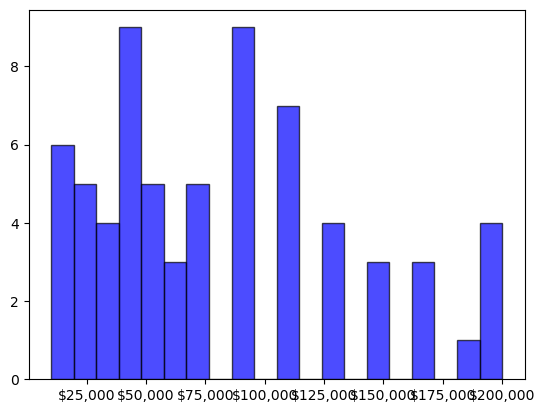

In [38]:
plt.hist(adopting_output["income"], bins=20, color='blue', edgecolor='black', alpha=0.7)
# ax = plt.gca()  # Get the current axis
# ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))

# adopting_output.plot("income")

<BarContainer object of 3 artists>

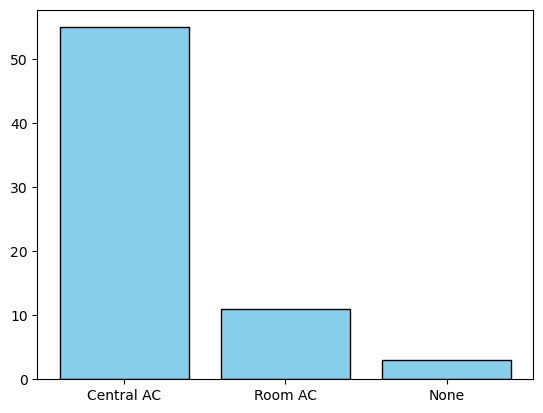

In [40]:
category_counts = adopting_output["hvac_cooling_type"].value_counts()
plt.bar(category_counts.index, category_counts.values, color='skyblue', edgecolor='black')


<BarContainer object of 2 artists>

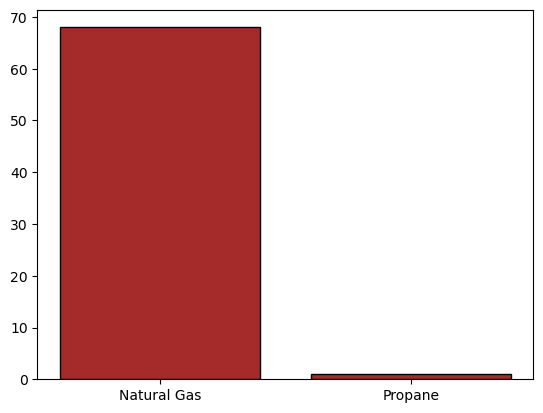

In [42]:
category_counts = adopting_output["base_heating_fuel"].value_counts()
plt.bar(category_counts.index, category_counts.values, color='brown', edgecolor='black')


In [9]:
success_failure_table

8    800
Existing Equipment                      7  572
Tier 1: Feasible                        7  572
Tier 2: Feasible vs. Alternative        7  572
Tier 3: Subsidy-Dependent Feasibility   7  572
Feasible per MMPV                       7  572

In [60]:
has_ducts_table = table_of_hvac_has_ducts()

In [61]:
has_ducts_table

columbus minneapolis
2           True        True
3_4         True        True
5_9         None        True
10_19       None        None
20_49       None        True
50_plus     None        True
SFA         True        True
SFD         True        True

In [51]:
# def table_of_tier():
#     return fill_a_table(lambda x: sum(x[0].loc[:,"iraRef_mp8_heating_adoption"] == x[1]))
num_residences = 800
table_to_fill = pd.DataFrame(index=adoption_tiers)
city_name = "columbus"
all_filenames = dict()
all_filenames[f"{num_residences}_NPV"] = os.path.join(os.getcwd(), "output_results",f"columbus_{num_residences}_all_unit_residence", "no_cooling_benefits_25_year_lifetime_NPV_ALPHApt9_DISCOUNTpt07_tare_output.csv")
all_filenames[f"{num_residences}_MMPV_ALPHApt95_DRpt02"] = os.path.join(os.getcwd(), "output_results",f"columbus_{num_residences}_all_unit_residence", "no_cooling_benefits_25_year_lifetime_MMPV_ALPHApt95_DISCOUNTpt02_tare_output.csv")
all_filenames[f"{num_residences}_MMPV_ALPHApt9_DRpt02"] = os.path.join(os.getcwd(), "output_results",f"columbus_{num_residences}_all_unit_residence", "no_cooling_benefits_25_year_lifetime_MMPV_ALPHApt9_DISCOUNTpt02_tare_output.csv")
all_filenames[f"{num_residences}_MMPV_ALPHApt9_DRpt07"] = os.path.join(os.getcwd(), "output_results",f"columbus_{num_residences}_all_unit_residence", "no_cooling_benefits_25_year_lifetime_MMPV_ALPHApt9_DISCOUNTpt07_tare_output.csv")
all_filenames[f"{num_residences}_MMPV_ALPHApt5_DRpt02"] = os.path.join(os.getcwd(), "output_results",f"columbus_{num_residences}_all_unit_residence", "no_cooling_benefits_25_year_lifetime_MMPV_ALPHApt5_DISCOUNTpt02_tare_output.csv")
all_filenames[f"{num_residences}_MMPV_ALPHApt5_DRpt07"] = os.path.join(os.getcwd(), "output_results",f"columbus_{num_residences}_all_unit_residence", "no_cooling_benefits_25_year_lifetime_MMPV_ALPHApt5_DISCOUNTpt07_tare_output.csv")
# all_filenames["8_MMPV"] = os.path.join(os.getcwd(), "output_results",f"columbus_{8}_all_unit_residence", "no_cooling_benefits_25_year_lifetime_MMPV_ALPHApt9_DISCOUNTpt07_tare_output.csv")
# all_filenames["800_NPV"] = os.path.join(os.getcwd(), "output_results",f"columbus_{800}_all_unit_residence", "no_cooling_benefits_25_year_lifetime_NPV_ALPHApt9_DISCOUNTpt07_tare_output.csv")
# all_filenames["800_MMPV"] = os.path.join(os.getcwd(), "output_results",f"columbus_{800}_all_unit_residence", "no_cooling_benefits_25_year_lifetime_MMPV_ALPHApt9_DISCOUNTpt07_tare_output.csv")

for scenario, file_name in all_filenames.items():
    if os.path.exists(file_name):
        output = pd.read_csv(file_name)
        for adoption_tier in adoption_tiers:
            table_to_fill.loc[adoption_tier,scenario] = sum(output.loc[:,"iraRef_mp8_heating_adoption"] == adoption_tier)# table_filling_fn((output, adoption_tier)) 
    else:
        table_to_fill.loc[adoption_tier,scenario] =  None

table_to_fill

800_NPV  800_MMPV_ALPHApt95_DRpt02  \
Existing Equipment                         0.0                        0.0   
Tier 1: Feasible                           0.0                        0.0   
Tier 2: Feasible vs. Alternative          10.0                        6.0   
Tier 3: Subsidy-Dependent Feasibility    217.0                       57.0   
Feasible per MMPV                          0.0                      125.0   
Tier 4: Averse                           434.0                      473.0   

                                       800_MMPV_ALPHApt9_DRpt02  \
Existing Equipment                                          0.0   
Tier 1: Feasible                                            0.0   
Tier 2: Feasible vs. Alternative                            7.0   
Tier 3: Subsidy-Dependent Feasibility                      62.0   
Feasible per MMPV                                         299.0   
Tier 4: Averse                                            293.0   

                                       800_MMPV_ALPHApt9_DRpt07  \
Existing Equipment                                          0.0   
Tier 1: Feasible                                            0.0   
Tier 2: Feasible vs. Alternative                           10.0   
Tier 3: Subsidy-Dependent Feasibility                     215.0   
Feasible per MMPV                                         343.0   
Tier 4: Averse                                             93.0   

                                       800_MMPV_ALPHApt5_DRpt02  \
Existing Equipment                                          0.0   
Tier 1: Feasible                                            0.0   
Tier 2: Feasible vs. Alternative                            7.0   
Tier 3: Subsidy-Dependent Feasibility                      60.0   
Feasible per MMPV                                         565.0   
Tier 4: Averse                                             29.0   

                                       800_MMPV_ALPHApt5_DRpt07  
Existing Equipment                                          0.0  
Tier 1: Feasible                                            0.0  
Tier 2: Feasible vs. Alternative                           10.0  
Tier 3: Subsidy-Dependent Feasibility                     226.0  
Feasible per MMPV                                         400.0  
Tier 4: Averse                                             25.0

In [52]:
table_to_fill.to_csv(os.path.join("output_results", f"comparing_columbus_{num_residences}_across_npv_and_MMPV.csv"))

In [14]:
with open(os.path.join("/mnt","c","Users","Arnav","Documents","Research","Trane_Technologies","cmu-tare-model","output_results",f"columbus_800_all_unit_residence", f"100_cluster_labels.pkl"), "rb") as f:
    kmeans_resstock_100_labels_ = pickle.load(f)

unique_labels = np.unique(kmeans_resstock_100_labels_)

len(kmeans_resstock_100_labels_)

661

In [15]:
with open(os.path.join("/mnt","c","Users","Arnav","Documents","Research","Trane_Technologies","cmu-tare-model","output_results",f"columbus_800_all_unit_residence", f"building_IDs.pkl"), "rb") as f:
    building_IDs = pickle.load(f)

len(building_IDs)

661

In [41]:
table_to_fill = pd.DataFrame(index=adoption_tiers, columns=unique_labels)
city_name = "columbus"
file_name = os.path.join(os.getcwd(), "output_results",f"columbus_{800}_all_unit_residence", "no_cooling_benefits_25_year_lifetime_MMPV_ALPHApt9_DISCOUNTpt07_tare_output.csv")
# for unit_num in unit_numbers:
#     for unit_type in building_unit_types:
#         all_filenames.append()
        
        # file_name = os.path.join(os.getcwd(), "output_results",f"columbus_{unit_num}_{unit_type}_unit_residence", "no_cooling_benefits_25_year_lifetime_MMPV_ALPHApt9_DISCOUNTpt07_tare_output.csv")
        # print(file_name)
if os.path.exists(file_name):
    # print(file_name)
    output = pd.read_csv(file_name)
    # print(output.columns)
    # print(output.loc[0,"hvac_has_ducts"])
    for adoption_tier in adoption_tiers:
        for cluster_label in unique_labels:
            print(adoption_tier)
            print(cluster_label)
            is_in_this_cluster = pd.Series(kmeans_resstock_100_labels_[np.where(building_IDs == output["bldg_id"])[0]] == cluster_label)
            is_this_adoption_tier = output.loc[:,"iraRef_mp8_heating_adoption"] == adoption_tier
            # print(np.sum(np.logical_and(is_in_this_cluster,is_this_adoption_tier)))
            table_to_fill.loc[adoption_tier,cluster_label] = np.sum(np.logical_and(is_in_this_cluster,is_this_adoption_tier))
else:
    table_to_fill.loc[adoption_tier,scenario] =  None

table_to_fill

Existing Equipment
0
Existing Equipment
1
Existing Equipment
2
Existing Equipment
3
Existing Equipment
4
Existing Equipment
5
Existing Equipment
6
Existing Equipment
7
Existing Equipment
8
Existing Equipment
9
Existing Equipment
10
Existing Equipment
11
Existing Equipment
12
Existing Equipment
13
Existing Equipment
14
Existing Equipment
15
Existing Equipment
16
Existing Equipment
17
Existing Equipment
18
Existing Equipment
19
Existing Equipment
20
Existing Equipment
21
Existing Equipment
22
Existing Equipment
23
Existing Equipment
24
Existing Equipment
25
Existing Equipment
26
Existing Equipment
27
Existing Equipment
28
Existing Equipment
29
Existing Equipment
30
Existing Equipment
31
Existing Equipment
32
Existing Equipment
33
Existing Equipment
34
Existing Equipment
35
Existing Equipment
36
Existing Equipment
37
Existing Equipment
38
Existing Equipment
39
Existing Equipment
40
Existing Equipment
41
Existing Equipment
42
Existing Equipment
43
Existing Equipment
44
Existing Equipment
4

0  1  2  3  4  5  6  7  8  9   ... 90  \
Existing Equipment                     0  0  0  0  0  0  0  0  0  0  ...  0   
Tier 1: Feasible                       0  0  0  0  0  0  0  0  0  0  ...  0   
Tier 2: Feasible vs. Alternative       0  0  0  1  0  0  0  0  1  0  ...  0   
Tier 3: Subsidy-Dependent Feasibility  0  5  0  2  2  1  6  3  1  1  ...  0   
Feasible per MMPV                      1  6  0  8  3  0  4  7  3  0  ...  0   
Tier 4: Averse                         1  3  4  0  0  0  1  1  0  0  ...  1   

                                      91 92 93 94 95 96 97 98 99  
Existing Equipment                     0  0  0  0  0  0  0  0  0  
Tier 1: Feasible                       0  0  0  0  0  0  0  0  0  
Tier 2: Feasible vs. Alternative       0  0  0  0  0  0  0  0  0  
Tier 3: Subsidy-Dependent Feasibility  1  0  3  2  0  2  3  3  0  
Feasible per MMPV                      0  0  3  1  2  2  3  5  0  
Tier 4: Averse                         1  1  0  4  0  0  1  1  1  

[6 rows x 100 columns]

In [29]:
table_to_fill.to_csv(os.path.join("output_results", "comparing_clusters_of_columbus_800_MMPV.csv"))

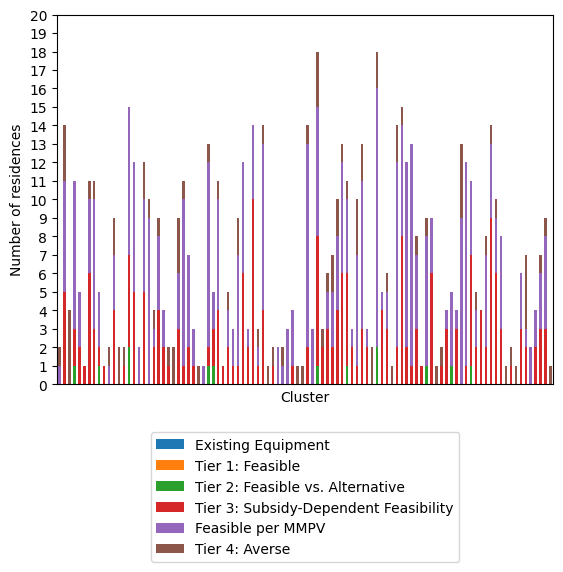

In [39]:
table_to_fill.T.plot(kind='bar', stacked=True)
plt.xticks([])
plt.yticks(range(21))
plt.xlabel("Cluster")
plt.ylabel("Number of residences")
plt.legend(loc="lower center", bbox_to_anchor=(0.5,-0.5))
plt.show()

Existing Equipment
0
Existing Equipment
1
Existing Equipment
2
Existing Equipment
3
Tier 1: Feasible
0
Tier 1: Feasible
1
Tier 1: Feasible
2
Tier 1: Feasible
3
Tier 2: Feasible vs. Alternative
0
Tier 2: Feasible vs. Alternative
1
Tier 2: Feasible vs. Alternative
2
Tier 2: Feasible vs. Alternative
3
Tier 3: Subsidy-Dependent Feasibility
0
Tier 3: Subsidy-Dependent Feasibility
1
Tier 3: Subsidy-Dependent Feasibility
2
Tier 3: Subsidy-Dependent Feasibility
3
Feasible per MMPV
0
Feasible per MMPV
1
Feasible per MMPV
2
Feasible per MMPV
3
Tier 4: Averse
0
Tier 4: Averse
1
Tier 4: Averse
2
Tier 4: Averse
3
                                       0  1  2  3
Existing Equipment                     0  0  0  0
Tier 1: Feasible                       0  0  0  0
Tier 2: Feasible vs. Alternative       0  0  0  0
Tier 3: Subsidy-Dependent Feasibility  1  0  1  0
Feasible per MMPV                      0  4  0  1
Tier 4: Averse                         0  0  0  0


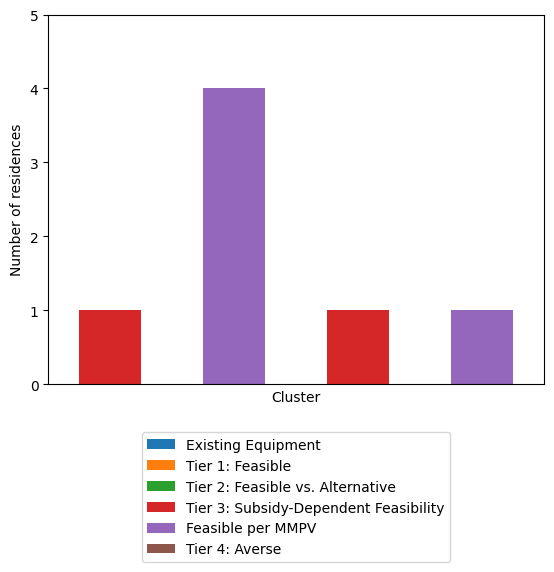

In [43]:
with open(os.path.join("/mnt","c","Users","Arnav","Documents","Research","Trane_Technologies","cmu-tare-model","output_results",f"columbus_8_all_unit_residence", f"4_cluster_labels.pkl"), "rb") as f:
    kmeans_resstock_4_labels_ = pickle.load(f)

unique_labels = np.unique(kmeans_resstock_4_labels_)

len(kmeans_resstock_4_labels_)

with open(os.path.join("/mnt","c","Users","Arnav","Documents","Research","Trane_Technologies","cmu-tare-model","output_results",f"columbus_8_all_unit_residence", f"building_IDs.pkl"), "rb") as f:
    building_IDs = pickle.load(f)

len(building_IDs)

table_to_fill = pd.DataFrame(index=adoption_tiers, columns=unique_labels)
city_name = "columbus"
file_name = os.path.join(os.getcwd(), "output_results",f"columbus_{8}_all_unit_residence", "no_cooling_benefits_25_year_lifetime_MMPV_ALPHApt9_DISCOUNTpt07_tare_output.csv")
# for unit_num in unit_numbers:
#     for unit_type in building_unit_types:
#         all_filenames.append()
        
        # file_name = os.path.join(os.getcwd(), "output_results",f"columbus_{unit_num}_{unit_type}_unit_residence", "no_cooling_benefits_25_year_lifetime_MMPV_ALPHApt9_DISCOUNTpt07_tare_output.csv")
        # print(file_name)
if os.path.exists(file_name):
    # print(file_name)
    output = pd.read_csv(file_name)
    # print(output.columns)
    # print(output.loc[0,"hvac_has_ducts"])
    for adoption_tier in adoption_tiers:
        for cluster_label in unique_labels:
            print(adoption_tier)
            print(cluster_label)
            is_in_this_cluster = pd.Series(kmeans_resstock_4_labels_[np.where(building_IDs == output["bldg_id"])[0]] == cluster_label)
            is_this_adoption_tier = output.loc[:,"iraRef_mp8_heating_adoption"] == adoption_tier
            # print(np.sum(np.logical_and(is_in_this_cluster,is_this_adoption_tier)))
            table_to_fill.loc[adoption_tier,cluster_label] = np.sum(np.logical_and(is_in_this_cluster,is_this_adoption_tier))
else:
    table_to_fill.loc[adoption_tier,scenario] =  None

table_to_fill.to_csv(os.path.join("output_results", "comparing_clusters_of_columbus_8_MMPV.csv"))
print(table_to_fill)

table_to_fill.T.plot(kind='bar', stacked=True)
plt.xticks([])
plt.yticks(range(6))
plt.xlabel("Cluster")
plt.ylabel("Number of residences")
plt.legend(loc="lower center", bbox_to_anchor=(0.5,-0.5))
plt.show()

In [4]:
def create_stacked_bar_chart(num_residences, scenario, prefix="alpha_beta", save_fig = True): # no_cooling_benefits_25_year_lifetime

    with open(os.path.join("/mnt","c","Users","Arnav","Documents","Research","Trane_Technologies","cmu-tare-model","output_results",f"columbus_{num_residences}_all_unit_residence", f"4_cluster_labels.pkl"), "rb") as f:
        kmeans_resstock_labels_ = pickle.load(f)
    
    # print(kmeans_resstock_labels_)

    unique_labels = np.unique(kmeans_resstock_labels_)

    # len(kmeans_resstock_labels_)

    with open(os.path.join("/mnt","c","Users","Arnav","Documents","Research","Trane_Technologies","cmu-tare-model","output_results",f"columbus_{num_residences}_all_unit_residence", f"building_IDs.pkl"), "rb") as f:
        building_IDs = pickle.load(f)

    # len(building_IDs)

    table_to_fill = pd.DataFrame(index=adoption_tiers, columns=unique_labels)
    city_name = "columbus"
    file_name = os.path.join(os.getcwd(), "output_results",f"columbus_{num_residences}_all_unit_residence", f"{prefix}_{scenario}_tare_output.csv")
    # for unit_num in unit_numbers:
    #     for unit_type in building_unit_types:
    #         all_filenames.append()
            
            # file_name = os.path.join(os.getcwd(), "output_results",f"columbus_{unit_num}_{unit_type}_unit_residence", "no_cooling_benefits_25_year_lifetime_MMPV_ALPHApt9_DISCOUNTpt07_tare_output.csv")
            # print(file_name)
    if os.path.exists(file_name):
        # print(file_name)
        output = pd.read_csv(file_name)
        # print(output.columns)
        # print(output.loc[0,"hvac_has_ducts"])
        for adoption_tier in adoption_tiers:
            for cluster_label in unique_labels:
                # print(adoption_tier)
                # print(cluster_label)
                is_in_this_cluster = pd.Series(kmeans_resstock_labels_[np.where(building_IDs == output["bldg_id"])[0]] == cluster_label)
                is_this_adoption_tier = output.loc[:,"iraRef_mp8_heating_adoption"] == adoption_tier
                # print(np.sum(np.logical_and(is_in_this_cluster,is_this_adoption_tier)))
                table_to_fill.loc[adoption_tier,cluster_label] = np.sum(np.logical_and(is_in_this_cluster,is_this_adoption_tier))
    else:
        raise Exception(f"no file found for {prefix}_{scenario}_tare_output.csv")
        # table_to_fill.loc[adoption_tier,scenario] =  None

    table_to_fill.to_csv(os.path.join("output_results", f"comparing_clusters_of_columbus_{num_residences}_{scenario}.csv"))
    # print(table_to_fill)

    table_to_fill.T.plot(kind='bar', stacked=True, colormap="YlGnBu")
    plt.xticks(rotation=0)
    # plt.yticks(range(max(table_to_fill.loc[:,scenario])))
    plt.xlabel("Cluster")
    plt.ylabel("Number of residences")
    plt.legend(loc="lower center", bbox_to_anchor=(0.5,-0.5))
    plt.title(scenario)

    if save_fig:
        plt.savefig(os.path.join("output_results", f"columbus_{num_residences}_all_unit_residence", f"tiers_of_columbus_{num_residences}_{scenario}.svg"))
    plt.show()




[1 0 0 3 2 0 0]


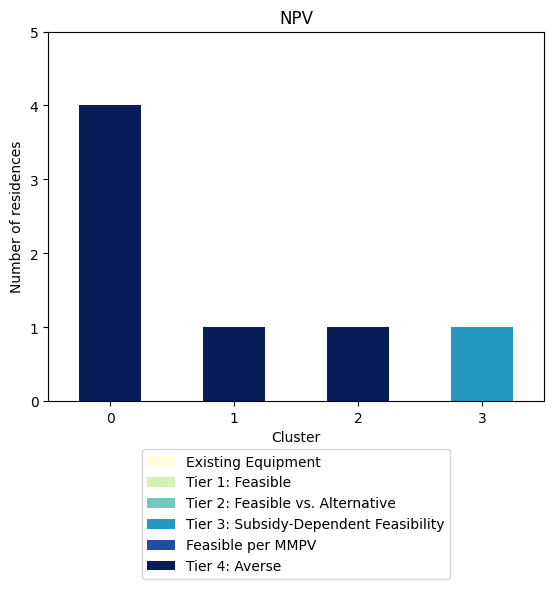

In [28]:
num_residences = 8
scenario = "NPV" #"MMPV_ALPHApt95_DISCOUNTpt02" # "MMPV_ALPHApt9_DISCOUNTpt07"
create_stacked_bar_chart(num_residences, scenario, save_fig = True) #  prefix="no_cooling_benefits_25_year_lifetime", 

In [ ]:
num_residences = 8
scenario = "MMPV_ALPHApt9_DISCOUNTpt07"

create_stacked_bar_chart(num_residences, scenario)

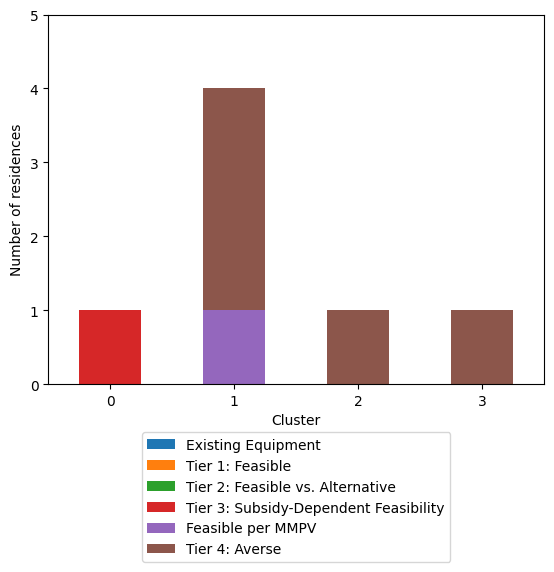

In [64]:
num_residences = 8
scenario = "MMPV_ALPHApt95_DISCOUNTpt02" # "MMPV_ALPHApt9_DISCOUNTpt07"
create_stacked_bar_chart(num_residences, scenario)

In [38]:
num_residences = 8
scenario = "MMPV_ALPHApt9_DISCOUNTpt02" # "MMPV_ALPHApt9_DISCOUNTpt07"
create_stacked_bar_chart(num_residences, scenario)

[1 0 0 3 2 0 0]


Exception: no file found for alpha_beta_MMPV_ALPHApt9_DISCOUNTpt02_tare_output.csv

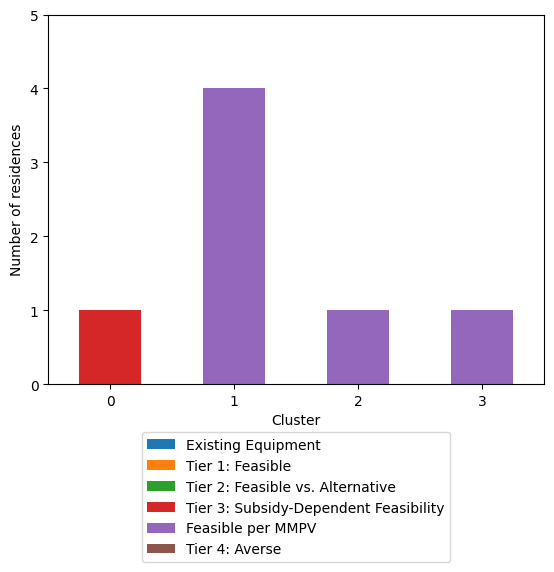

In [4]:
num_residences = 8
scenario = "MMPV_ALPHApt9_DISCOUNTpt07" # "MMPV_ALPHApt9_DISCOUNTpt07"
create_stacked_bar_chart(num_residences, scenario)

In [47]:
def table_of_heating_consumption():
    return fill_a_table(lambda x: [x.loc[0,f"baseline_{year}_heating_consumption"] for year in range(2024,2039)])

# city_names = ["columbus", "minneapolis"]
def graph_heating_consumption():
    heating_consumption_table = table_of_heating_consumption()
    # print(heating_consumption_table)
    fig, ax = plt.subplots(2, figsize=(3,6))
    for i, city in enumerate(city_names):
        for j, unit_type in enumerate(building_unit_types):
            # print(heating_consumption_table.loc[unit_type,city])
            if heating_consumption_table.loc[unit_type,city] is not None:
                ax[i].plot(heating_consumption_table.loc[unit_type,city], label=unit_type, color=unit_type_to_color[j])
        ax[i].set_title(city)
        ax[i].set_ylabel("Heating Consumption (MBtu)")
        ax[i].set_xlabel("Year of Equipment Lifetime")
        ax[i].legend(bbox_to_anchor=(1,1),loc="upper left")
    fig.set_tight_layout(True)
    # print(heating_consumption_table)
    # for city_name in city_names:
    #     for unit_type in building_unit_types:
    #         file_name = os.path.join("output_results",f"{city_name}_upgrades_single_{unit_type}_unit_residence", "tare_output.csv")
    
    fig.savefig("heating_consumption_comparison.svg", bbox_inches="tight")
    return heating_consumption_table

In [8]:
# heating_consumption_table = graph_heating_consumption()

NameError: name 'graph_heating_consumption' is not defined

In [49]:
def table_of_cooling_consumption():
    return fill_a_table(lambda x: [x.loc[0,f"baseline_{year}_cooling_consumption"] for year in range(2024,2039)])

# city_names = ["columbus", "minneapolis"]
def graph_cooling_consumption():
    cooling_consumption_table = table_of_cooling_consumption()
    # print(cooling_consumption_table)
    fig, ax = plt.subplots(2, figsize=(3,6))
    for i, city in enumerate(city_names):
        for j, unit_type in enumerate(building_unit_types):
            # print(cooling_consumption_table.loc[unit_type,city])
            if cooling_consumption_table.loc[unit_type,city] is not None:
                ax[i].plot(cooling_consumption_table.loc[unit_type,city], label=unit_type, color=unit_type_to_color[j])
        ax[i].set_title(city)
        ax[i].set_ylabel("Cooling Consumption (MBtu)")
        ax[i].set_xlabel("Year of Equipment Lifetime")
        ax[i].legend(bbox_to_anchor=(1,1),loc="upper left")
    fig.set_tight_layout(True)
    # print(cooling_consumption_table)
    # for city_name in city_names:
    #     for unit_type in building_unit_types:
    #         file_name = os.path.join("output_results",f"{city_name}_upgrades_single_{unit_type}_unit_residence", "tare_output.csv")
    
    fig.savefig("cooling_consumption_comparison.svg", bbox_inches="tight")
    return cooling_consumption_table

In [50]:
# graph_cooling_consumption()

KeyError: 'baseline_2024_cooling_consumption'

In [76]:
def table_of_NPV_calculations():
    col_names = [
        "iraRef_mp8_heating_public_npv",
        "iraRef_mp8_heating_total_capitalCost",
        "iraRef_mp8_heating_net_capitalCost",
        "iraRef_mp8_heating_private_npv_lessWTP",
        "iraRef_mp8_heating_private_npv_moreWTP",
    # "iraRef_mp8_heating_additional_public_benefit",
    # "iraRef_mp8_heating_total_npv_lessWTP",
    # "iraRef_mp8_heating_total_npv_moreWTP",
    ]
    # col_map = {"iraRef_mp8_heating_public_npv": "Public NPV",
    #             "iraRef_mp8_heating_total_capitalCost": "Capital Cost",
    #             "iraRef_mp8_heating_additional_public_benefit": "Additional Public Benefit",
    #             "iraRef_mp8_heating_total_npv_lessWTP": "NPV Lower Bound",
    #             "iraRef_mp8_heating_total_npv_moreWTP": "NPV Upper Bound"}
    new_col_names = [
        "Public NPV",
        "Total Capital Cost",
        "Net Capital Cost",
        "Private NPV Lower Bound",
        "Private NPV Upper Bound",
        # "Additional Public Benefit",
        # "NPV Lower Bound",
        # "NPV Upper Bound",
        ]
    intermediate_table = fill_a_table(lambda x: [x.loc[0,col_name] for col_name in col_names])
    new_columns = pd.MultiIndex.from_product([intermediate_table.columns, new_col_names])
    new_df = pd.DataFrame(index=intermediate_table.index, columns=new_columns)
    # Fill the new DataFrame with split list values or None
    for col in intermediate_table.columns:
        for i, val in intermediate_table[col].items():
            if isinstance(val, list):
                # If it's a list, spread the values across the 5 columns
                new_df.loc[i, col] = val
            else:
                # If it's None, fill with None in all 5 sub-columns
                new_df.loc[i, col] = [None] * len(col_names)
    return new_df

In [77]:
# NPV_calculations_table = table_of_NPV_calculations()

In [78]:
# NPV_calculations_table

columbus                                      \
        Public NPV Total Capital Cost Net Capital Cost   
2          4588.53            8673.15          6475.49   
3_4        4886.31            7243.37          5042.54   
5_9           None               None             None   
10_19         None               None             None   
20_49         None               None             None   
50_plus       None               None             None   
SFA        6913.51            6246.61          4035.42   
SFD       12642.34           10360.68          8054.59   

                                                        minneapolis  \
        Private NPV Lower Bound Private NPV Upper Bound  Public NPV   
2                     -11167.12                -8969.46     7927.43   
3_4                    -9841.19                -7640.36     7927.43   
5_9                        None                    None     4274.12   
10_19                      None                    None        None   
20_49                      None                    None         0.0   
50_plus                    None                    None     2789.09   
SFA                    -9479.06                -7267.87    12968.07   
SFD                   -16281.86               -13975.77     9853.69   

                                                                     \
        Total Capital Cost Net Capital Cost Private NPV Lower Bound   
2                  7835.42          5618.48                -9797.17   
3_4                8738.02          6521.08               -10699.77   
5_9                5828.99          3660.55                -6983.78   
10_19                 None             None                    None   
20_49              6130.51          4035.96                -8267.85   
50_plus            6152.13          4005.42                -6876.31   
SFA                7569.41          5333.97               -10694.06   
SFD                9039.38           6814.3               -11442.24   

                                 
        Private NPV Upper Bound  
2                      -7580.23  
3_4                    -8482.83  
5_9                    -4815.34  
10_19                      None  
20_49                   -6173.3  
50_plus                 -4729.6  
SFA                    -8458.62  
SFD                    -9217.16

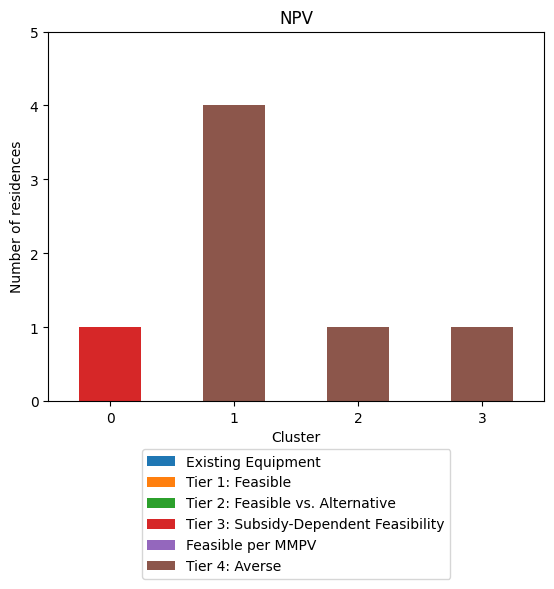

In [59]:
create_stacked_bar_chart(8, "NPV", prefix="alpha_beta")

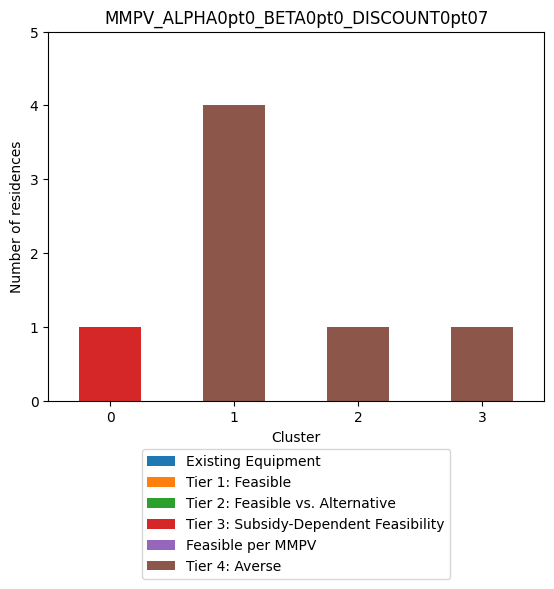

In [60]:
create_stacked_bar_chart(8, "MMPV_ALPHA0pt0_BETA0pt0_DISCOUNT0pt07", prefix="alpha_beta")

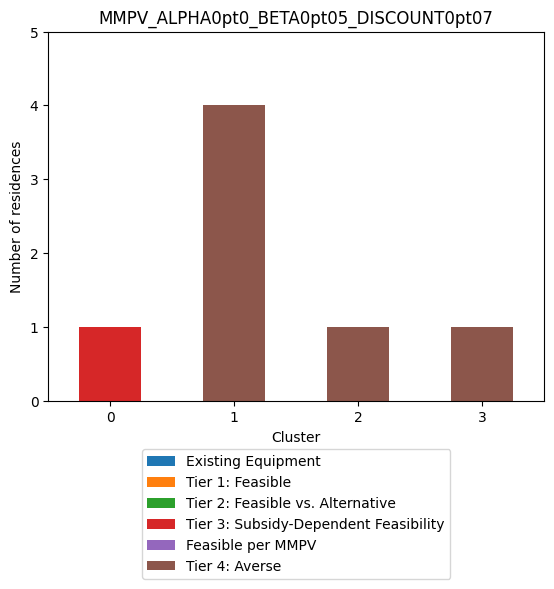

In [61]:
create_stacked_bar_chart(8, "MMPV_ALPHA0pt0_BETA0pt05_DISCOUNT0pt07", prefix="alpha_beta")

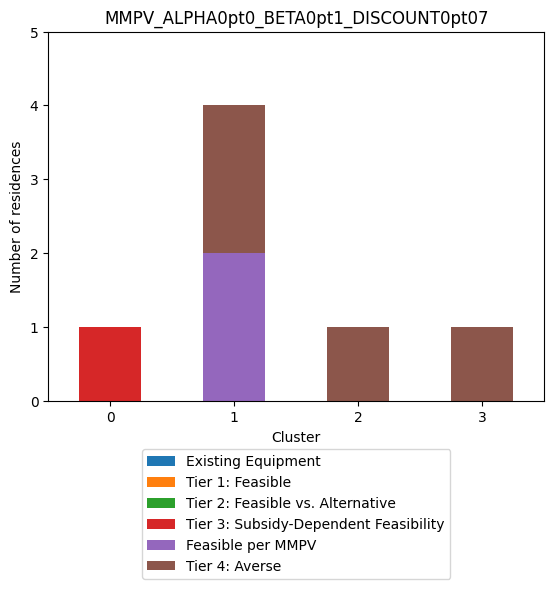

In [62]:
create_stacked_bar_chart(8, "MMPV_ALPHA0pt0_BETA0pt1_DISCOUNT0pt07", prefix="alpha_beta")

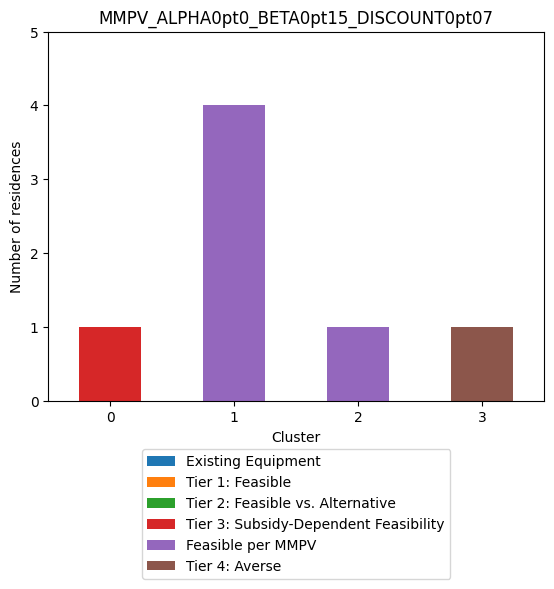

In [63]:
create_stacked_bar_chart(8, "MMPV_ALPHA0pt0_BETA0pt15_DISCOUNT0pt07", prefix="alpha_beta")

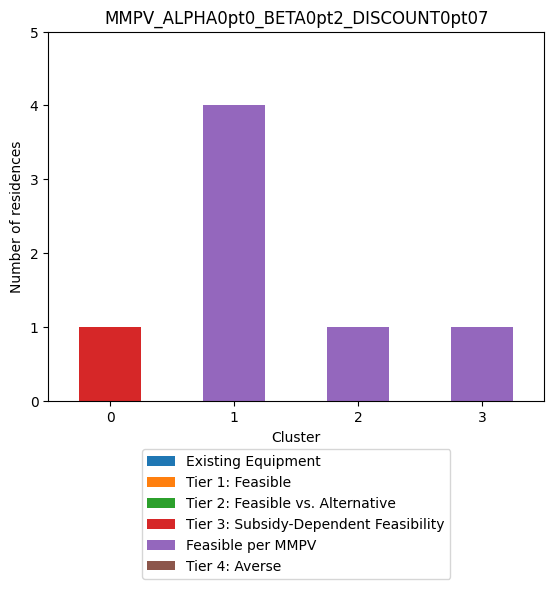

In [64]:
create_stacked_bar_chart(8, "MMPV_ALPHA0pt0_BETA0pt2_DISCOUNT0pt07", prefix="alpha_beta")

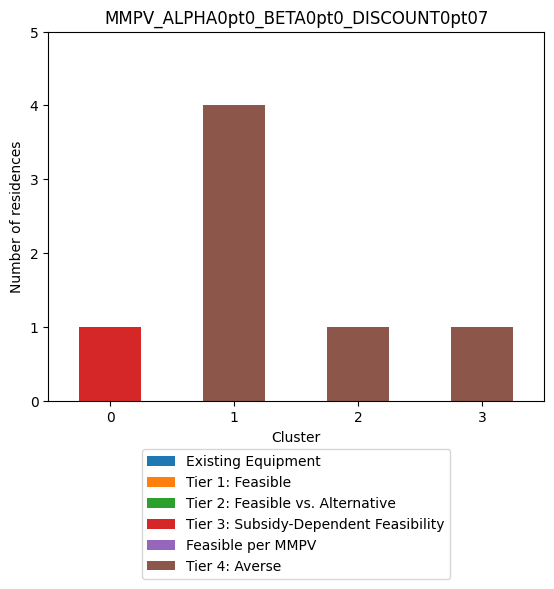

In [65]:
create_stacked_bar_chart(8, "MMPV_ALPHA0pt0_BETA0pt0_DISCOUNT0pt07", prefix="alpha_beta")

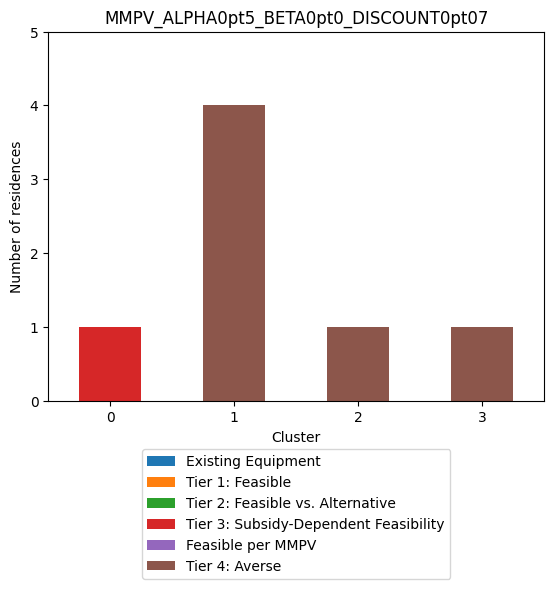

In [66]:
create_stacked_bar_chart(8, "MMPV_ALPHA0pt5_BETA0pt0_DISCOUNT0pt07", prefix="alpha_beta")

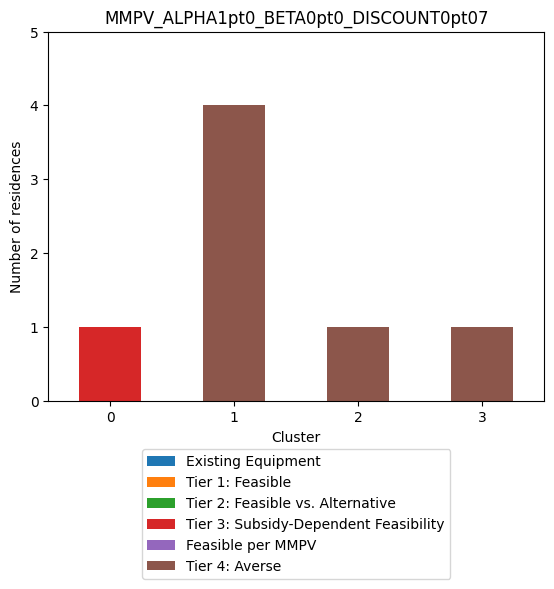

In [68]:
create_stacked_bar_chart(8, "MMPV_ALPHA1pt0_BETA0pt0_DISCOUNT0pt07", prefix="alpha_beta")

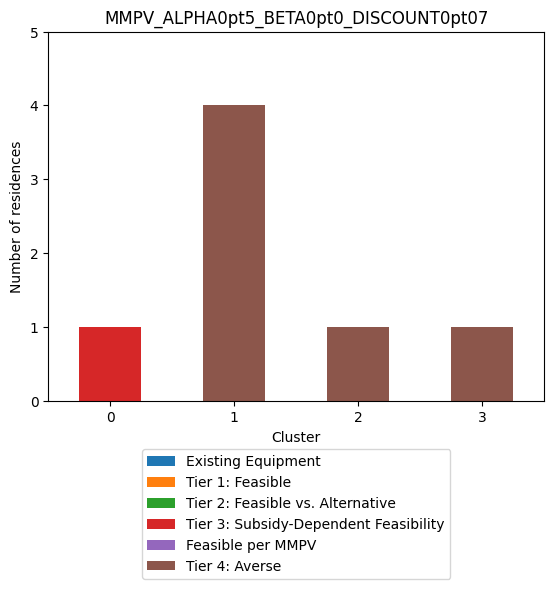

In [30]:
create_stacked_bar_chart(8, "MMPV_ALPHA0pt5_BETA0pt0_DISCOUNT0pt07", prefix="alpha_beta")

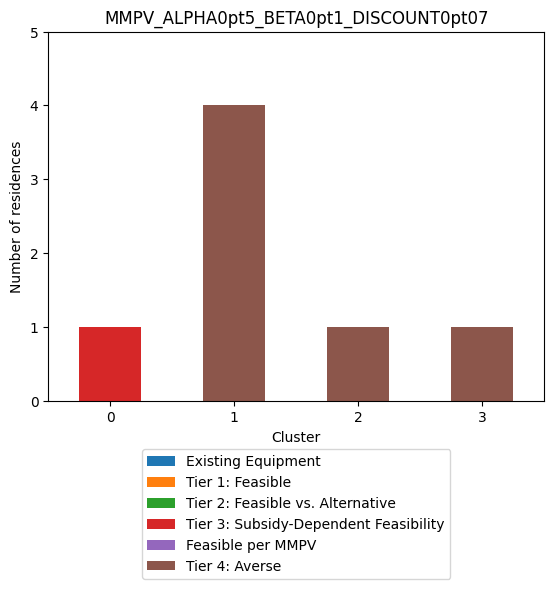

In [31]:
create_stacked_bar_chart(8, "MMPV_ALPHA0pt5_BETA0pt1_DISCOUNT0pt07", prefix="alpha_beta")

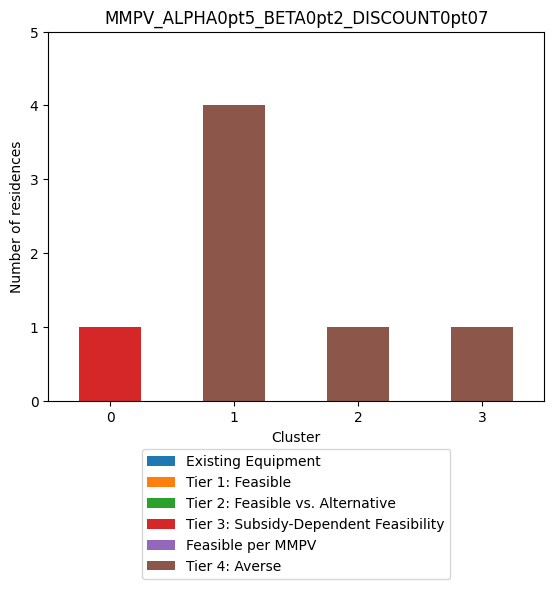

In [32]:
create_stacked_bar_chart(8, "MMPV_ALPHA0pt5_BETA0pt2_DISCOUNT0pt07", prefix="alpha_beta")

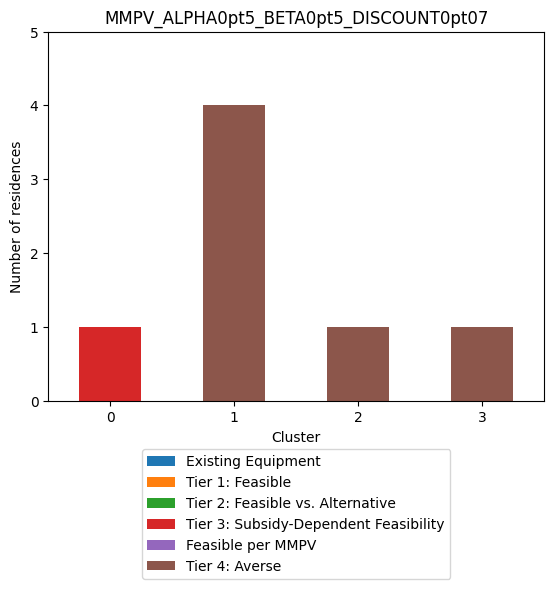

In [33]:
create_stacked_bar_chart(8, "MMPV_ALPHA0pt5_BETA0pt5_DISCOUNT0pt07", prefix="alpha_beta")

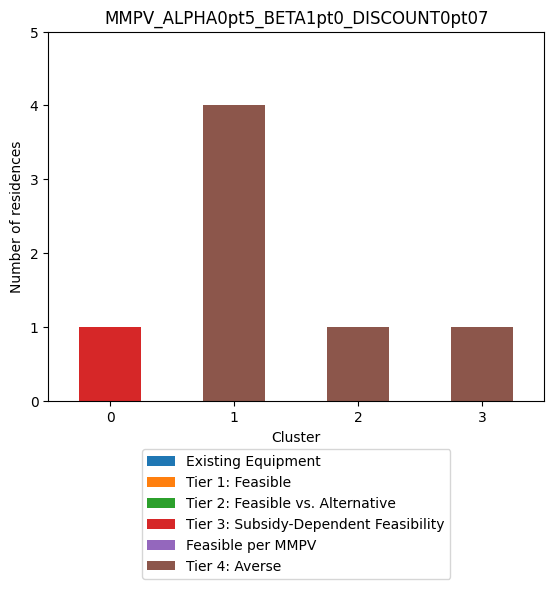

In [34]:
create_stacked_bar_chart(8, "MMPV_ALPHA0pt5_BETA1pt0_DISCOUNT0pt07", prefix="alpha_beta")

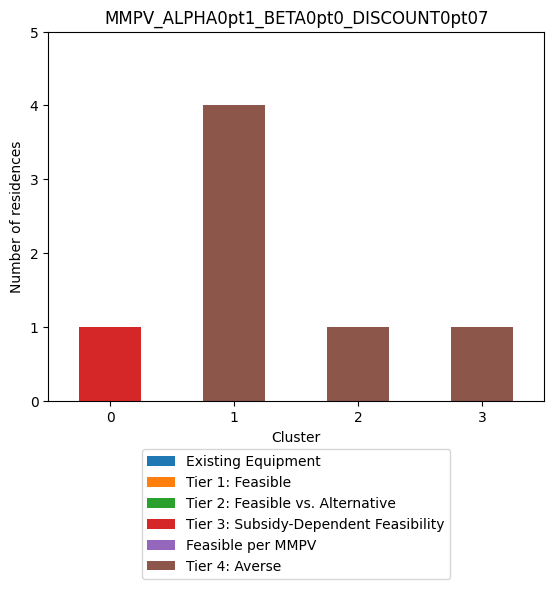

In [35]:
create_stacked_bar_chart(8, "MMPV_ALPHA0pt1_BETA0pt0_DISCOUNT0pt07", prefix="alpha_beta")

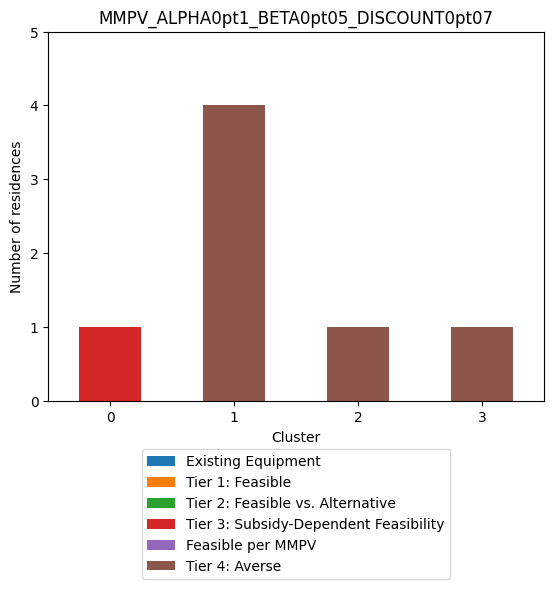

In [37]:
create_stacked_bar_chart(8, "MMPV_ALPHA0pt1_BETA0pt05_DISCOUNT0pt07", prefix="alpha_beta")

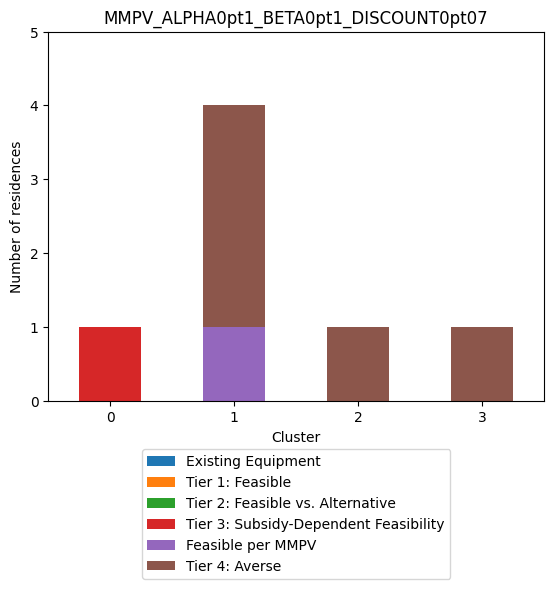

In [38]:
create_stacked_bar_chart(8, "MMPV_ALPHA0pt1_BETA0pt1_DISCOUNT0pt07", prefix="alpha_beta")

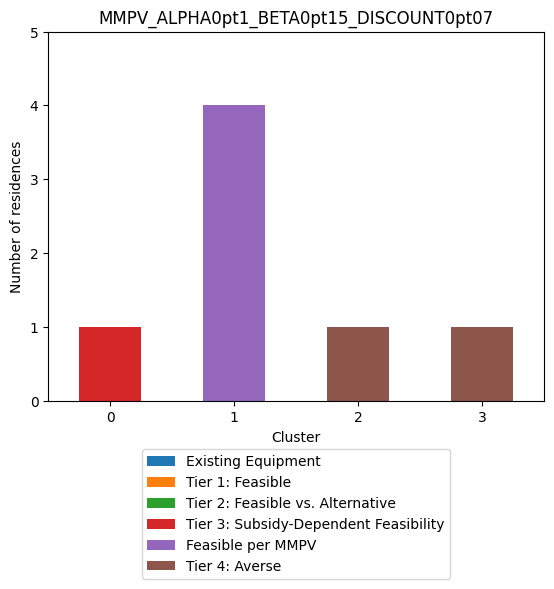

In [39]:
create_stacked_bar_chart(8, "MMPV_ALPHA0pt1_BETA0pt15_DISCOUNT0pt07", prefix="alpha_beta")

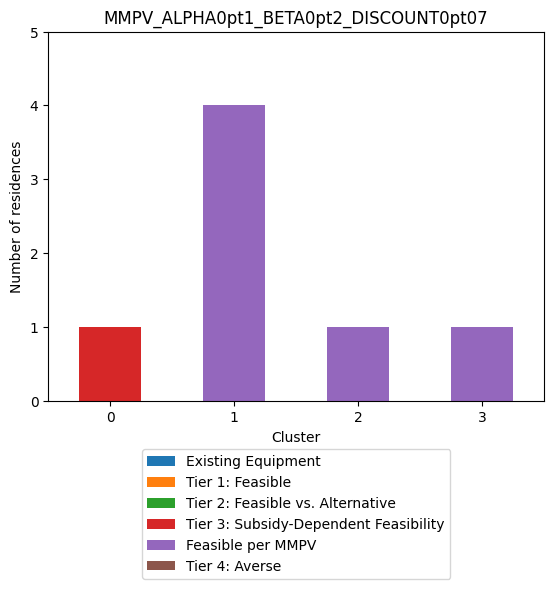

In [40]:
create_stacked_bar_chart(8, "MMPV_ALPHA0pt1_BETA0pt2_DISCOUNT0pt07", prefix="alpha_beta")

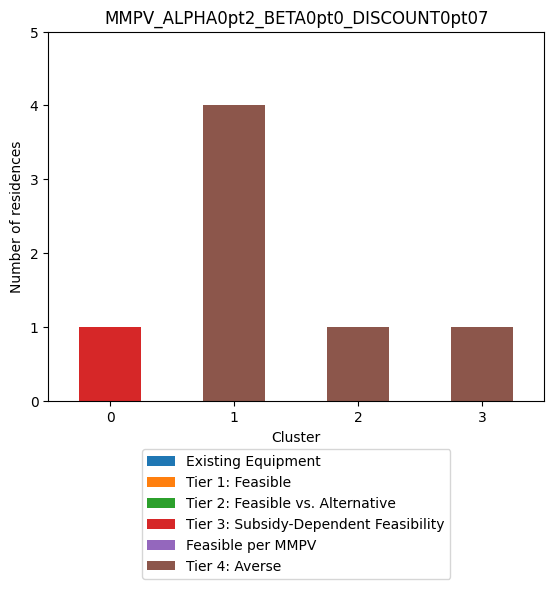

In [41]:
create_stacked_bar_chart(8, "MMPV_ALPHA0pt2_BETA0pt0_DISCOUNT0pt07", prefix="alpha_beta")

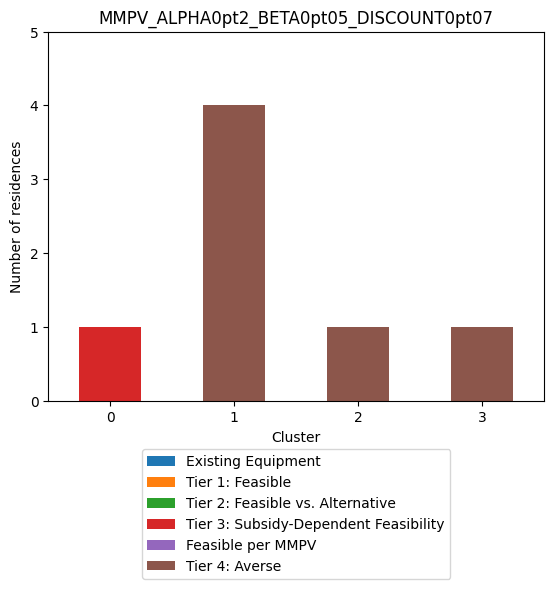

In [42]:
create_stacked_bar_chart(8, "MMPV_ALPHA0pt2_BETA0pt05_DISCOUNT0pt07", prefix="alpha_beta")

[1 0 0 3 2 0 0]


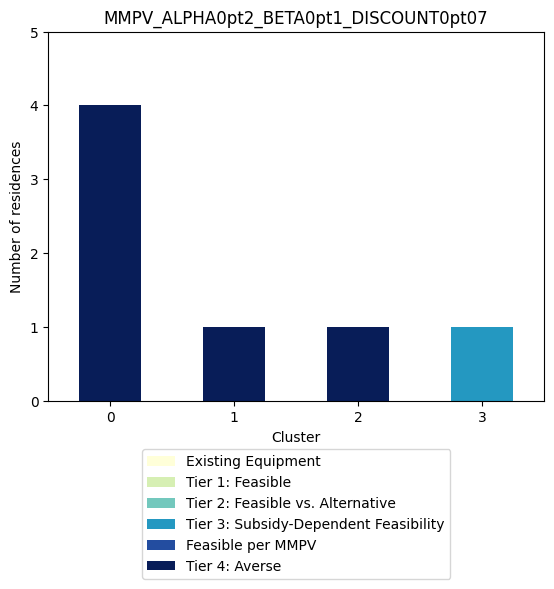

In [30]:
create_stacked_bar_chart(8, "MMPV_ALPHA0pt2_BETA0pt1_DISCOUNT0pt07", prefix="alpha_beta")

[1 0 0 3 2 0 0]


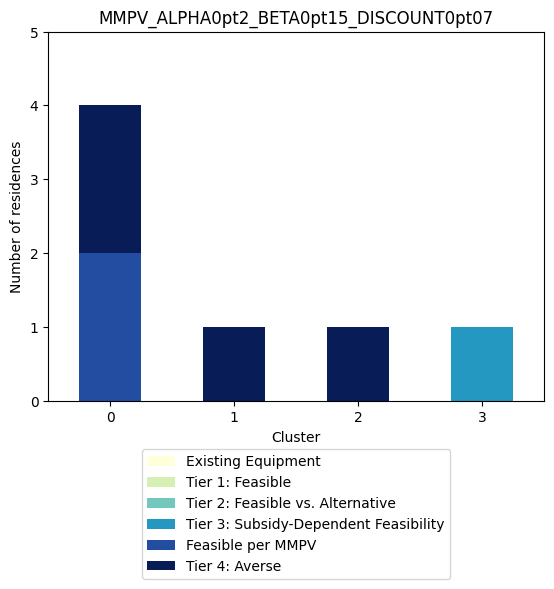

In [31]:
create_stacked_bar_chart(8, "MMPV_ALPHA0pt2_BETA0pt15_DISCOUNT0pt07", prefix="alpha_beta")

[1 0 0 3 2 0 0]


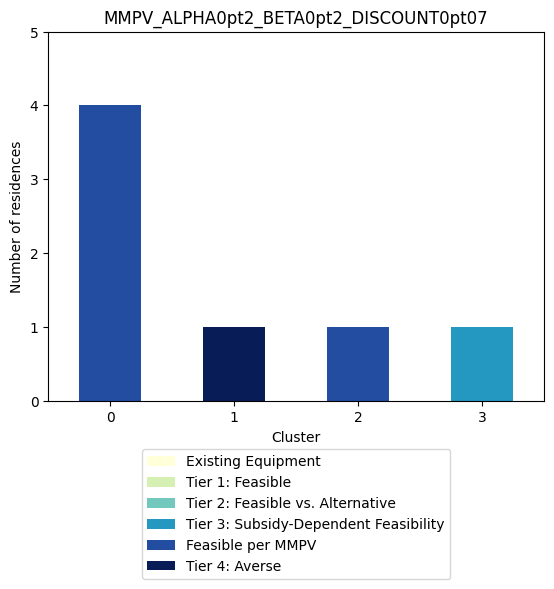

In [32]:
create_stacked_bar_chart(8, "MMPV_ALPHA0pt2_BETA0pt2_DISCOUNT0pt07", prefix="alpha_beta")

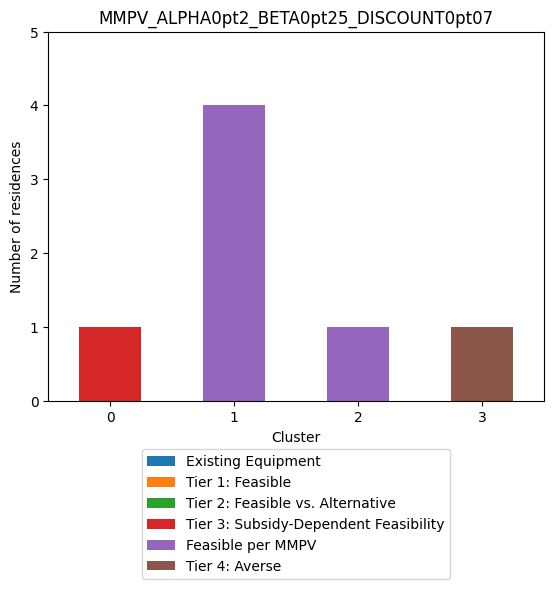

In [49]:
create_stacked_bar_chart(8, "MMPV_ALPHA0pt2_BETA0pt25_DISCOUNT0pt07", prefix="alpha_beta")

[1 0 0 3 2 0 0]


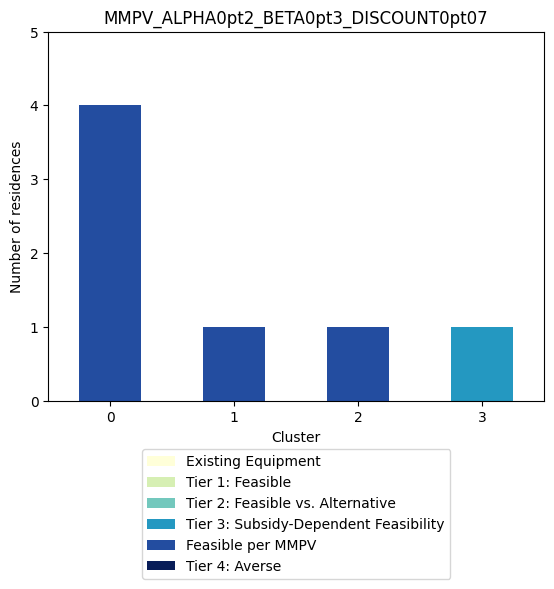

In [33]:
create_stacked_bar_chart(8, "MMPV_ALPHA0pt2_BETA0pt3_DISCOUNT0pt07", prefix="alpha_beta")

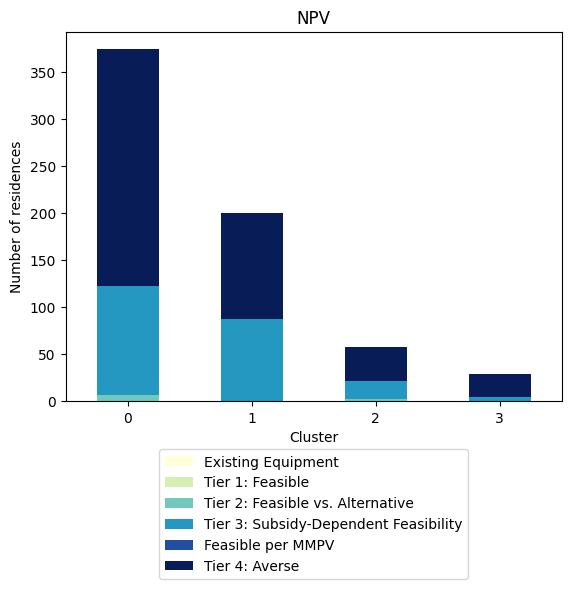

In [42]:
create_stacked_bar_chart(800, "NPV", prefix="alpha_beta")

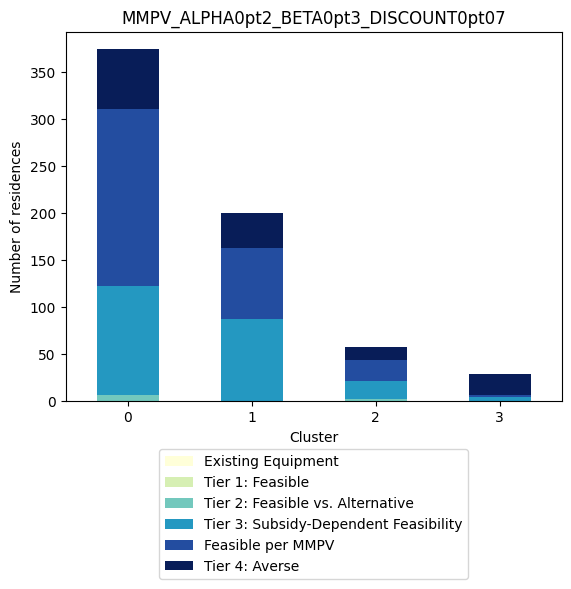

In [5]:
create_stacked_bar_chart(800, "MMPV_ALPHA0pt2_BETA0pt3_DISCOUNT0pt07", prefix="alpha_beta")

In [1]:
def create_pie_chart_no_clusters(region_list, num_residences, scenario, prefix="alpha_beta", save_fig = True): # no_cooling_benefits_25_year_lifetime
    if scenario == "NPV":
        adoption_tiers_to_use = original_adoption_tiers
    else:
        adoption_tiers_to_use = adoption_tiers
    filepath_name = os.path.join("output_results", f"comparing_tiers_of_{'_'.join(region_list)}_{num_residences}_{scenario}.csv")
    if not os.path.exists(filepath_name):
        table_to_fill = pd.DataFrame(index=adoption_tiers_to_use, columns=region_list)
        for region in region_list:
            file_name = os.path.join(os.getcwd(), "output_results",f"{region}_{num_residences}_all_unit_residence", f"{prefix}_{scenario}_tare_output.csv")
            # for unit_num in unit_numbers:
            #     for unit_type in building_unit_types:
            #         all_filenames.append()
                    
                    # file_name = os.path.join(os.getcwd(), "output_results",f"{region}_{unit_num}_{unit_type}_unit_residence", "no_cooling_benefits_25_year_lifetime_MMPV_ALPHApt9_DISCOUNTpt07_tare_output.csv")
                    # print(file_name)
            if os.path.exists(file_name):
                # print(file_name)
                output = pd.read_csv(file_name)

                building_IDs = output["bldg_id"]

                if region == "national_ASHP":

                    # buildstock_path = os.path.join("/home", "arnavgautam", "resstock-3.4.0", "resources", "national", f"all_national_{num_residences}_all_unit_buildstock.csv")
                    buildstock_path = os.path.join("/ocean", "projects", "eng220005p", "agautam3", "resstock-3.4.0", "resources", "national", f"all_national_{num_residences}_all_unit_buildstock.csv") # For PSC runs
                else:
                    buildstock_path = os.path.join("/ocean", "projects", "eng220005p", "agautam3", "resstock-3.4.0", "resources", "national", f"{region}_{num_residences}_all_unit_buildstock.csv") # For PSC runs
                buildstock_df = pd.read_csv(buildstock_path)
                full_building_id_list = buildstock_df["Building"]
                excluded_building_ids = set(full_building_id_list).difference(set(building_IDs))
                # else:
                #     excluded_building_ids = []
                # print(output.columns)
                # print(output.loc[0,"hvac_has_ducts"])
                for adoption_tier in adoption_tiers_to_use:
                    is_this_adoption_tier = output.loc[:,"iraRef_mp8_heating_adoption"] == adoption_tier
                    # print(np.sum(np.logical_and(is_in_this_cluster,is_this_adoption_tier)))
                    table_to_fill.loc[adoption_tier,region] = np.sum(is_this_adoption_tier)
                # if region == "national_ASHP":
                table_to_fill.loc["Existing Equipment",region] += len(excluded_building_ids) # len(buildstock_df[(buildstock_df["Building"].isin(excluded_building_ids)) & (buildstock_df["ASHRAE IECC Climate Zone 2004"] == climate_zone) & (buildstock_df["PUMA Metro Status"] == urbanization_level_dict[level_of_urbanization])])
            else:
                raise Exception(f"no file found for {prefix}_{scenario}_tare_output.csv")
                # table_to_fill.loc[adoption_tier,scenario] =  None
        table_to_fill = table_to_fill.rename(index={"Existing Equipment":"Don\'t have ducting"})
        table_to_fill.to_csv(filepath_name)
    else:
        table_to_fill = pd.read_csv(filepath_name, index_col=0)
        # table_to_fill = table_to_fill.set_index(table_to_fill.iloc[:,0], drop=True)
    print(table_to_fill)

    # Pie Chart
    for region in region_list:
        fig, ax = plt.subplots(figsize=(1,1))
        pie_plot_obj = table_to_fill.plot(kind='pie', y=region, colormap="YlGnBu", ylabel='', xlabel='', labels=None, legend=False, ax=ax)#, legend=True)
        fig.patch.set_alpha(0)
        ax.patch.set_alpha(0)
        ax.title.set_bbox(dict(facecolor='white', edgecolor='none', alpha=0.8))
        plt.title(region.split("_")[0].upper(), loc="center")
        # plt.title(region.replace("_", " ").upper(), loc="center")
        # plt.legend(loc="lower center", bbox_to_anchor=(0.5,-0.2))
    
    # # Bar Chart
    # table_to_fill.T.plot(kind='bar', stacked=True, colormap="YlGnBu")
    # plt.xticks(rotation=0)
    # plt.xlabel("Cluster")
    # plt.ylabel("Number of residences")
    # plt.legend(loc="lower center", bbox_to_anchor=(0.5,-0.5))
    # plt.title(scenario)

    if save_fig:
        plt.savefig(os.path.join("output_results", f"{'_'.join(region_list)}_{num_residences}_all_unit_residence", f"tiers_of_{'_'.join(region_list)}_{num_residences}_{scenario}.svg"))
    plt.show()

    return 


                                      urban_ohio urban_california  \
Existing Equipment                           240                0   
Tier 1: Feasible                               0                0   
Tier 2: Feasible vs. Alternative               6                5   
Tier 3: Subsidy-Dependent Feasibility        389                1   
Tier 4: Averse                               165              422   

                                      urban_florida  
Existing Equipment                                0  
Tier 1: Feasible                                  0  
Tier 2: Feasible vs. Alternative                188  
Tier 3: Subsidy-Dependent Feasibility             0  
Tier 4: Averse                                  483  


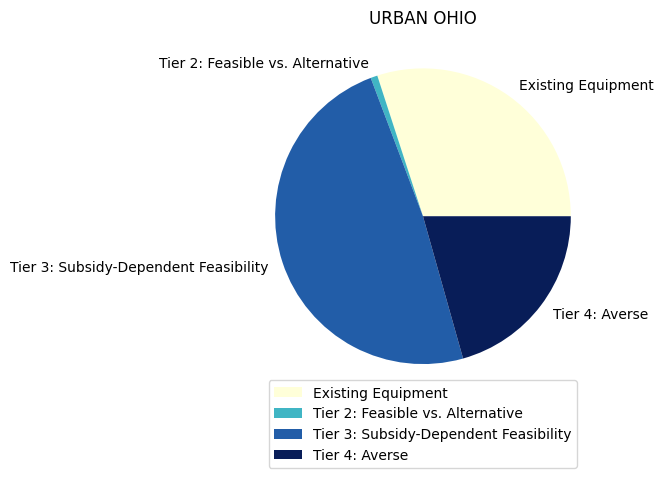

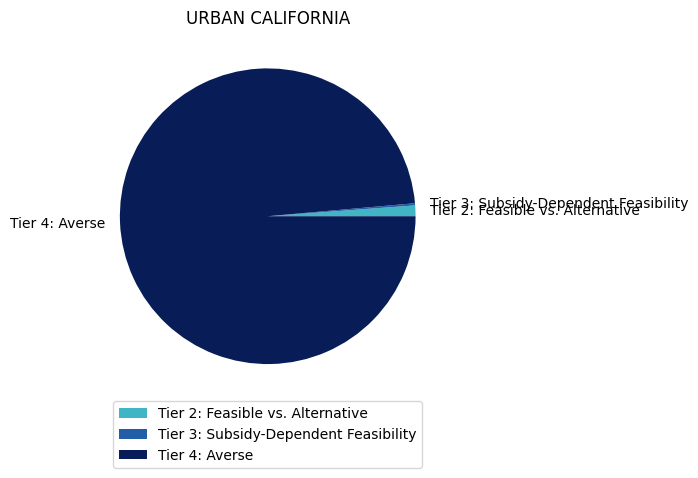

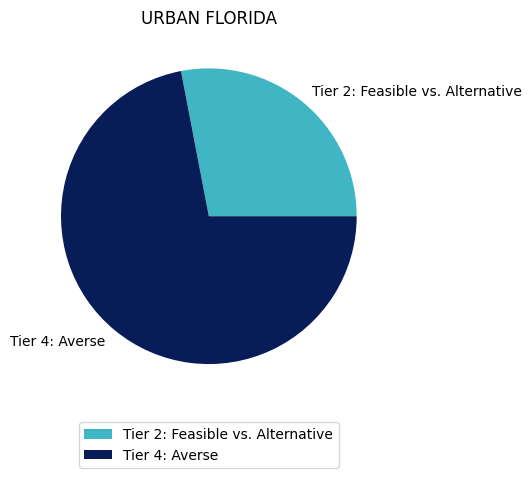

In [59]:
create_pie_chart_no_clusters(["urban_ohio","urban_california","urban_florida"], 800, "NPV", prefix="alpha_beta", save_fig = False)

                                       urban_ohio  rural_ohio
Existing Equipment                            240           0
Tier 1: Feasible                                0           0
Tier 2: Feasible vs. Alternative                6           8
Tier 3: Subsidy-Dependent Feasibility         389         403
Tier 4: Averse                                165         273


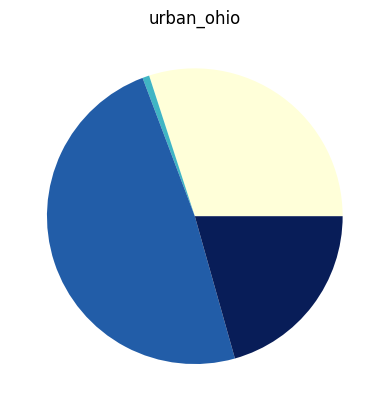

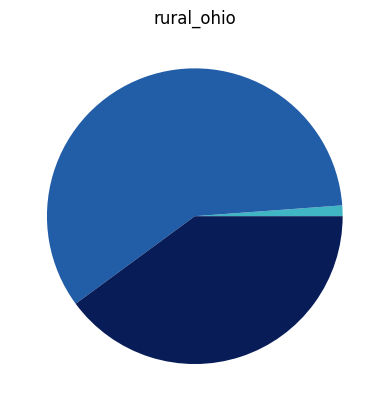

In [70]:
create_pie_chart_no_clusters(["urban_ohio","rural_ohio"], 800, "NPV", prefix="alpha_beta", save_fig = False)

                                      urban_utah
Existing Equipment                             0
Tier 1: Feasible                               0
Tier 2: Feasible vs. Alternative               2
Tier 3: Subsidy-Dependent Feasibility        177
Tier 4: Averse                               345


/tmp/ipykernel_501915/506965512.py:38: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pie_plot_obj = table_to_fill.plot(kind='pie', y=region, colormap="YlGnBu", ylabel='', xlabel='', legend=False, labels=None)#, legend=True)


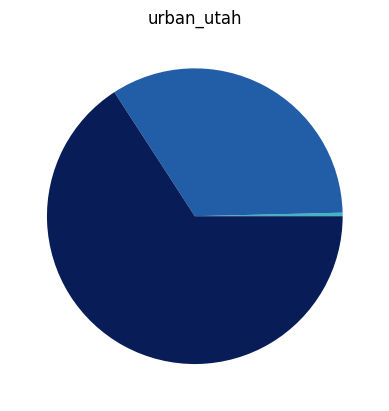

In [71]:
create_pie_chart_no_clusters(["urban_utah"], 800, "NPV", prefix="alpha_beta", save_fig = False)

                                      national_ASHP
Don't have ducting                             1291
Tier 1: Feasible                                  0
Tier 2: Feasible vs. Alternative                322
Tier 3: Subsidy-Dependent Feasibility          1799
Tier 4: Averse                                 4588


/tmp/ipykernel_66610/2987687984.py:26: DtypeWarning: Columns (76,77,78,132) have mixed types. Specify dtype option on import or set low_memory=False.
  buildstock_df = pd.read_csv(buildstock_path)


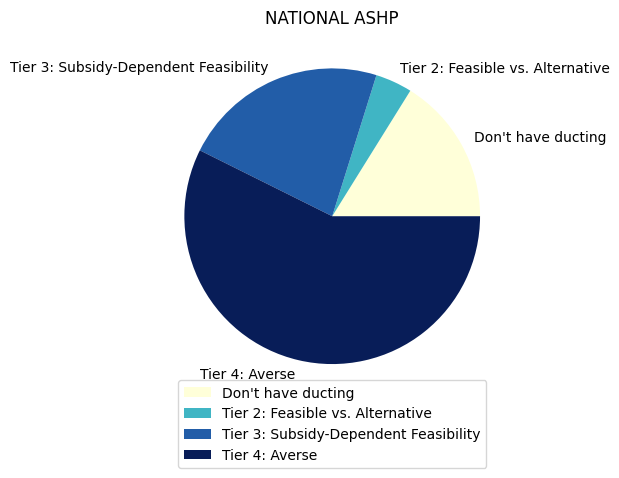

In [66]:
create_pie_chart_no_clusters(["national_ASHP"], 8000, "NPV", prefix="alpha_beta", save_fig = False)

In [4]:
def create_pie_charts_per_climate_zone(num_residences, scenario, prefix="alpha_beta", save_fig = True): # no_cooling_benefits_25_year_lifetime
    region_name = "national_ASHP"
    if scenario == "NPV":
        adoption_tiers_to_use = original_adoption_tiers
    else:
        adoption_tiers_to_use = adoption_tiers
    filepath_name = os.path.join("output_results", f"comparing_tiers_of_{region_name}_{num_residences}_{scenario}_per_climate_zone.csv")
    if not os.path.exists(filepath_name):
        table_to_fill = pd.DataFrame(index=adoption_tiers_to_use)
        tare_file_name = os.path.join(os.getcwd(), "output_results",f"{region_name}_{num_residences}_all_unit_residence", f"{prefix}_{scenario}_tare_output.csv")
        if os.path.exists(tare_file_name):
            tare_output = pd.read_csv(tare_file_name)
            building_IDs = tare_output["bldg_id"]
            buildstock_path = os.path.join("/ocean", "projects", "eng220005p", "agautam3", "resstock-3.4.0", "resources", "national", f"all_national_{num_residences}_all_unit_buildstock.csv")
            # buildstock_path = os.path.join("/home", "arnavgautam", "resstock-3.4.0", "resources", "national", f"all_national_{num_residences}_all_unit_buildstock.csv")
            buildstock_df = pd.read_csv(buildstock_path)
            full_building_id_list = buildstock_df["Building"]
            excluded_building_ids = set(full_building_id_list).difference(set(building_IDs))
            climate_zone_to_building_IDs_list_dict = {}
            for name, group in buildstock_df.groupby("ASHRAE IECC Climate Zone 2004"):
                climate_zone_to_building_IDs_list_dict[name] = group["Building"].tolist()
            # buildstock_df = buildstock_df[["Building", "ASHRAE IECC Climate Zone 2004"]]
            for climate_zone, buildings_in_climate_zone in climate_zone_to_building_IDs_list_dict.items():
                # buildings_in_climate_zone = [building_ID for building_ID in building_IDs if buildstock_df[buildstock_df["Building"]==building_ID][]]
                tare_output_subset = tare_output[tare_output["bldg_id"].isin(buildings_in_climate_zone)]
                for adoption_tier in adoption_tiers_to_use:
                    is_this_adoption_tier = tare_output_subset.loc[:,"iraRef_mp8_heating_adoption"] == adoption_tier
                    table_to_fill.loc[adoption_tier,climate_zone] = np.sum(is_this_adoption_tier)
                table_to_fill.loc["Existing Equipment",climate_zone] += len(buildstock_df[(buildstock_df["Building"].isin(excluded_building_ids)) & (buildstock_df["ASHRAE IECC Climate Zone 2004"] == climate_zone)]) # & (buildstock_df["PUMA Metro Status"] == urbanization_level_dict[level_of_urbanization])])
        else:
            raise Exception(f"no file found for {prefix}_{scenario}_tare_output.csv at {tare_file_name}")
        table_to_fill = table_to_fill.rename(index={"Existing Equipment":"Don\'t have ducting"})        
        table_to_fill.to_csv(filepath_name)
    else:
        table_to_fill = pd.read_csv(filepath_name, index_col=0)
    print(table_to_fill)

    # print(table_to_fill.loc[:,"8AK"])

    # print(table_to_fill.index)
    # print(table_to_fill.columns)
    # return

    # Pie Chart
    for climate_zone in table_to_fill.columns:
        # print(table_to_fill.index)
        fig,ax= plt.subplots(figsize=(1,1))
        if sum(table_to_fill.loc[:,climate_zone]) == 0:
            continue
        pie_plot_obj = table_to_fill.plot(kind='pie', y=climate_zone, colormap="YlGnBu", ylabel='', xlabel='', labels=None, legend=False, ax=ax)#, legend=True)
        plt.title(climate_zone.replace("_", " ").upper(), loc="center")
        fig.patch.set_alpha(0)
        ax.patch.set_alpha(0)
        ax.title.set_bbox(dict(facecolor='white', edgecolor='none', alpha=0.8))
        # plt.legend(loc="lower center", bbox_to_anchor=(0.5,-0.2))
    
    # # Bar Chart
    # table_to_fill.T.plot(kind='bar', stacked=True, colormap="YlGnBu")
    # plt.xticks(rotation=0)
    # plt.xlabel("Cluster")
    # plt.ylabel("Number of residences")
    # plt.legend(loc="lower center", bbox_to_anchor=(0.5,-0.5))
    # plt.title(scenario)

        if save_fig:
            plt.savefig(os.path.join("output_results", f"{region_name}_{num_residences}_all_unit_residence", f"tiers_of_{region_name}_{num_residences}_{scenario}_{climate_zone}.svg"))
        plt.show()


                                         1A     2A     2B     3A     3B  \
Don't have ducting                     43.0   80.0   11.0   70.0  116.0   
Tier 1: Feasible                        0.0    0.0    0.0    0.0    0.0   
Tier 2: Feasible vs. Alternative       30.0  130.0   23.0   76.0   11.0   
Tier 3: Subsidy-Dependent Feasibility   0.0    0.0    0.0   24.0    2.0   
Tier 4: Averse                         71.0  718.0  124.0  894.0  614.0   

                                          3C      4A    4B     4C     5A  \
Don't have ducting                      38.0   368.0   5.0   52.0  352.0   
Tier 1: Feasible                         0.0     0.0   0.0    0.0    0.0   
Tier 2: Feasible vs. Alternative         0.0    43.0   1.0    3.0    3.0   
Tier 3: Subsidy-Dependent Feasibility    1.0   263.0   9.0   70.0  913.0   
Tier 4: Averse                         149.0  1048.0  47.0  105.0  535.0   

                                          5B     6A    6B    7A  7AK   7B  8AK  
Don't have 

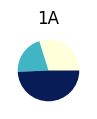

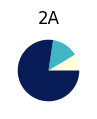

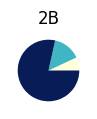

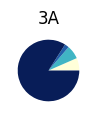

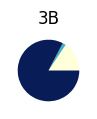

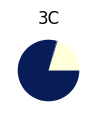

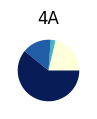

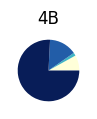

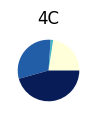

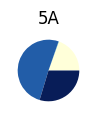

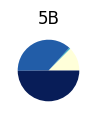

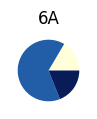

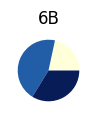

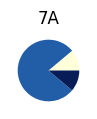

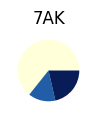

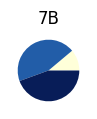

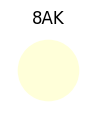

In [74]:
num_residences = 8000
scenario = "NPV"
create_pie_charts_per_climate_zone(num_residences, scenario, prefix="alpha_beta", save_fig = True)

In [9]:
climate_zones = ["1A","2A","2B","3A","3B","3C","4A","4B","4C","5A","5B","6A","6B","7A","7B"]
level_of_urbanization_dict = {
    "In metro area, principal city":"urban",
    "In metro area, not/partially in principal city":"suburban",
    "Not/partially in metro area":"rural",
}
urbanization_level_dict = {
    "urban":"In metro area, principal city",
    "suburban":"In metro area, not/partially in principal city",
    "rural":"Not/partially in metro area",
}

adoption_tiers_to_use = ['Tier 1: Feasible', 'Tier 2: Feasible vs. Alternative', 'Tier 3: Subsidy-Dependent Feasibility', 'Tier 4: Averse']

def create_table_per_climate_zone_and_level_of_urbanization(region_name = "national_ASHP", num_residences = 8000, version = ''): # no_cooling_benefits_25_year_lifetime
    
    scenario = "NPV"
    
    prefix="alpha_beta"
    filepath_name = os.path.join("output_results", f"comparing_tiers_of_{region_name}_{num_residences}_{scenario}_per_climate_zone_and_level_of_urbanization{version}.csv")
    if not os.path.exists(filepath_name):
        if region_name == "national_ASHP":
            table_to_fill = pd.DataFrame(index=pd.MultiIndex.from_product([climate_zones, level_of_urbanization_dict.values()], names=["Climate Zone", "Level of Urbanization"]))
        else:
            table_to_fill = pd.DataFrame(index=pd.MultiIndex.from_product([region_name.split("_")[:1], region_name.split("_")[1:]], names=["Climate Zone", "Level of Urbanization"]))
        tare_file_name = os.path.join(os.getcwd(), "output_results",f"{region_name}_{num_residences}_all_unit_residence{version}", f"{prefix}_{scenario}_tare_output.csv")
        if os.path.exists(tare_file_name):
            tare_output = pd.read_csv(tare_file_name)
            building_IDs = tare_output["bldg_id"]
            buildstock_path = os.path.join("/home", "arnavgautam", "resstock-3.4.0", "resources", "national", f"all_national_{num_residences}_all_unit_buildstock.csv")
            # buildstock_path = os.path.join("/ocean", "projects", "eng220005p", "agautam3", "resstock-3.4.0", "resources", "national", f"{'all_national' if region_name == 'national_ASHP' else region_name}_{num_residences}_all_unit_buildstock.csv") # For PSC runs
            buildstock_df = pd.read_csv(buildstock_path)
            full_building_id_list = buildstock_df["Building"]
            excluded_building_ids = set(full_building_id_list).difference(set(building_IDs))
            climate_zone_to_building_IDs_list_dict = {}
            level_of_urbanization_to_building_IDs_list_dict = {}
            for name, group in buildstock_df.groupby("ASHRAE IECC Climate Zone 2004"):
                print(name)
                climate_zone_to_building_IDs_list_dict[name] = group["Building"].tolist()
            for name, group in buildstock_df.groupby("PUMA Metro Status"):
                print(name)
                level_of_urbanization_to_building_IDs_list_dict[level_of_urbanization_dict[name]] = group["Building"].tolist()
            # buildstock_df = buildstock_df[["Building", "ASHRAE IECC Climate Zone 2004"]]
            for climate_zone, buildings_in_climate_zone in climate_zone_to_building_IDs_list_dict.items():
                for level_of_urbanization, buildings_in_level_of_urbanization in level_of_urbanization_to_building_IDs_list_dict.items():
                    # buildings_in_climate_zone = [building_ID for building_ID in building_IDs if buildstock_df[buildstock_df["Building"]==building_ID][]]
                    tare_output_subset = tare_output[(tare_output["bldg_id"].isin(buildings_in_climate_zone)) & (tare_output["bldg_id"].isin(buildings_in_level_of_urbanization))]
                    for adoption_tier in adoption_tiers_to_use:
                        # is_this_adoption_tier = tare_output_subset.loc[:,"iraRef_mp8_heating_adoption"] == adoption_tier
                        is_this_adoption_tier = tare_output_subset.loc[:,"preIRA_mp8_heating_adoption"] == adoption_tier
                        table_to_fill.loc[(climate_zone,level_of_urbanization), adoption_tier] = np.sum(is_this_adoption_tier)
                    table_to_fill.loc[(climate_zone,level_of_urbanization), 'Don\'t have ducting'] = len(buildstock_df[(buildstock_df["Building"].isin(excluded_building_ids)) & (buildstock_df["ASHRAE IECC Climate Zone 2004"] == climate_zone) & (buildstock_df["PUMA Metro Status"] == urbanization_level_dict[level_of_urbanization])])
        else:
            raise Exception(f"no file found for {prefix}_{scenario}_tare_output.csv at {tare_file_name}")
        table_to_fill["Total"] = table_to_fill.sum(axis=1)
        new_column_order = ['Don\'t have ducting']
        new_column_order.extend(adoption_tiers_to_use)
        new_column_order.append("Total")
        table_to_fill = table_to_fill.loc[:,new_column_order]
        table_to_fill.to_csv(filepath_name)
    else:
        table_to_fill = pd.read_csv(filepath_name, index_col=[0,1])
    return table_to_fill

    # # print(table_to_fill.loc[:,"8AK"])

    # # print(table_to_fill.index)
    # # print(table_to_fill.columns)
    # # return

    # # Pie Chart
    # for climate_zone in table_to_fill.columns:
    #     # print(table_to_fill.index)
    #     fig,ax= plt.subplots()
    #     if sum(table_to_fill.loc[:,climate_zone]) == 0:
    #         continue
    #     pie_plot_obj = table_to_fill.plot(kind='pie', y=climate_zone, colormap="YlGnBu", ylabel='', xlabel='', labels=None, legend=False, ax=ax)#, legend=True)
    #     plt.title(climate_zone.replace("_", " ").upper(), loc="center")
    #     fig.patch.set_alpha(0)
    #     ax.patch.set_alpha(0)
    #     ax.title.set_bbox(dict(facecolor='white', edgecolor='none', alpha=0.8))
    #     # plt.legend(loc="lower center", bbox_to_anchor=(0.5,-0.2))
    
    # # # Bar Chart
    # # table_to_fill.T.plot(kind='bar', stacked=True, colormap="YlGnBu")
    # # plt.xticks(rotation=0)
    # # plt.xlabel("Cluster")
    # # plt.ylabel("Number of residences")
    # # plt.legend(loc="lower center", bbox_to_anchor=(0.5,-0.5))
    # # plt.title(scenario)

    #     if save_fig:
    #         plt.savefig(os.path.join("output_results", f"{region_name}_{num_residences}_all_unit_residence", f"tiers_of_{region_name}_{num_residences}_{scenario}_{climate_zone}.svg"))
    #     plt.show()


In [10]:
table_to_fill = create_table_per_climate_zone_and_level_of_urbanization()

In [11]:
table_to_fill["Percentile"] = (table_to_fill["Tier 1: Feasible"] + table_to_fill["Tier 2: Feasible vs. Alternative"] + table_to_fill["Tier 3: Subsidy-Dependent Feasibility"]) / table_to_fill["Total"]
table_to_fill

Don't have ducting  Tier 1: Feasible  \
1A  urban                    7.0               0.0   
    suburban                25.0               0.0   
    rural                   11.0               0.0   
2A  urban                   13.0               0.0   
    suburban                50.0               0.0   
    rural                   17.0               0.0   
2B  urban                    5.0               0.0   
    suburban                 6.0               0.0   
    rural                    0.0               0.0   
3A  urban                    9.0               0.0   
    suburban                33.0               0.0   
    rural                   28.0               0.0   
3B  urban                   52.0               0.0   
    suburban                63.0               0.0   
    rural                    1.0               0.0   
3C  urban                   15.0               0.0   
    suburban                22.0               0.0   
    rural                    1.0               0.0   
4A  urban                  209.0               0.0   
    suburban               124.0               0.0   
    rural                   35.0               0.0   
4B  urban                    0.0               0.0   
    suburban                 3.0               0.0   
    rural                    2.0               0.0   
4C  urban                   13.0               0.0   
    suburban                28.0               0.0   
    rural                   11.0               0.0   
5A  urban                   92.0               0.0   
    suburban               225.0               0.0   
    rural                   35.0               0.0   
5B  urban                    2.0               0.0   
    suburban                18.0               0.0   
    rural                   18.0               0.0   
5C  urban                    NaN               NaN   
    suburban                 NaN               NaN   
    rural                    NaN               NaN   
6A  urban                   11.0               0.0   
    suburban                37.0               0.0   
    rural                   33.0               0.0   
6B  urban                    0.0               0.0   
    suburban                 1.0               0.0   
    rural                   15.0               0.0   
7A  urban                    0.0               0.0   
    suburban                 1.0               0.0   
    rural                    6.0               0.0   
7B  urban                    0.0               0.0   
    suburban                 0.0               0.0   
    rural                    1.0               0.0   
7AK suburban                 0.0               0.0   
    urban                    3.0               0.0   
    rural                    6.0               0.0   
8AK suburban                 0.0               0.0   
    urban                    0.0               0.0   
    rural                    4.0               0.0   

              Tier 2: Feasible vs. Alternative  \
1A  urban                                  3.0   
    suburban                              26.0   
    rural                                  1.0   
2A  urban                                 11.0   
    suburban                             104.0   
    rural                                 15.0   
2B  urban                                  7.0   
    suburban                              14.0   
    rural                                  2.0   
3A  urban                                  7.0   
    suburban                              41.0   
    rural                                 28.0   
3B  urban                                  4.0   
    suburban                               7.0   
    rural                                  0.0   
3C  urban                                  0.0   
    suburban                               0.0   
    rural                                  0.0   
4A  urban                                  6.0   
    suburban                              2

In [15]:
table_to_fill.index.names = ["Climate Zone", "Level of Urbanization"]

table_to_fill.pivot_table(
    index="Climate Zone",
    columns="Level of Urbanization",
    values="Percentile"
).fillna(0)

# table_to_fill
# table_to_fill["Total"].sum()

Level of Urbanization     rural  suburban     urban
Climate Zone                                       
1A                     0.066667  0.228070  0.200000
2A                     0.120968  0.143845  0.135802
2B                     0.333333  0.129630  0.159091
3A                     0.098266  0.090062  0.108108
3B                     0.000000  0.014159  0.032895
3C                     0.000000  0.006849  0.000000
4A                     0.152500  0.225187  0.088312
4B                     0.291667  0.085714  0.000000
4C                     0.054054  0.371069  0.352941
5A                     0.621795  0.517054  0.273632
5B                     0.267606  0.400966  0.480000
6A                     0.668033  0.639269  0.500000
6B                     0.402985  0.857143  0.000000
7A                     0.781818  0.750000  0.000000
7AK                    0.000000  0.000000  0.285714
7B                     0.444444  0.000000  0.000000
8AK                    0.000000  0.000000  0.000000

In [6]:
table_to_fill_DEBUGGED = create_table_per_climate_zone_and_level_of_urbanization(version="_DEBUGGED")
table_to_fill_DEBUGGED["Percentile"] = (table_to_fill_DEBUGGED["Tier 1: Feasible"] + table_to_fill_DEBUGGED["Tier 2: Feasible vs. Alternative"] + table_to_fill_DEBUGGED["Tier 3: Subsidy-Dependent Feasibility"]) / table_to_fill_DEBUGGED["Total"]
table_to_fill_DEBUGGED

Don't have ducting  Tier 1: Feasible  \
1A  urban                    7.0               0.0   
    suburban                25.0               0.0   
    rural                   11.0               0.0   
2A  urban                   13.0               0.0   
    suburban                50.0               0.0   
    rural                   17.0               0.0   
2B  urban                    5.0               0.0   
    suburban                 6.0               0.0   
    rural                    0.0               0.0   
3A  urban                    9.0               0.0   
    suburban                33.0               0.0   
    rural                   28.0               0.0   
3B  urban                   52.0               0.0   
    suburban                63.0               0.0   
    rural                    1.0               0.0   
3C  urban                   15.0               0.0   
    suburban                22.0               0.0   
    rural                    1.0               0.0   
4A  urban                  209.0               0.0   
    suburban               124.0               0.0   
    rural                   35.0               0.0   
4B  urban                    0.0               0.0   
    suburban                 3.0               0.0   
    rural                    2.0               0.0   
4C  urban                   13.0               0.0   
    suburban                28.0               0.0   
    rural                   11.0               0.0   
5A  urban                   92.0               0.0   
    suburban               225.0               0.0   
    rural                   35.0               0.0   
5B  urban                    2.0               0.0   
    suburban                18.0               0.0   
    rural                   18.0               0.0   
6A  urban                   11.0               0.0   
    suburban                37.0               0.0   
    rural                   33.0               0.0   
6B  urban                    0.0               0.0   
    suburban                 1.0               0.0   
    rural                   15.0               0.0   
7A  urban                    0.0               0.0   
    suburban                 1.0               0.0   
    rural                    6.0               0.0   
7B  urban                    0.0               0.0   
    suburban                 0.0               0.0   
    rural                    1.0               0.0   
7AK suburban                 0.0               0.0   
    urban                    3.0               0.0   
    rural                    6.0               0.0   
8AK suburban                 0.0               0.0   
    urban                    0.0               0.0   
    rural                    4.0               0.0   

              Tier 2: Feasible vs. Alternative  \
1A  urban                                  4.0   
    suburban                              58.0   
    rural                                  2.0   
2A  urban                                 39.0   
    suburban                             439.0   
    rural                                 76.0   
2B  urban                                 25.0   
    suburban                              60.0   
    rural                                  4.0   
3A  urban                                 30.0   
    suburban                             303.0   
    rural                                212.0   
3B  urban                                 20.0   
    suburban                             111.0   
    rural                                  8.0   
3C  urban                                  2.0   
    suburban                              25.0   
    rural                                  0.0   
4A  urban                                 32.0   
    suburban                             216.0   
    rural                                184.0   
4B  urban                                  0.0   
    suburban                               2.0   
    r

In [7]:
# Assume `df` is your original multiindexed DataFrame
# Reset index for plotting
df_plot = table_to_fill.reset_index()
df_plot = df_plot.rename(columns={"level_0":"climate_zone","level_1":"level_of_urbanization"})
print(df_plot)



   climate_zone level_of_urbanization  Don't have ducting  Tier 1: Feasible  \
0            1A                 urban                 7.0               0.0   
1            1A              suburban                25.0               0.0   
2            1A                 rural                11.0               0.0   
3            2A                 urban                13.0               0.0   
4            2A              suburban                50.0               0.0   
5            2A                 rural                17.0               0.0   
6            2B                 urban                 5.0               0.0   
7            2B              suburban                 6.0               0.0   
8            2B                 rural                 0.0               0.0   
9            3A                 urban                 9.0               0.0   
10           3A              suburban                33.0               0.0   
11           3A                 rural               

In [8]:
# Specify the columns to use for category plotting (exclude 'Total')
category_cols = [col for col in table_to_fill.columns if col not in ['Total']]

# Melt for long-form dataframe suitable for seaborn
df_melted = df_plot.melt(
    id_vars=['climate_zone', 'level_of_urbanization'],
    value_vars=category_cols,
    var_name='Category',
    value_name='Count'
)

df_melted

climate_zone level_of_urbanization            Category      Count
0             1A                 urban  Don't have ducting   7.000000
1             1A              suburban  Don't have ducting  25.000000
2             1A                 rural  Don't have ducting  11.000000
3             2A                 urban  Don't have ducting  13.000000
4             2A              suburban  Don't have ducting  50.000000
..           ...                   ...                 ...        ...
319          7AK                 urban          Percentile   0.285714
320          7AK                 rural          Percentile   0.000000
321          8AK              suburban          Percentile        NaN
322          8AK                 urban          Percentile        NaN
323          8AK                 rural          Percentile   0.000000

[324 rows x 4 columns]

In [8]:
# df_melted

# Optional: Normalize counts to percentages within each group
df_melted['Percentage'] = (
    df_melted.groupby(['climate_zone', 'level_of_urbanization'])['Count']
    .transform(lambda x: x / x.sum() * 100)
)

df_melted

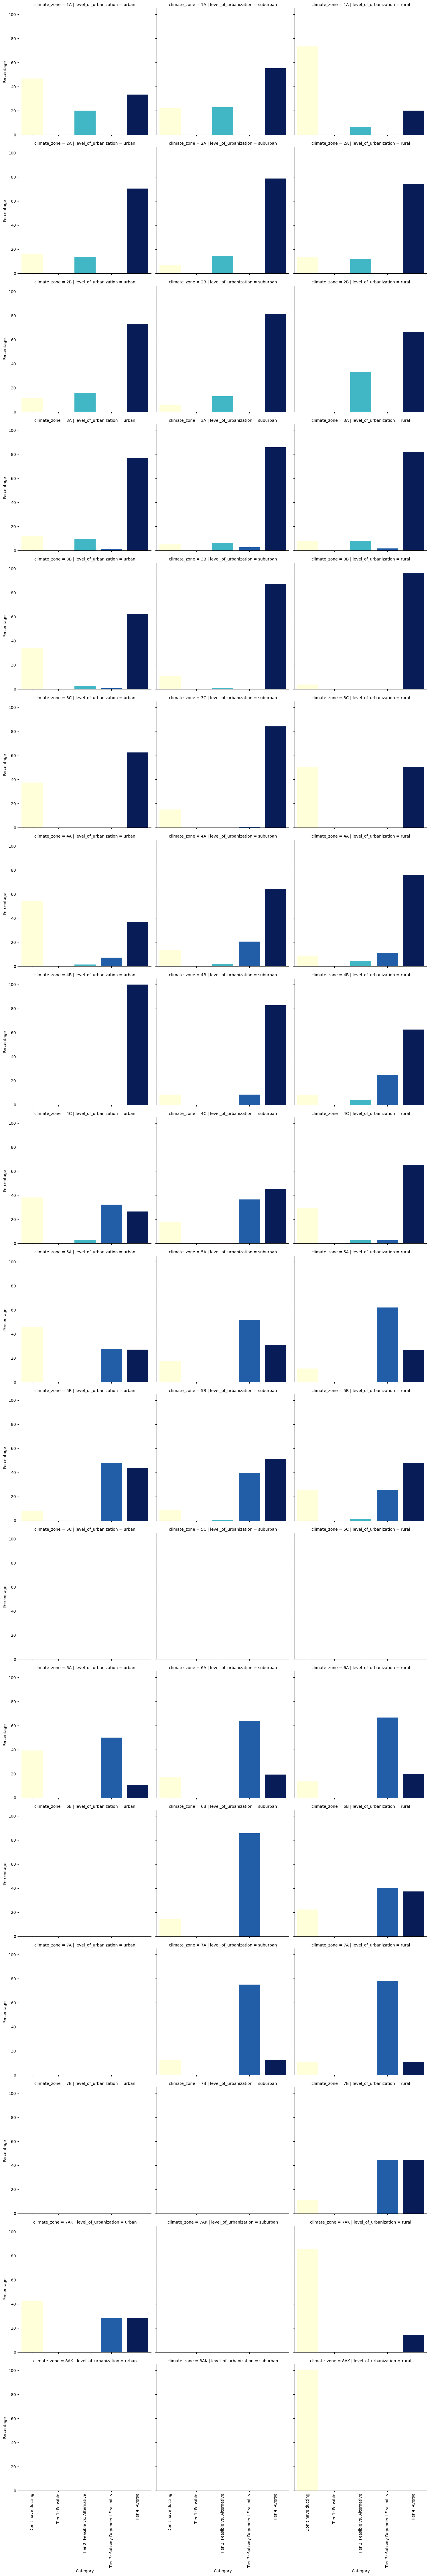

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


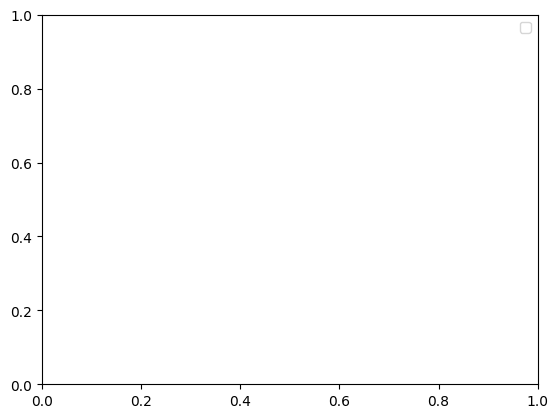

In [113]:
# Create category-to-color mapping
unique_categories = ["Don't have ducting"] + adoption_tiers_to_use
num_categories = len(unique_categories)

# Map each category to an index
category_to_index = {cat: i for i, cat in enumerate(unique_categories)}

# Define colormap and norm
cmap = plt.cm.get_cmap('YlGnBu', num_categories)
norm = mcolors.BoundaryNorm(boundaries=np.arange(num_categories + 1), ncolors=num_categories)

# Plot without hue
g = sns.catplot(
    data=df_melted,
    x='Category', y='Percentage',
    col='level_of_urbanization',
    row='climate_zone',
    kind='bar',
    height=5, aspect=1,
    sharey=True
)

# Apply custom colors to bars
for ax in g.axes.flat:
    # print(ax)
    xticks = ax.get_xticks()
        
    for bar in ax.patches:
        category_label = bar.get_x() + bar.get_width() / 2
        # xticklabels = [tick.get_text() for tick in ax.get_xticklabels()]
        idx = int(np.round(category_label))
        # if 0 <= idx < len(xticklabels):
        category = unique_categories[idx]
        color_idx = category_to_index.get(category, 0)
        bar.set_facecolor(cmap(color_idx))

    ax.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.legend()
plt.show()



g.savefig(os.path.join("output_results", f"national_ASHP_8000_all_unit_residence", f"percent_breakdown_by_climate_zone_and_urbanization_level.svg"))


In [3]:
def create_pie_charts_per_climate_zone_and_level_of_urbanization(): # no_cooling_benefits_25_year_lifetime
    region_name = "national_ASHP"
    table_to_plot = create_table_per_climate_zone_and_level_of_urbanization()
    table_to_plot = table_to_plot.drop("Total",axis=1)
    
    # Pie Chart
    for (climate_zone,level_of_urbanization) in table_to_plot.index:
        try:
            fig,ax= plt.subplots(figsize=(1,1))
            row_data = table_to_plot.loc[(climate_zone,level_of_urbanization)]

            pie_plot_obj = row_data.plot.pie(subplots=True, colormap="YlGnBu" , ylabel='', xlabel='', labels=None, legend=False, ax=ax) #
            plt.title(f"{climate_zone} {level_of_urbanization.title()}", loc="center")
            fig.patch.set_alpha(0)
            ax.patch.set_alpha(0)
            ax.title.set_bbox(dict(facecolor='white', edgecolor='none', alpha=0.8))
            # plt.legend(loc="lower center", bbox_to_anchor=(0.5,-0.2))
            plt.show()
        except Exception as e:
            continue
       


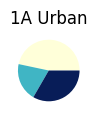

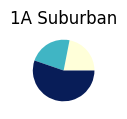

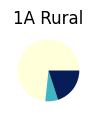

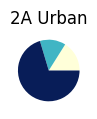

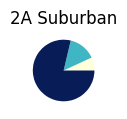

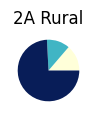

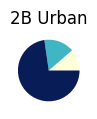

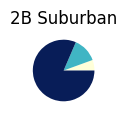

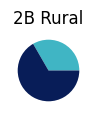

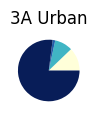

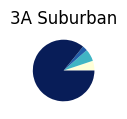

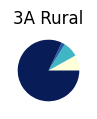

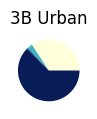

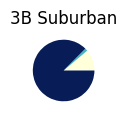

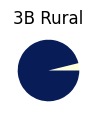

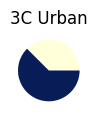

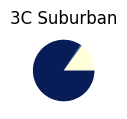

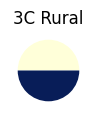

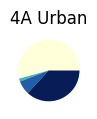

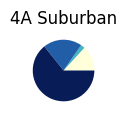

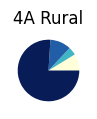

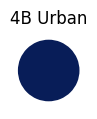

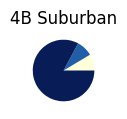

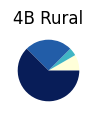

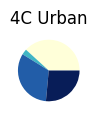

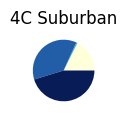

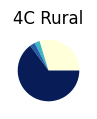

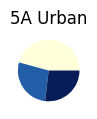

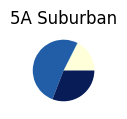

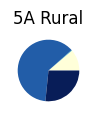

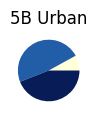

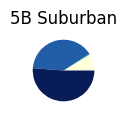

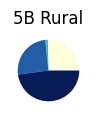

/ocean/projects/eng220005p/agautam3/venv38/lib/python3.8/site-packages/matplotlib/axes/_axes.py:3056: RuntimeWarning: invalid value encountered in divide
  x = x / sx
/ocean/projects/eng220005p/agautam3/venv38/lib/python3.8/site-packages/matplotlib/axes/_axes.py:3056: RuntimeWarning: invalid value encountered in divide
  x = x / sx
/ocean/projects/eng220005p/agautam3/venv38/lib/python3.8/site-packages/matplotlib/axes/_axes.py:3056: RuntimeWarning: invalid value encountered in divide
  x = x / sx


ValueError: need at least one array to concatenate

<Figure size 100x100 with 1 Axes>

ValueError: need at least one array to concatenate

<Figure size 100x100 with 1 Axes>

ValueError: need at least one array to concatenate

<Figure size 100x100 with 1 Axes>

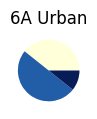

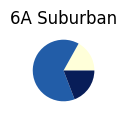

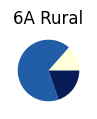

/ocean/projects/eng220005p/agautam3/venv38/lib/python3.8/site-packages/matplotlib/axes/_axes.py:3056: RuntimeWarning: invalid value encountered in divide
  x = x / sx


ValueError: need at least one array to concatenate

<Figure size 100x100 with 1 Axes>

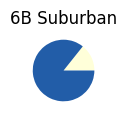

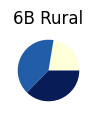

/ocean/projects/eng220005p/agautam3/venv38/lib/python3.8/site-packages/matplotlib/axes/_axes.py:3056: RuntimeWarning: invalid value encountered in divide
  x = x / sx


ValueError: need at least one array to concatenate

<Figure size 100x100 with 1 Axes>

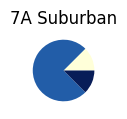

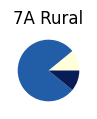

/ocean/projects/eng220005p/agautam3/venv38/lib/python3.8/site-packages/matplotlib/axes/_axes.py:3056: RuntimeWarning: invalid value encountered in divide
  x = x / sx
/ocean/projects/eng220005p/agautam3/venv38/lib/python3.8/site-packages/matplotlib/axes/_axes.py:3056: RuntimeWarning: invalid value encountered in divide
  x = x / sx


ValueError: need at least one array to concatenate

<Figure size 100x100 with 1 Axes>

ValueError: need at least one array to concatenate

<Figure size 100x100 with 1 Axes>

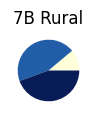

/ocean/projects/eng220005p/agautam3/venv38/lib/python3.8/site-packages/matplotlib/axes/_axes.py:3056: RuntimeWarning: invalid value encountered in divide
  x = x / sx


ValueError: need at least one array to concatenate

<Figure size 100x100 with 1 Axes>

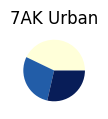

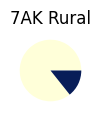

/ocean/projects/eng220005p/agautam3/venv38/lib/python3.8/site-packages/matplotlib/axes/_axes.py:3056: RuntimeWarning: invalid value encountered in divide
  x = x / sx
/ocean/projects/eng220005p/agautam3/venv38/lib/python3.8/site-packages/matplotlib/axes/_axes.py:3056: RuntimeWarning: invalid value encountered in divide
  x = x / sx


ValueError: need at least one array to concatenate

<Figure size 100x100 with 1 Axes>

ValueError: need at least one array to concatenate

<Figure size 100x100 with 1 Axes>

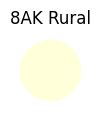

In [145]:
create_pie_charts_per_climate_zone_and_level_of_urbanization()

In [10]:
# def create_sub_pie_charts_per_climate_zone_and_level_of_urbanization(flip_direction=True, version = '_REFERENCE_CASE'): # no_cooling_benefits_25_year_lifetime
#     region_name = "national_ASHP"
#     table_to_plot = create_table_per_climate_zone_and_level_of_urbanization(version=version)
#     table_to_plot = table_to_plot.drop("Total",axis=1)
#     level_0_values = ['1A', '2A', '2B', '3A', '3B', '3C', '4A', '4B', '4C', '5A', '5B', '6A', '6B', '7A', '7B', '7AK', '8AK']
#     level_1_values = ['urban', 'suburban', 'rural']

#     # Pie Chart
#     if flip_direction:
#         fig = plt.figure(figsize=(24,4.5))
#     else:
#         fig = plt.figure(figsize=(4.5,24))
#     for k, (climate_zone,level_of_urbanization) in enumerate(product(level_0_values,level_1_values)):
#         try:
#             row_data = table_to_plot.loc[(climate_zone,level_of_urbanization)]
#             plot_title_only = False
#             if np.all(np.isnan(row_data) | np.isnan(row_data.iloc[0])) or sum(row_data) == 0:
#                 if (k % 3) == 0:
#                     plot_title_only = True
#                 else:
#                     continue
#             if flip_direction:
#                 ax_obj = fig.add_subplot(3,20,((k//3)+20*(k%3))+1)
#             else:
#                 ax_obj = fig.add_subplot(20,3,k+1)
#             if (k % 3) == 0:
                
#                 # if plot_title_only:
#                 #     # 1. Set the title
#                 #     ax_obj.set_title(climate_zone, fontsize=14, pad=15) # Adjust fontsize and pad as needed

#                 #     # 2. Hide all ax_objes ticks, labels, and spines for a completely clean look
#                 #     ax_obj.set_xticks([])
#                 #     ax_obj.set_yticks([])
#                 #     ax_obj.set_xticklabels([])
#                 #     ax_obj.set_yticklabels([])
#                 #     ax_obj.spines['top'].set_visible(False)
#                 #     ax_obj.spines['right'].set_visible(False)
#                 #     ax_obj.spines['bottom'].set_visible(False)
#                 #     ax_obj.spines['left'].set_visible(False)
                
#                 colormap = cm.get_cmap('YlGnBu')
#                 colors_5_values = [mcolors.to_hex(colormap(i)) for i in np.linspace(0, 1, 5)]
#                 pie_plot_obj, texts = ax_obj.pie(row_data, labels=row_data.index, colors=colors_5_values) # , labels=None
#                 for text_value in texts:
#                     text_value.remove()
#                 ax_obj.set_title(climate_zone, loc="center", fontsize=18)
                
#             else:
#                 pie_plot_obj = row_data.plot.pie(subplots=True, colormap="YlGnBu", ylabel='', xlabel='', labels=None, legend=False, ax=ax_obj, textprops={'fontsize': 160000}) # 

#             # if not plot_title_only:
#             #     print("Regular flow to plot title")
#             #     plt.title(climate_zone, loc="center")
#             # pie_plot_obj.patch.set_alpha(0)
#             # ax_obj.patch.set_alpha(0)
#             # ax_obj.title.set_bbox(dict(facecolor='white', edgecolor='none', alpha=0.8))

#             if flip_direction:
#                 # print(climate_zone)
#                 if climate_zone == "1A":
#                     # print('setting y label')
#                     ax_obj.set_ylabel(level_of_urbanization, fontsize=18)

#             # plt.show()
#         except Exception as e:
#             # print(f"{i},{j}")
#             print(e)
#             continue
    
#     # handles, labels = plt.gca().get_legend_handles_labels()
#     # print(handles)
#     # plt.figlegend(loc="lower center", bbox_to_anchor=(0.5,-0.2))    
#     fig.legend(loc="lower center", bbox_to_anchor=(0.45,0), ncol=5, fontsize=12)
#     # if flip_direction:
#     #     fig.axes[0].set_ylabel("Urban")
#     #     fig.axes[20].set_ylabel("Suburban")
#     #     fig.axes[40].set_ylabel("Rural")
#     plt.show()

#     fig.savefig(os.path.join("/ocean", "projects", "eng220005p", "agautam3", "cmu-tare-model", "output_results", f"national_ASHP_8000_all_unit_residence{version}", f"all_pie_charts{'_flipped' if flip_direction else '_not_flipped'}.svg"))
#     # fig.savefig(os.path.join("/mnt", 'c', 'Users', "Arnav", "Documents", "Research", 'Trane_Technologies', "cmu-tare-model", "output_results", f"national_ASHP_8000_all_unit_residence{version}", f"all_pie_charts{'_flipped' if flip_direction else '_not_flipped'}.svg"))


In [10]:
FONT_SIZE_VALUE = 22
# --- Helper function for title-only plots ---
def plot_only_title_on_ax(ax, title_text, fontsize=FONT_SIZE_VALUE, pad=15):
    """
    Plots only a title on the given axes, with no visible plot elements or axes.
    """
    ax.set_title(title_text, fontsize=fontsize, pad=pad)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    # Ensure it's not trying to draw a pie by mistake (e.g. if previous pie was drawn)
    ax.set_facecolor('white') # Explicitly set background if needed

def create_sub_pie_charts_per_climate_zone_and_level_of_urbanization(flip_direction=True, version='_REFERENCE_CASE'):
    
    region_name = "national_ASHP" # Unused variable, consider removing if not used
    table_to_plot = create_table_per_climate_zone_and_level_of_urbanization(version=version)
    table_to_plot = table_to_plot.drop("Total", axis=1, errors='ignore') # Use errors='ignore' if 'Total' might not exist
    table_to_plot.columns = table_to_plot.columns.map(lambda x: x if ":" not in x else x[x.index(":")+1:])
    
    level_0_values = ['1A', '2A', '2B', '3A', '3B', '3C', '4A', '4B', '4C', '5A', '5B', '6A', '6B', '7A', '7B', '7AK', '8AK']
    level_1_values = ['urban', 'suburban', 'rural']

    n_climate_zones = len(level_0_values)
    n_urbanization_levels = len(level_1_values)

    # Determine subplot grid dimensions
    if flip_direction:
        nrows = n_urbanization_levels # 3 (urban, suburban, rural)
        ncols = n_climate_zones      # 17 (climate zones)
        fig = plt.figure(figsize=(22, 4.5)) # Adjust figsize if needed
    else:
        nrows = n_climate_zones      # 17
        ncols = n_urbanization_levels # 3
        fig = plt.figure(figsize=(4.5, 22)) # Adjust figsize if needed

    # Set up a global colormap once
    colormap = cm.get_cmap('YlGnBu')
    colors_5_values = [mcolors.to_hex(colormap(i)) for i in np.linspace(0, 1, 5)]

    # Use a flag to track if we've plotted at least one pie for the legend
    has_pie_data_for_legend = False

    for k, (climate_zone, level_of_urbanization) in enumerate(product(level_0_values, level_1_values)):
        row_data_present = False
        try:
            row_data = table_to_plot.loc[(climate_zone, level_of_urbanization)]
            # Check if all values are NaN or if the sum is zero
            if not (np.all(np.isnan(row_data)) or row_data.sum() == 0):
                row_data_present = True
            
        except KeyError:
            print(f"Warning: Data for ({climate_zone}, {level_of_urbanization}) not found.")
            row_data_present = False
        except Exception as e:
            print(f"Error processing data for ({climate_zone}, {level_of_urbanization}): {e}")
            row_data_present = False
        
        # Calculate subplot index correctly based on flip_direction
        if flip_direction:
            # Rows are urbanization levels, columns are climate zones
            # k maps (CZ, UL) to a linear index. We need to convert this.
            # col_idx = index of climate_zone within level_0_values
            # row_idx = index of level_of_urbanization within level_1_values
            col_idx = level_0_values.index(climate_zone)
            row_idx = level_1_values.index(level_of_urbanization)
            subplot_idx = row_idx * ncols + col_idx + 1 # +1 for 1-based indexing
        else:
            # Rows are climate zones, columns are urbanization levels
            col_idx = level_1_values.index(level_of_urbanization)
            row_idx = level_0_values.index(climate_zone)
            subplot_idx = row_idx * ncols + col_idx + 1 # +1 for 1-based indexing

        ax_obj = fig.add_subplot(nrows, ncols, subplot_idx)

        # --- Plotting logic ---
        if row_data_present:
            # Pie plot with actual data
            pie_plot_obj, texts = ax_obj.pie(row_data, labels=None, colors=colors_5_values, textprops={"fontsize": FONT_SIZE_VALUE})
            # Remove default labels if you're managing them with titles/y-labels
            for text_value in texts:
                text_value.remove()
            ax_obj.axis('equal') # Ensure circles are round
            has_pie_data_for_legend = True # Mark that we have real pie data
        else:
            # Plot only the title for "no information"
            plot_only_title_on_ax(ax_obj, "", fontsize=FONT_SIZE_VALUE) # Or some other message like "N/A"

        # --- Setting Titles for the Top Row ---
        if flip_direction:
            # Top row is where level_of_urbanization is 'urban' (row_idx = 0)
            if row_idx == 0:
                ax_obj.set_title(climate_zone, loc="center", fontsize=FONT_SIZE_VALUE)
            # Set y-labels for the first column (where climate_zone is 1A, 2A, etc.)
            if col_idx == 0:
                ax_obj.set_ylabel(level_of_urbanization.capitalize(), fontsize=FONT_SIZE_VALUE, rotation=0, ha='right', va='center', labelpad=20) # Added rotation, alignment, and padding
        else: # not flip_direction
            # Top row (first 3 plots) should get urbanization labels as titles
            if row_idx == 0: # This means it's the first climate zone (e.g., 1A)
                ax_obj.set_title(level_of_urbanization.capitalize(), loc="center", fontsize=FONT_SIZE_VALUE)
            # First column should get climate zone as ylabel
            if col_idx == 0: # This means it's the 'urban' column
                 ax_obj.set_ylabel(climate_zone, fontsize=FONT_SIZE_VALUE+8000, rotation=0, ha='right', va='center', labelpad=20)


    # --- Global Legend ---
    # Only try to create a legend if there was at least one pie chart with data
    if has_pie_data_for_legend:
        # Create dummy handles for the legend
        # Assuming row_data.index contains your legend labels (e.g., 'Heating', 'Cooling')
        # This will take labels from the *last* successfully plotted pie, which might not be ideal
        # It's better to define these universally.
        legend_labels = table_to_plot.columns.tolist() # Get actual column names for legend
        legend_handles = [plt.Line2D([0], [0], marker='o', color=colors_5_values[i], linestyle='', markersize=10) for i in range(len(legend_labels))]
        
        fig.legend(legend_handles, legend_labels, loc="lower center", bbox_to_anchor=(0.5, 0), ncol=len(legend_labels), fontsize=FONT_SIZE_VALUE)
    else:
        print("No actual pie charts were plotted, so skipping legend generation.")

    plt.tight_layout(rect=[0, 0.11, 1, 1]) # Adjust layout to make space for legend at bottom
    
    # Ensure the output directory exists
    output_dir = os.path.join("/mnt", 'c', 'Users', "Arnav", "Documents", "Research", 'Trane_Technologies', "cmu-tare-model", "output_results", f"national_ASHP_8000_all_unit_residence{version}")
    # output_dir = os.path.join("/ocean", 'projects', 'eng220005p', "agautam3", "cmu-tare-model", "output_results", f"national_ASHP_8000_all_unit_residence{version}")
    os.makedirs(output_dir, exist_ok=True)
    
    fig.savefig(os.path.join(output_dir, f"all_pie_charts{'_flipped' if flip_direction else '_not_flipped'}.svg"))
    plt.show()

/tmp/ipykernel_863/1228938141.py:43: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('YlGnBu')


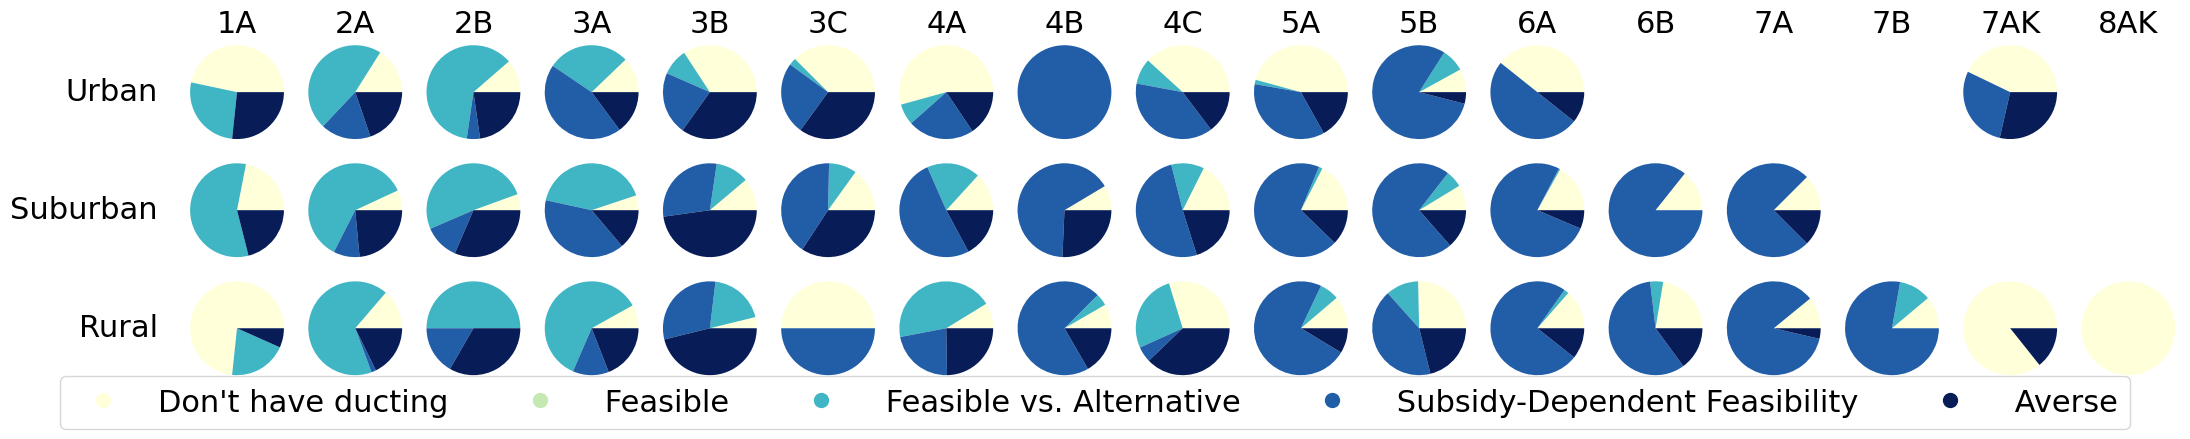

In [106]:
create_sub_pie_charts_per_climate_zone_and_level_of_urbanization()

/tmp/ipykernel_21501/1797727552.py:32: DtypeWarning: Columns (76,77,78,132) have mixed types. Specify dtype option on import or set low_memory=False.
  buildstock_df = pd.read_csv(buildstock_path)


1A
2A
2B
3A
3B
3C
4A
4B
4C
5A
5B
6A
6B
7A
7AK
7B
8AK
In metro area, not/partially in principal city
In metro area, principal city
Not/partially in metro area


/tmp/ipykernel_21501/4191010525.py:42: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('YlGnBu')


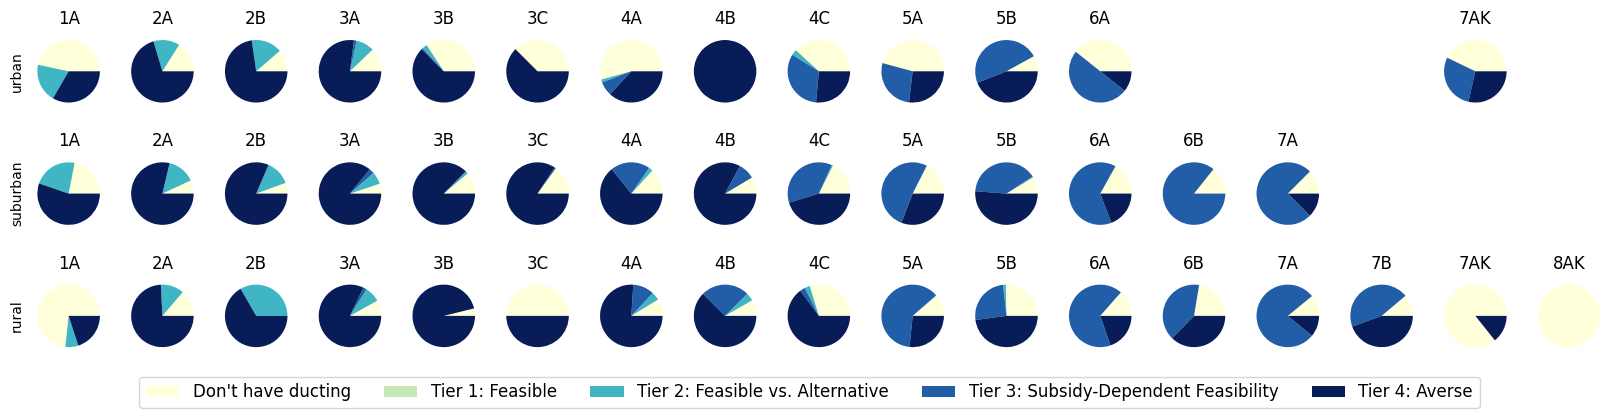

In [16]:
create_sub_pie_charts_per_climate_zone_and_level_of_urbanization(flip_direction=True, version="_Tier_2_forced_heater_upgrade")

/tmp/ipykernel_21501/4191010525.py:42: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('YlGnBu')


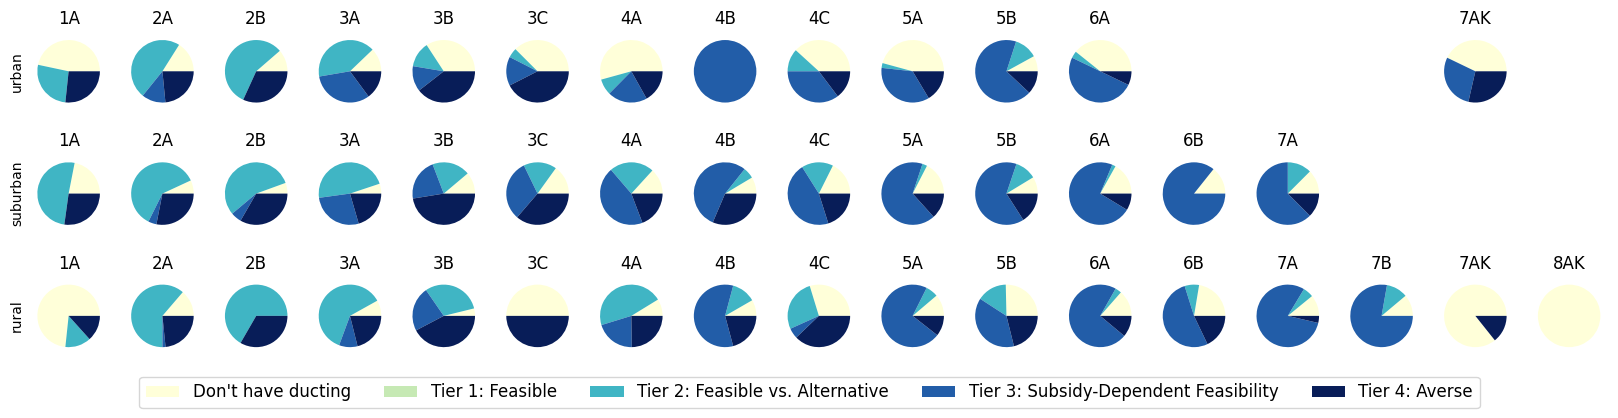

In [17]:
create_sub_pie_charts_per_climate_zone_and_level_of_urbanization(flip_direction=True, version="_DEBUGGED")

/tmp/ipykernel_863/4191010525.py:42: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('YlGnBu')


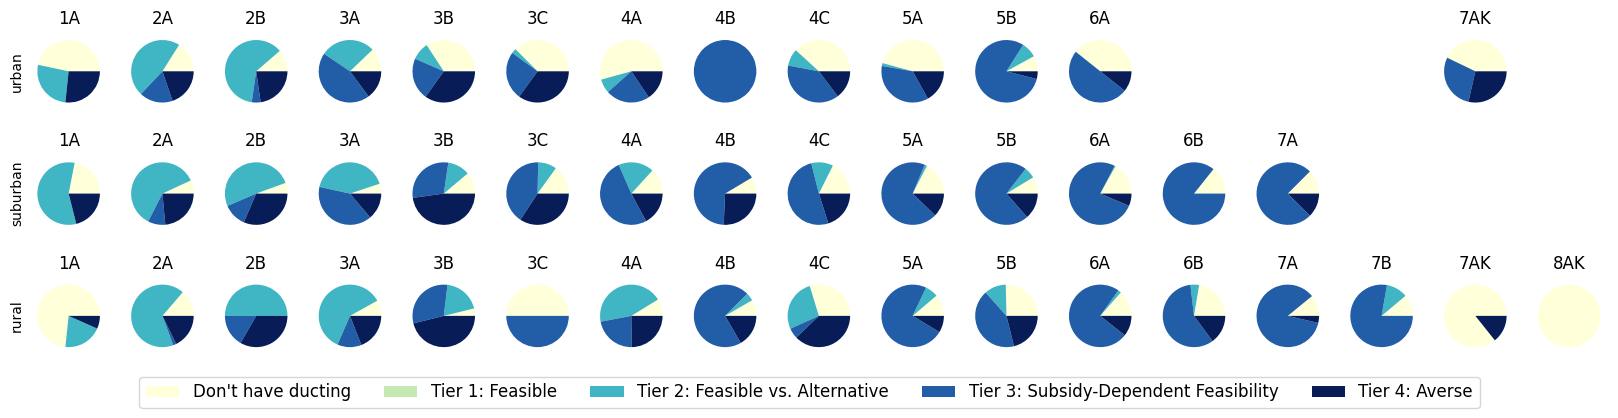

In [13]:
create_sub_pie_charts_per_climate_zone_and_level_of_urbanization(flip_direction=True, version="_REFERENCE_CASE")

/tmp/ipykernel_3077125/1322211477.py:43: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('YlGnBu')


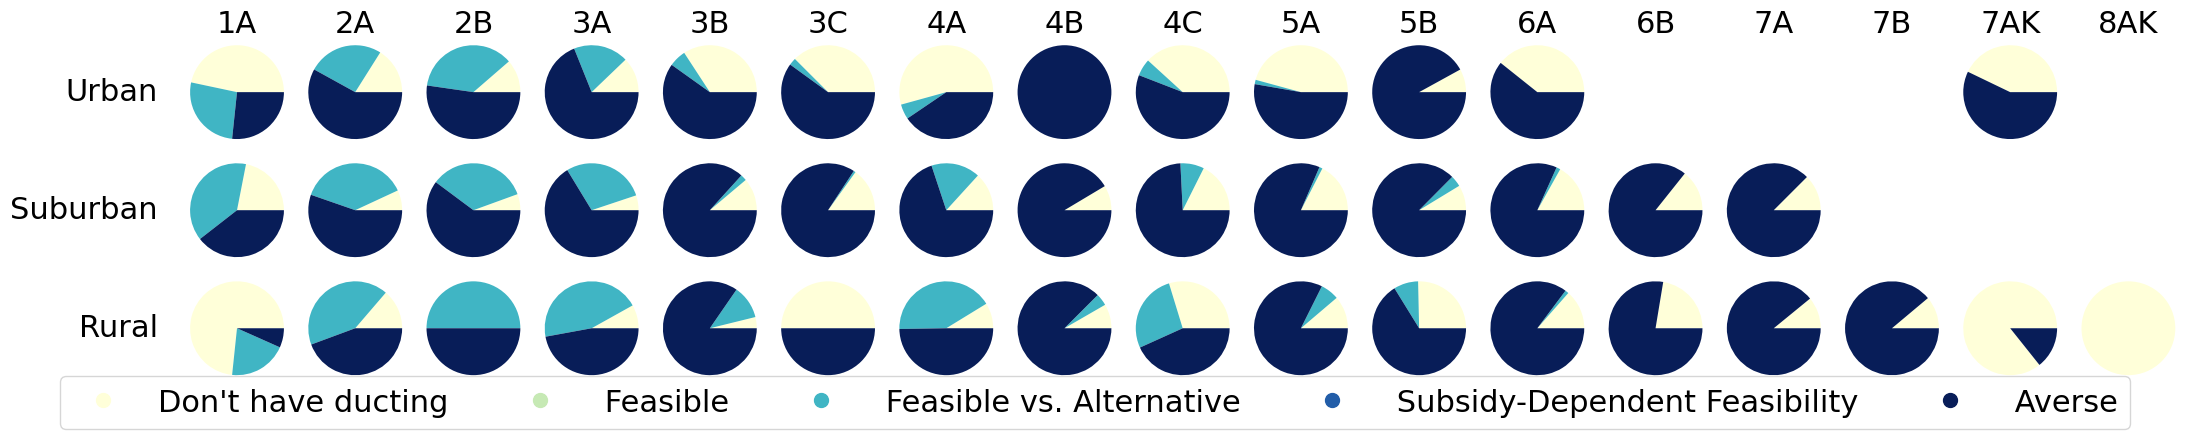

In [16]:
create_sub_pie_charts_per_climate_zone_and_level_of_urbanization(flip_direction=True, version="_TRANE_REPLACEMENT_COSTS")

/tmp/ipykernel_839/3136683757.py:43: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('YlGnBu')


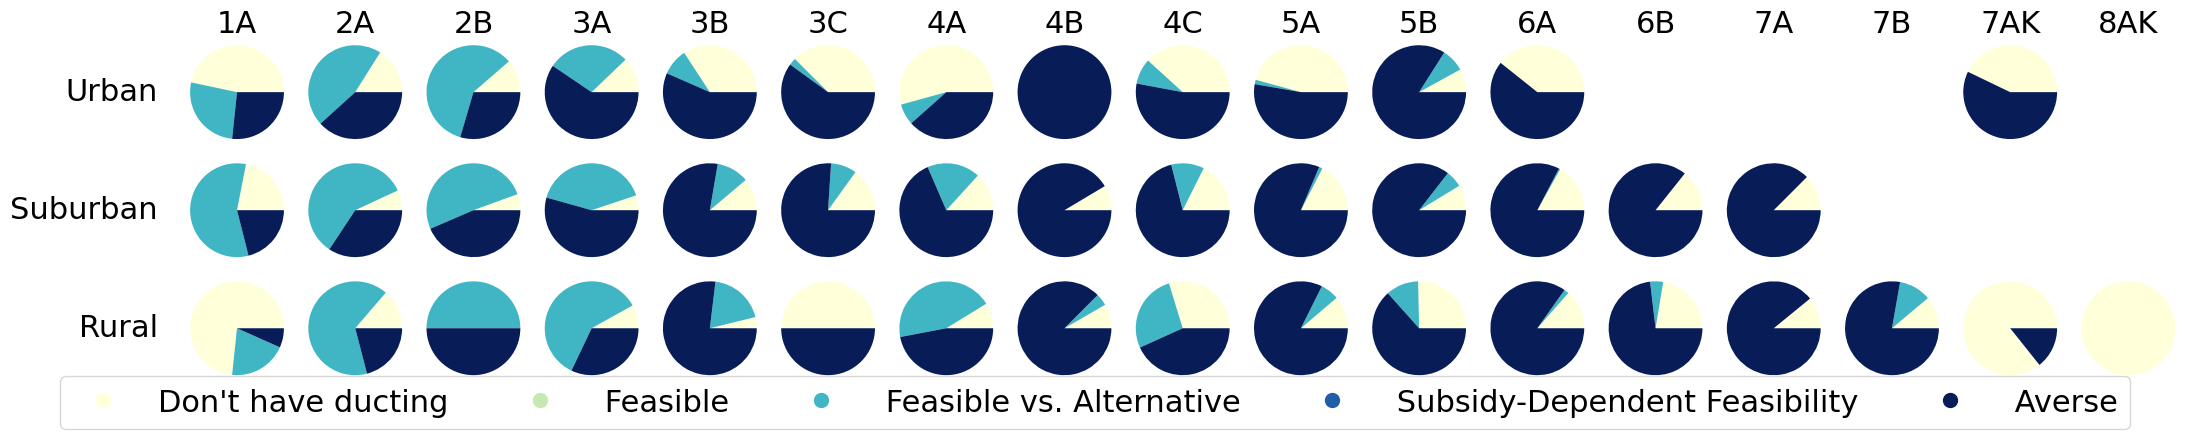

In [11]:
create_sub_pie_charts_per_climate_zone_and_level_of_urbanization(flip_direction=True, version="_NO_IRA")

                                       7AK_suburban
Don't have ducting                                5
Tier 1: Feasible                                  0
Tier 2: Feasible vs. Alternative                  0
Tier 3: Subsidy-Dependent Feasibility             0
Tier 4: Averse                                    3


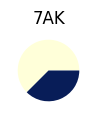

In [5]:
create_pie_chart_no_clusters(["7AK_suburban"], 8, "NPV", prefix="alpha_beta", save_fig = False)

                                       7B_urban
Don't have ducting                            1
Tier 1: Feasible                              0
Tier 2: Feasible vs. Alternative              0
Tier 3: Subsidy-Dependent Feasibility         5
Tier 4: Averse                                2


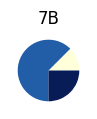

In [6]:
create_pie_chart_no_clusters(["7B_urban"], 8, "NPV", prefix="alpha_beta", save_fig = False)

# CREATING GEOJSON

In [3]:
gdf = gpd.GeoDataFrame.from_file("/mnt/wsl/instances/Ubuntu/home/arnavgautam/iecc_climate_zones.json")

/home/arnavgautam/venv_python_3_12/lib/python3.12/site-packages/pyogrio/raw.py:198: RuntimeWarning: organizePolygons() received a polygon with more than 100 parts. The processing may be really slow.  You can skip the processing by setting METHOD=SKIP, or only make it analyze counter-clock wise parts by setting METHOD=ONLY_CCW if you can assume that the outline of holes is counter-clock wise defined
  return ogr_read(


In [5]:
polygon = Polygon([(-170,15),(-170,72),(-50, 72),(-50,15)])
# apply1(alaska_gdf,0,36)
# gdf

clipped_gdf = gdf.clip(polygon)

clipped_gdf.loc[7,"Climate_Zones"] = "3B"
clipped_gdf = clipped_gdf.sort_values(by="Climate_Zones")

In [7]:
# gdf.head()
simplified_gdf = clipped_gdf.copy()
simplified_gdf["geometry"] = clipped_gdf["geometry"].simplify(tolerance=0.001, preserve_topology=True)


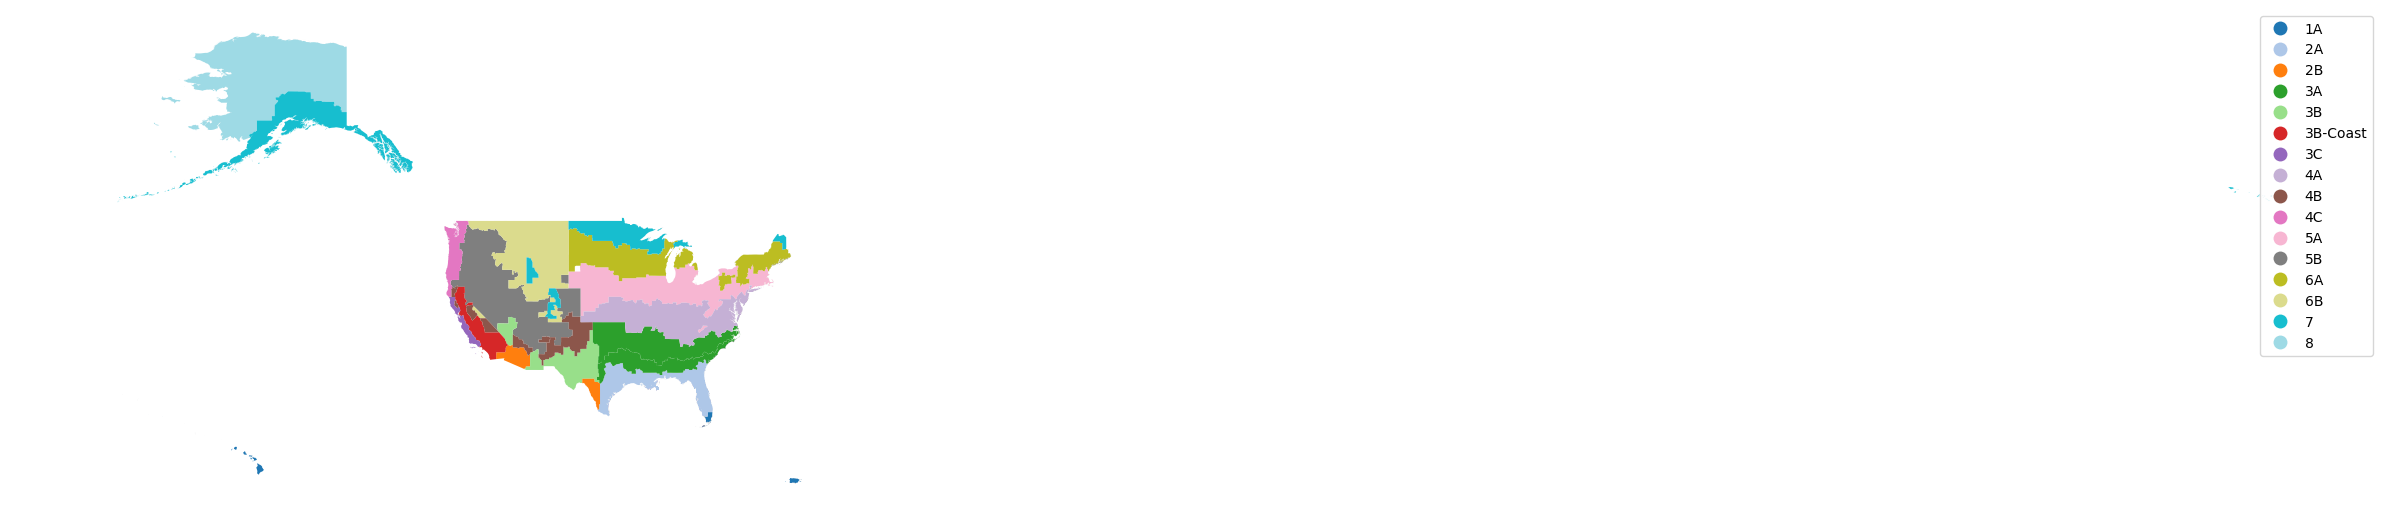

In [4]:
fig, ax = plt.subplots(figsize=(24, 24))
gdf.plot(ax=ax, column="Climate_Zones", legend=True, cmap="tab20")
plt.axis("off")
plt.tight_layout()
# ax.get_legend().remove()

# for idx, row in gdf.iterrows():
#     if row.geometry.is_empty:
#         continue  # skip empty geometries
    
#     geom = row['geometry']
#     # Check if the geometry is a MultiPolygon
#     if isinstance(geom, MultiPolygon):
#         # Iterate through each individual polygon within the MultiPolygon
#         for i, single_poly in enumerate(geom.geoms):
#             # Get the centroid of the individual polygon
#             centroid = single_poly.centroid
#             # Place the label at the centroid
#             # Adjust ha (horizontal alignment) and va (vertical alignment) as needed
#             ax.text(
#                 centroid.x,
#                 centroid.y,
#                 row["Climate_Zones"], # Add "Part X" for multipolygons
#                 fontsize=9,
#                 ha='center',
#                 va='center',
#                 color='black', # Or 'white' depending on your colormap
#                 fontweight='bold'
#             )
#     # centroid = row.geometry.centroid # row.geometry.representative_point()# 
#     # plt.text(centroid.x, centroid.y, str(row["Climate_Zones"]),
#     #          ha='center', va='center', fontsize=8, color='black')

# # fig.savefig("labeled_climate_zones.svg")

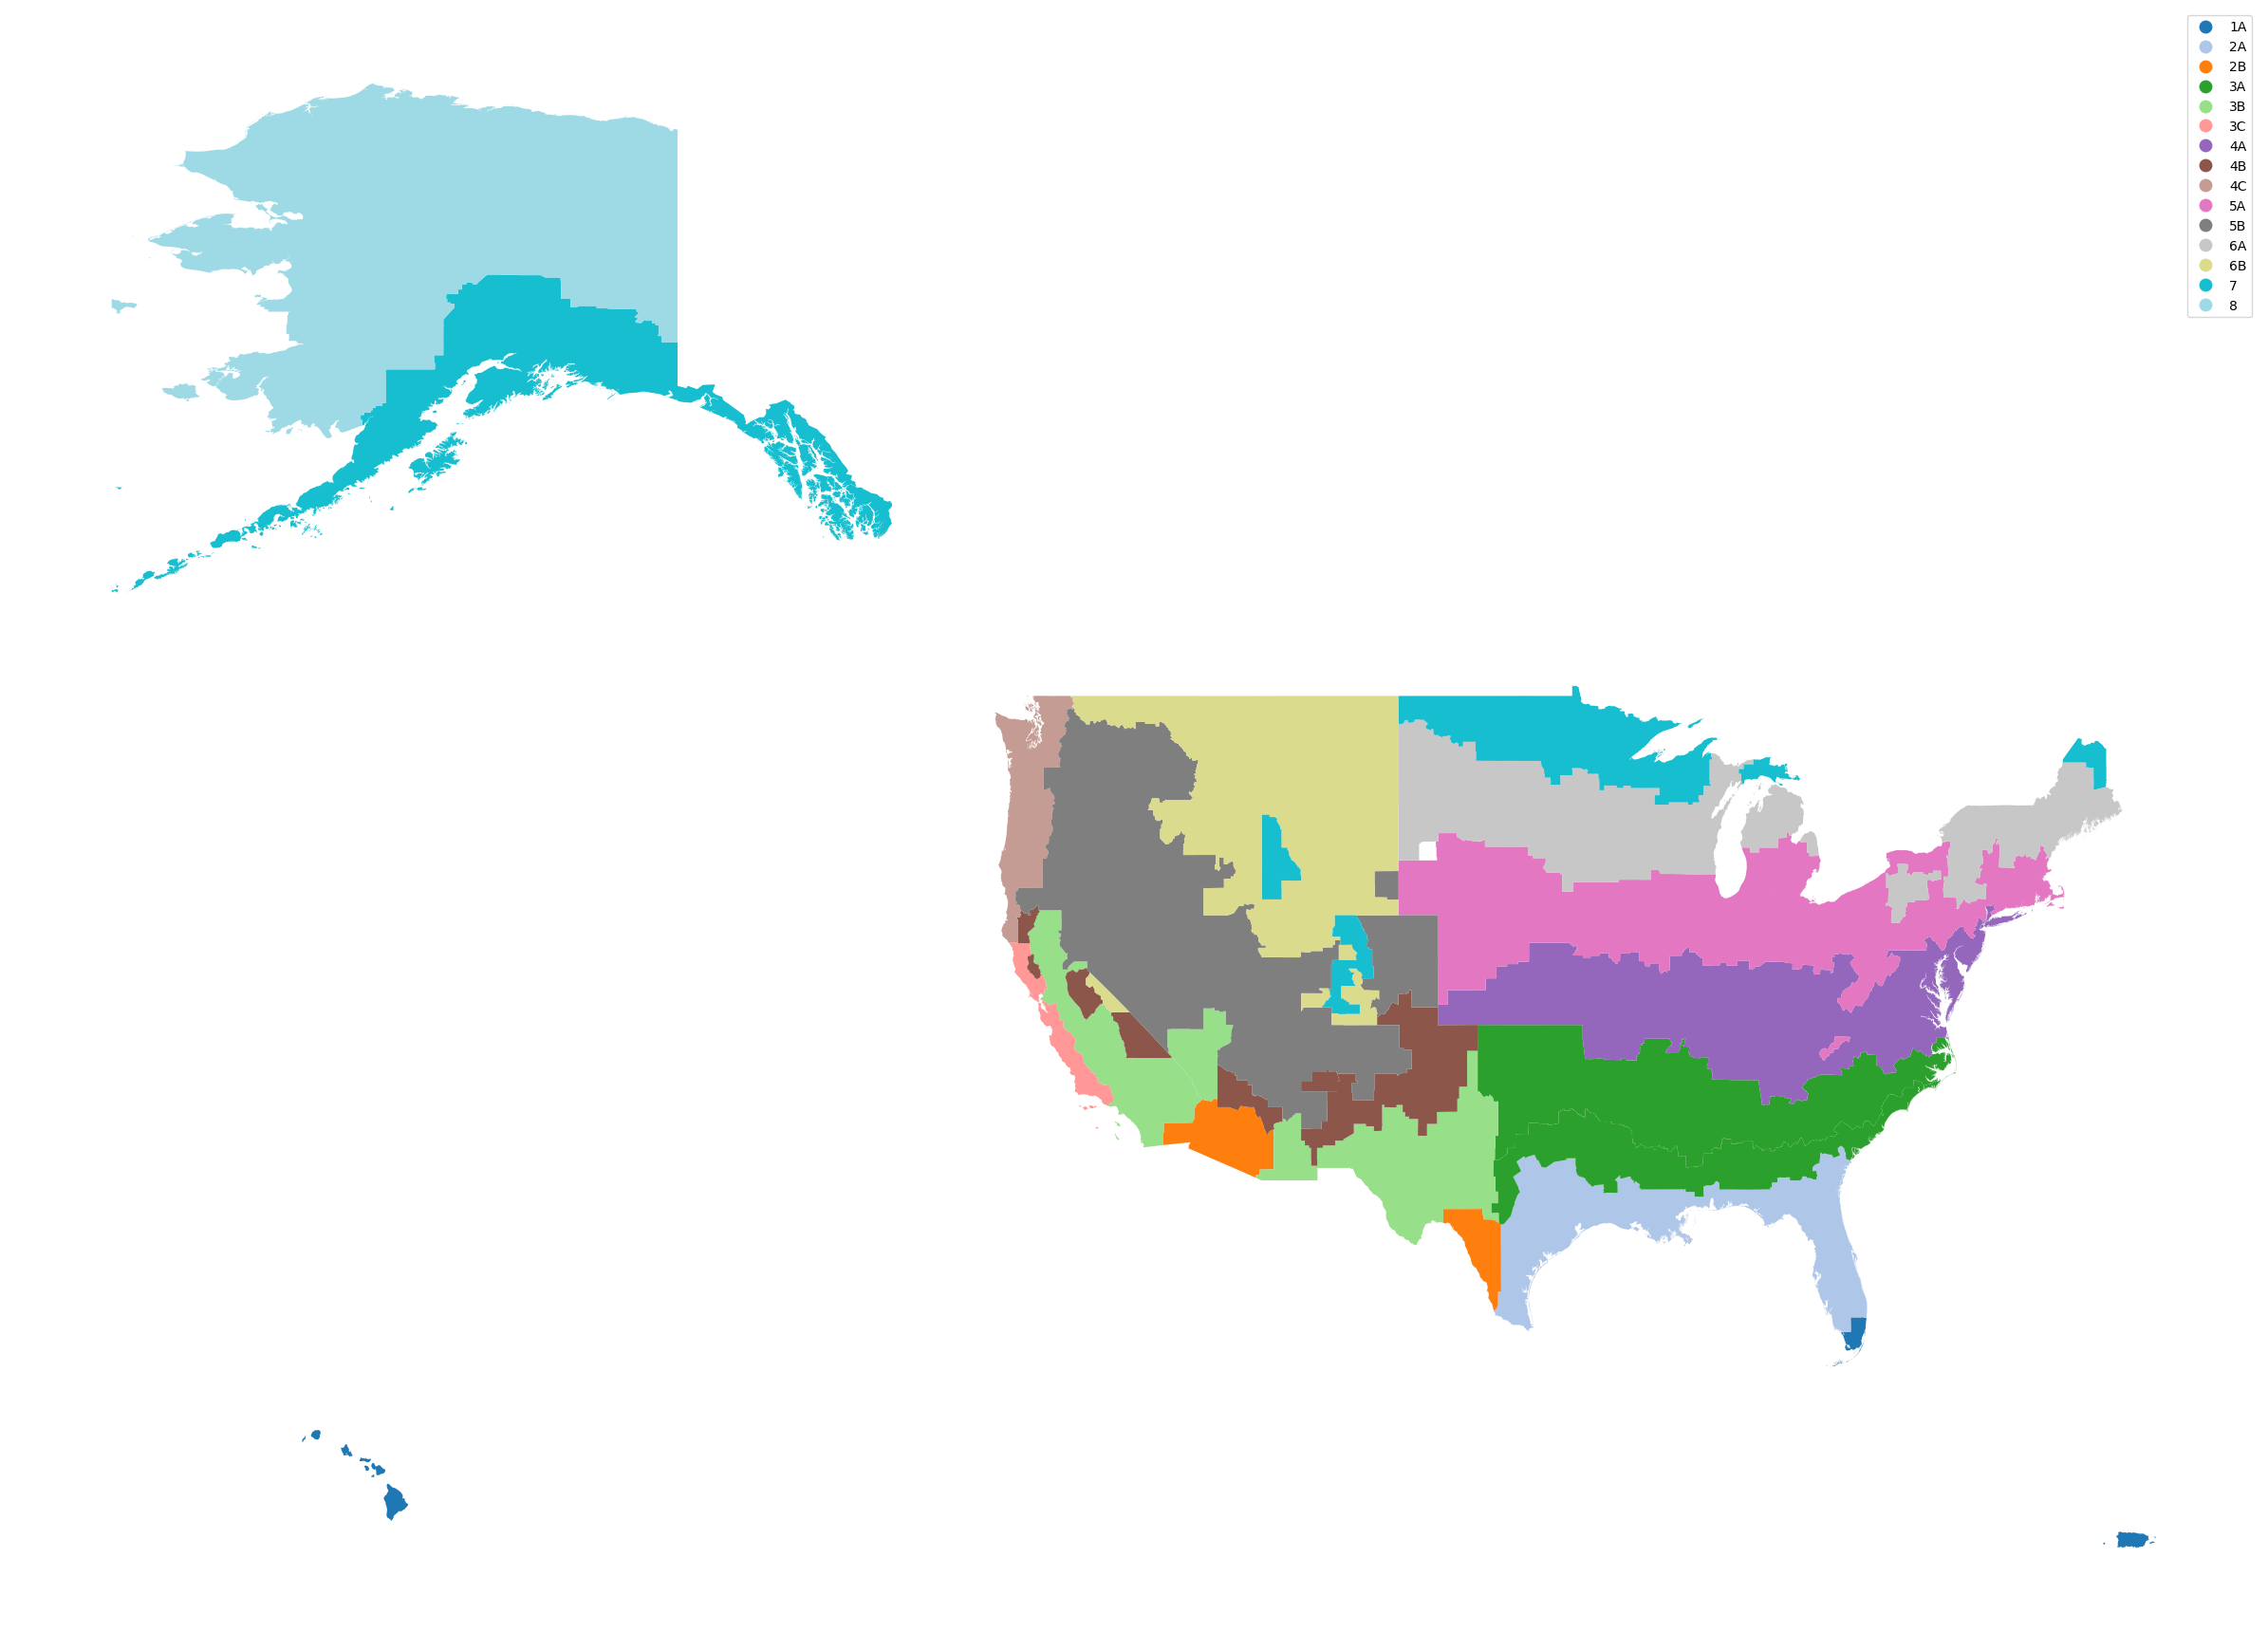

In [6]:
fig, ax = plt.subplots(figsize=(24, 24))
clipped_gdf.plot(ax=ax, column="Climate_Zones", legend=True, cmap="tab20")
plt.axis("off")
plt.tight_layout()

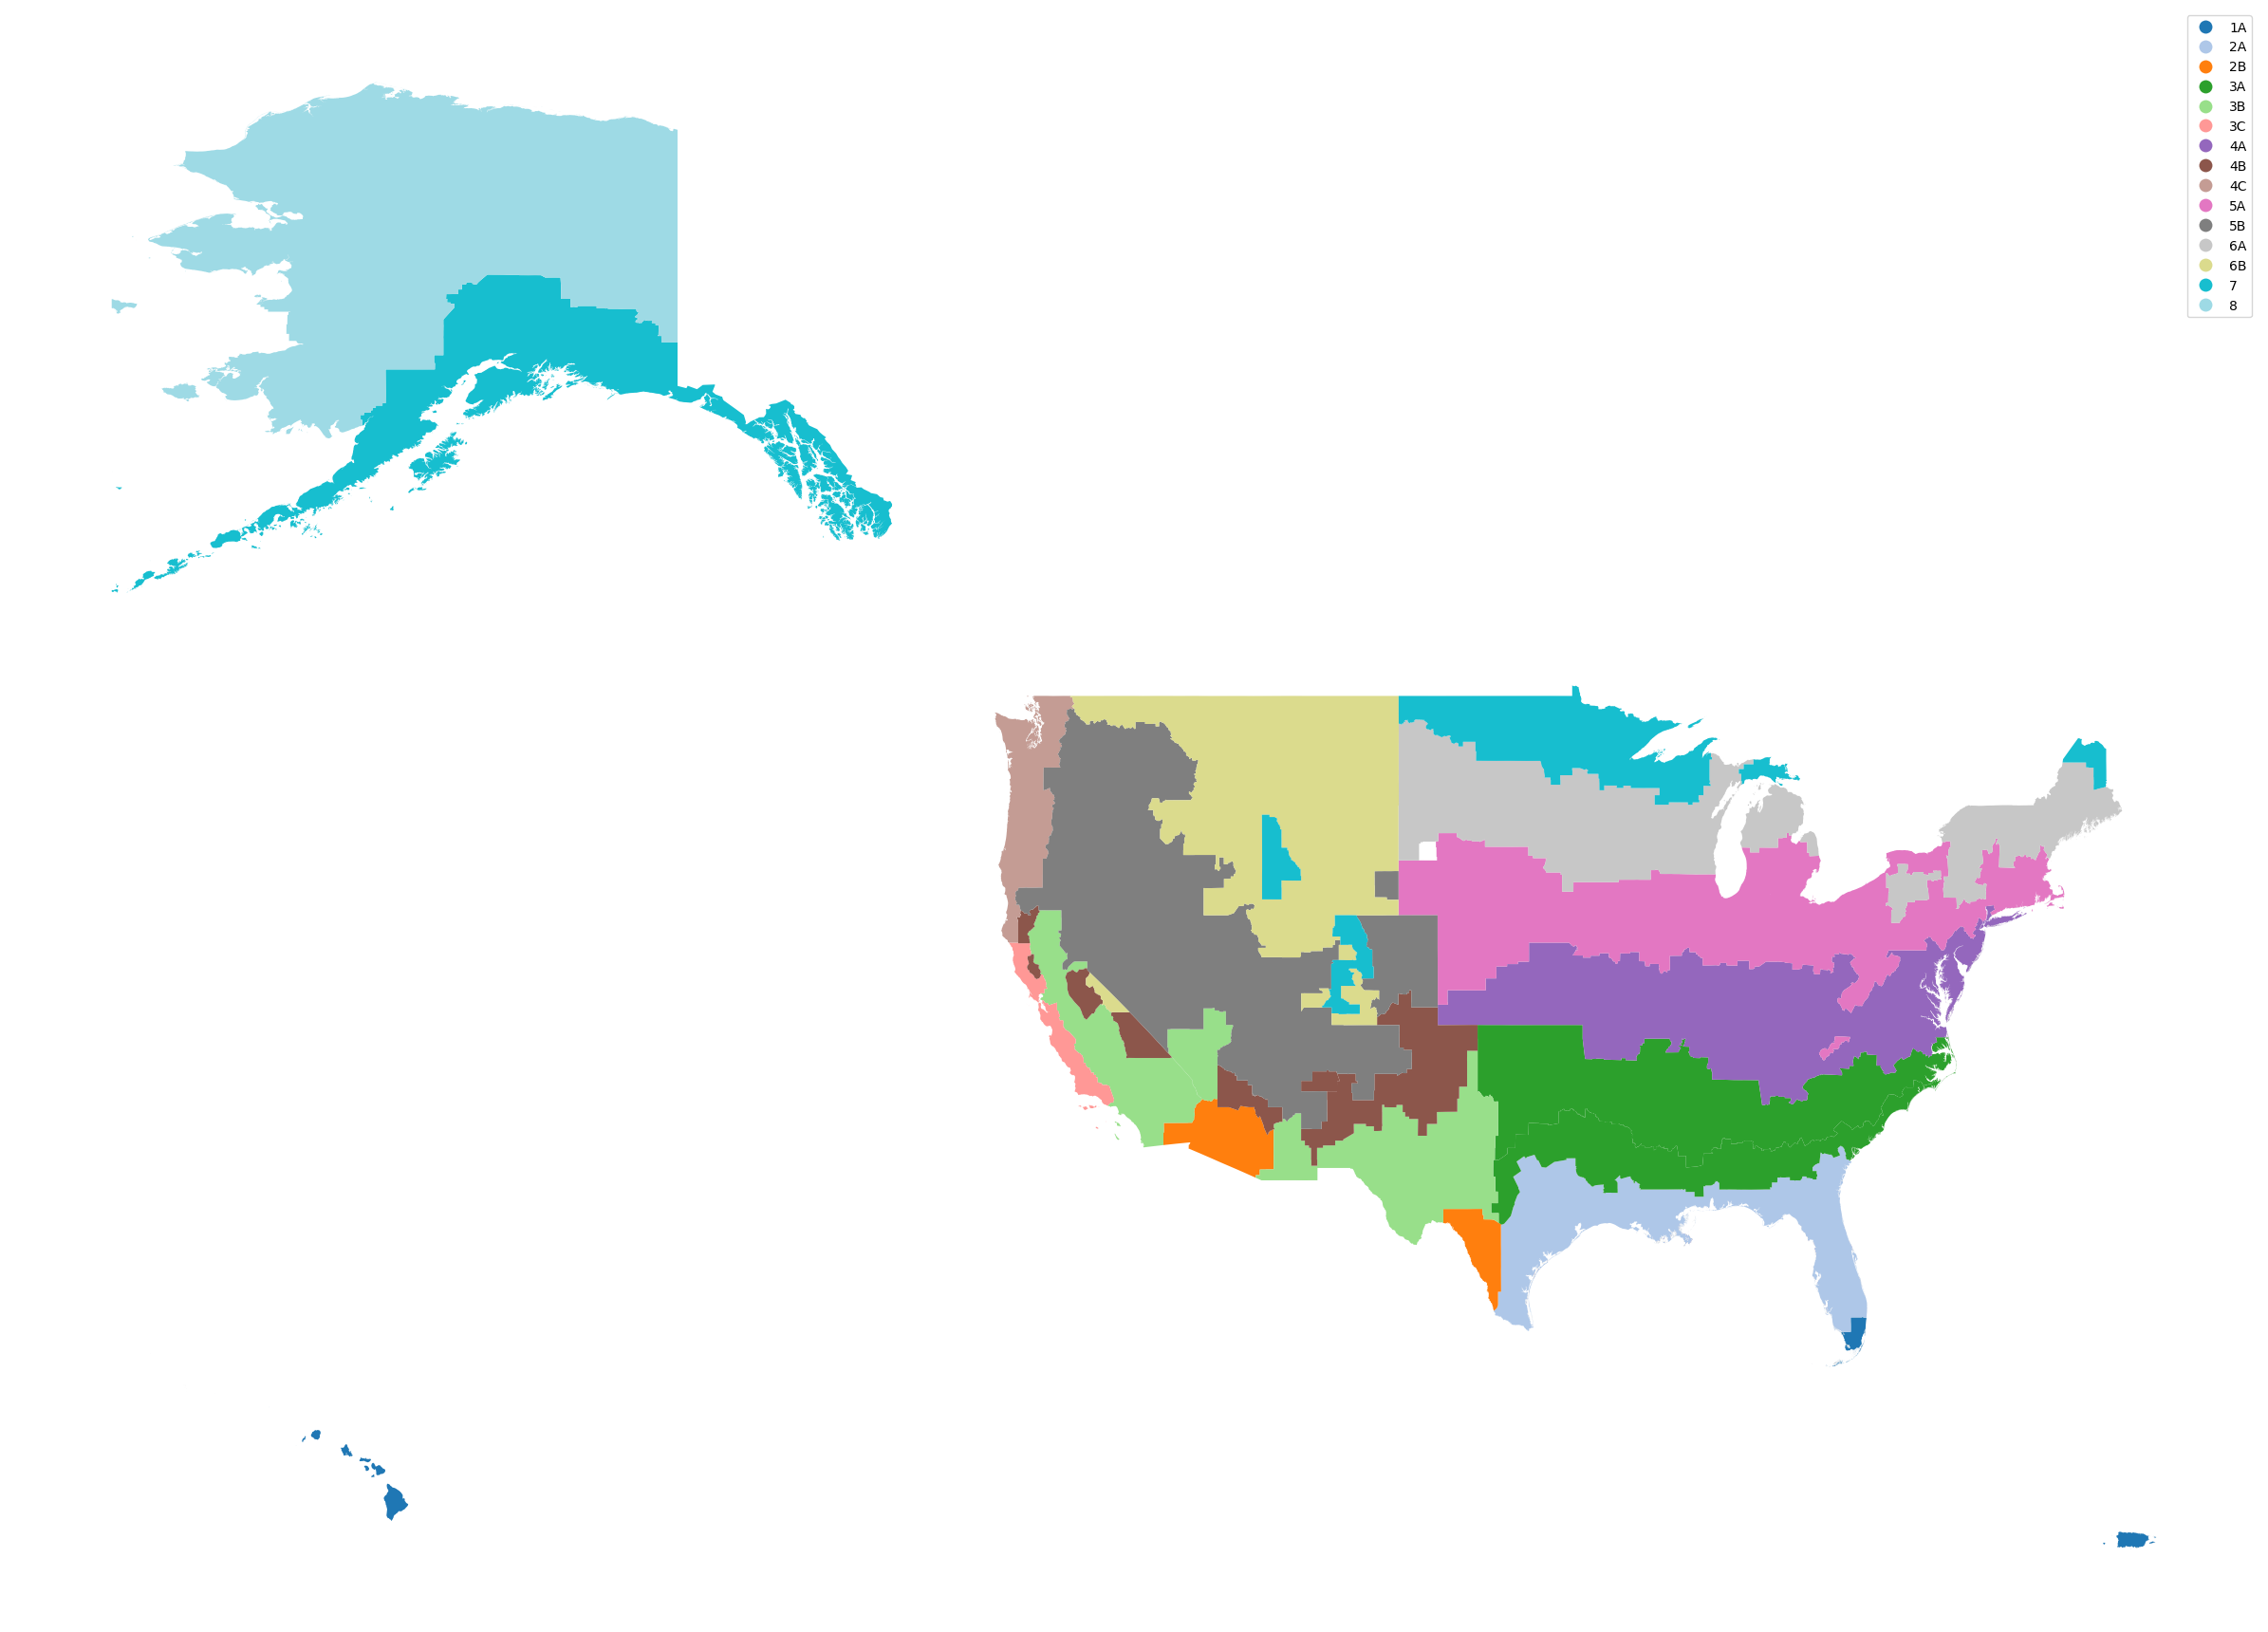

In [9]:
fig, ax = plt.subplots(figsize=(24, 24))
simplified_gdf.plot(ax=ax, column="Climate_Zones", legend=True, cmap="tab20")
plt.axis("off")
plt.tight_layout()

simplified_gdf.to_file(f"simplified_0pt001.geojson", driver="GeoJSON")

In [16]:
# Load GeoJSON manually to handle complex geometries
with open("simplified_0pt001.geojson", "r") as f:
    raw_geojson = json.load(f)

# Extract all features with geometry and properties
records = []
for feature in raw_geojson["features"]:
    geom = shape(feature["geometry"])
    props = feature["properties"]
    props["geometry"] = geom
    records.append(props)

# Identify and extract the Climate_Zones == "7" feature
zone7_record = next(r for r in records if r["Climate_Zones"] == "7")
zone7_multipolygon = zone7_record["geometry"]

# Break the MultiPolygon into individual geometries
sub_geoms = list(zone7_multipolygon.geoms)

# Classify polygons by centroid location
alaska_geoms = []
zone7b_geoms = []
remaining_geoms = []

for geom in sub_geoms:
    centroid = geom.centroid
    lon, lat = centroid.x, centroid.y

    if lat > 52 and lon < -125:
        alaska_geoms.append(geom)
    elif 37 < lat < 45 and -111 < lon < -104:
        zone7b_geoms.append(geom)
    else:
        remaining_geoms.append(geom)

# Create new records based on geometry groupings
def make_new_record(original, geometry, new_zone):
    new_props = original.copy()
    new_props["Climate_Zones"] = new_zone
    new_props["geometry"] = geometry
    return new_props

new_records = []

if remaining_geoms:
    new_records.append(make_new_record(zone7_record, MultiPolygon(remaining_geoms), "7A"))
if alaska_geoms:
    new_records.append(make_new_record(zone7_record, MultiPolygon(alaska_geoms), "7AK"))
if zone7b_geoms:
    new_records.append(make_new_record(zone7_record, MultiPolygon(zone7b_geoms), "7B"))

# Remove original "7" record and insert the new ones
records = [r for r in records if r["Climate_Zones"] != "7"]
records.extend(new_records)

# Create GeoDataFrame
new_df = pd.DataFrame(records)
simplified_split_gdf = gpd.GeoDataFrame(new_df, geometry="geometry", crs="EPSG:4326")

# Save updated GeoJSON
simplified_split_gdf.to_file("simplified_split_climate_zones.geojson", driver="GeoJSON")

In [17]:
gdf = simplified_split_gdf

In [48]:
gdf = simplified_split_gdf.copy() # gpd.read_file("updated_climate_zones.geojson")

# Step 1: Union all zone geometries into one
full_union = unary_union(gdf.geometry)

# Step 2: Create a bounding box for the full US (or bounding convex hull)
bounding_geom = gdf.unary_union.convex_hull

# Step 3: Subtract unioned geometries from the bounding box
gap_geom = bounding_geom.difference(full_union)

# If the result is a MultiPolygon, break it apart
holes = []
if gap_geom.type == "Polygon":
    holes = [gap_geom]
elif gap_geom.type == "MultiPolygon":
    holes = list(gap_geom.geoms)



/tmp/ipykernel_752/577431884.py:7: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  bounding_geom = gdf.unary_union.convex_hull
/tmp/ipykernel_752/577431884.py:14: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if gap_geom.type == "Polygon":
/tmp/ipykernel_752/577431884.py:16: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  elif gap_geom.type == "MultiPolygon":
/tmp/ipykernel_752/577431884.py:35: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom_6a.type == "Polygon":


ValueError: Sequences of multi-polygons are not valid arguments

In [57]:
# Step 4: Find the hole in South Dakota (approx: lat 43–46, lon -104 to -97)
SD_holes = []
for poly in holes:
    c = poly.centroid
    if 43 <= c.y <= 46 and -104 <= c.x <= -97:
        SD_holes.append(poly)



In [58]:
# Step 5: Merge it into Climate_Zones == "6A"
if SD_holes:
    hole_geom = unary_union(SD_holes)

    # Locate existing 6A
    idx_6a = gdf[gdf["Climate_Zones"] == "6A"].index[0]
    geom_6a = gdf.at[idx_6a, "geometry"]

    # Merge hole into 6A geometry
    if geom_6a.type == "Polygon":
        new_geom = unary_union([geom_6a, hole_geom]) # MultiPolygon
    else:
        new_geom = unary_union(list(geom_6a.geoms) + [hole_geom]) # MultiPolygon

    gdf.at[idx_6a, "geometry"] = new_geom

    # Save the updated GeoJSON
    gdf.to_file("simplified_split_filled_climate_zones.geojson", driver="GeoJSON")
    print("✅ Filled South Dakota hole and saved as 'filled_climate_zones.geojson'.")

else:
    print("⚠️ No unassigned holes found in the South Dakota region.")


/tmp/ipykernel_752/79231440.py:10: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom_6a.type == "Polygon":


✅ Filled South Dakota hole and saved as 'filled_climate_zones.geojson'.


# LOADING GEOJSON

In [2]:
gdf = gpd.GeoDataFrame.from_file("simplified_split_filled_climate_zones.geojson")

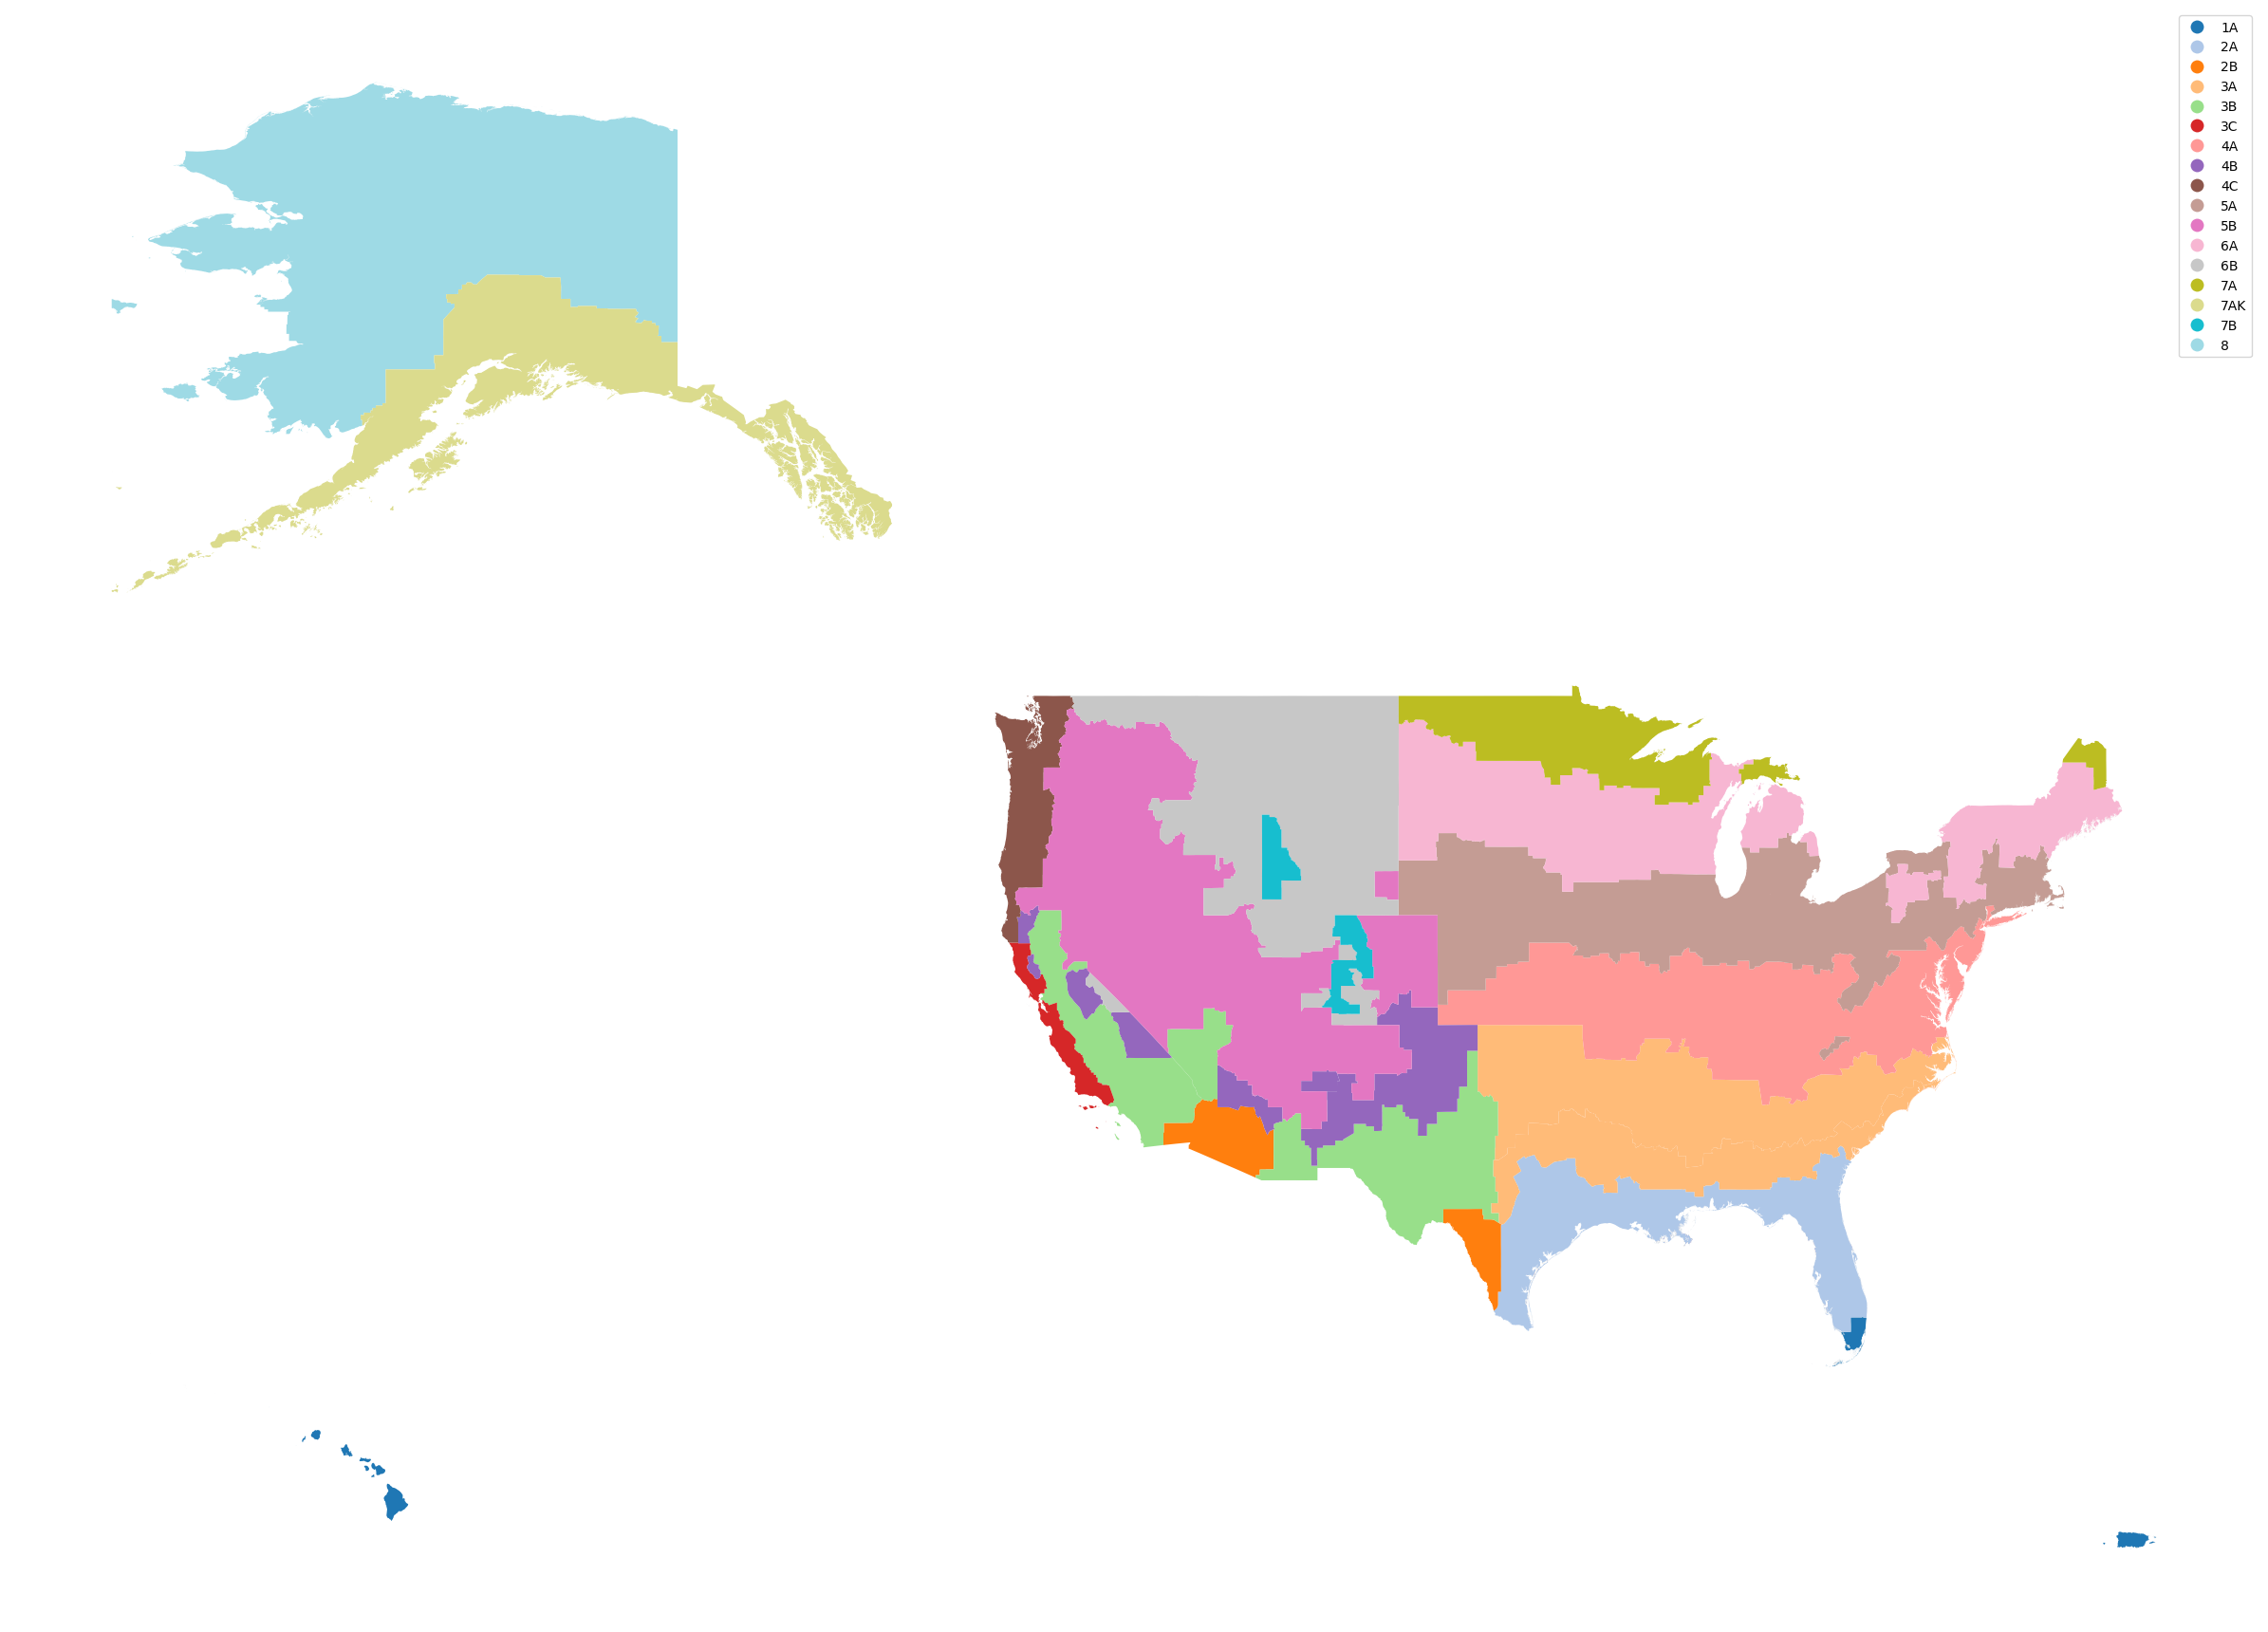

In [3]:
fig, ax = plt.subplots(figsize=(24, 24))
gdf.plot(ax=ax, column="Climate_Zones", legend=True, cmap="tab20")
plt.axis("off")
plt.tight_layout()

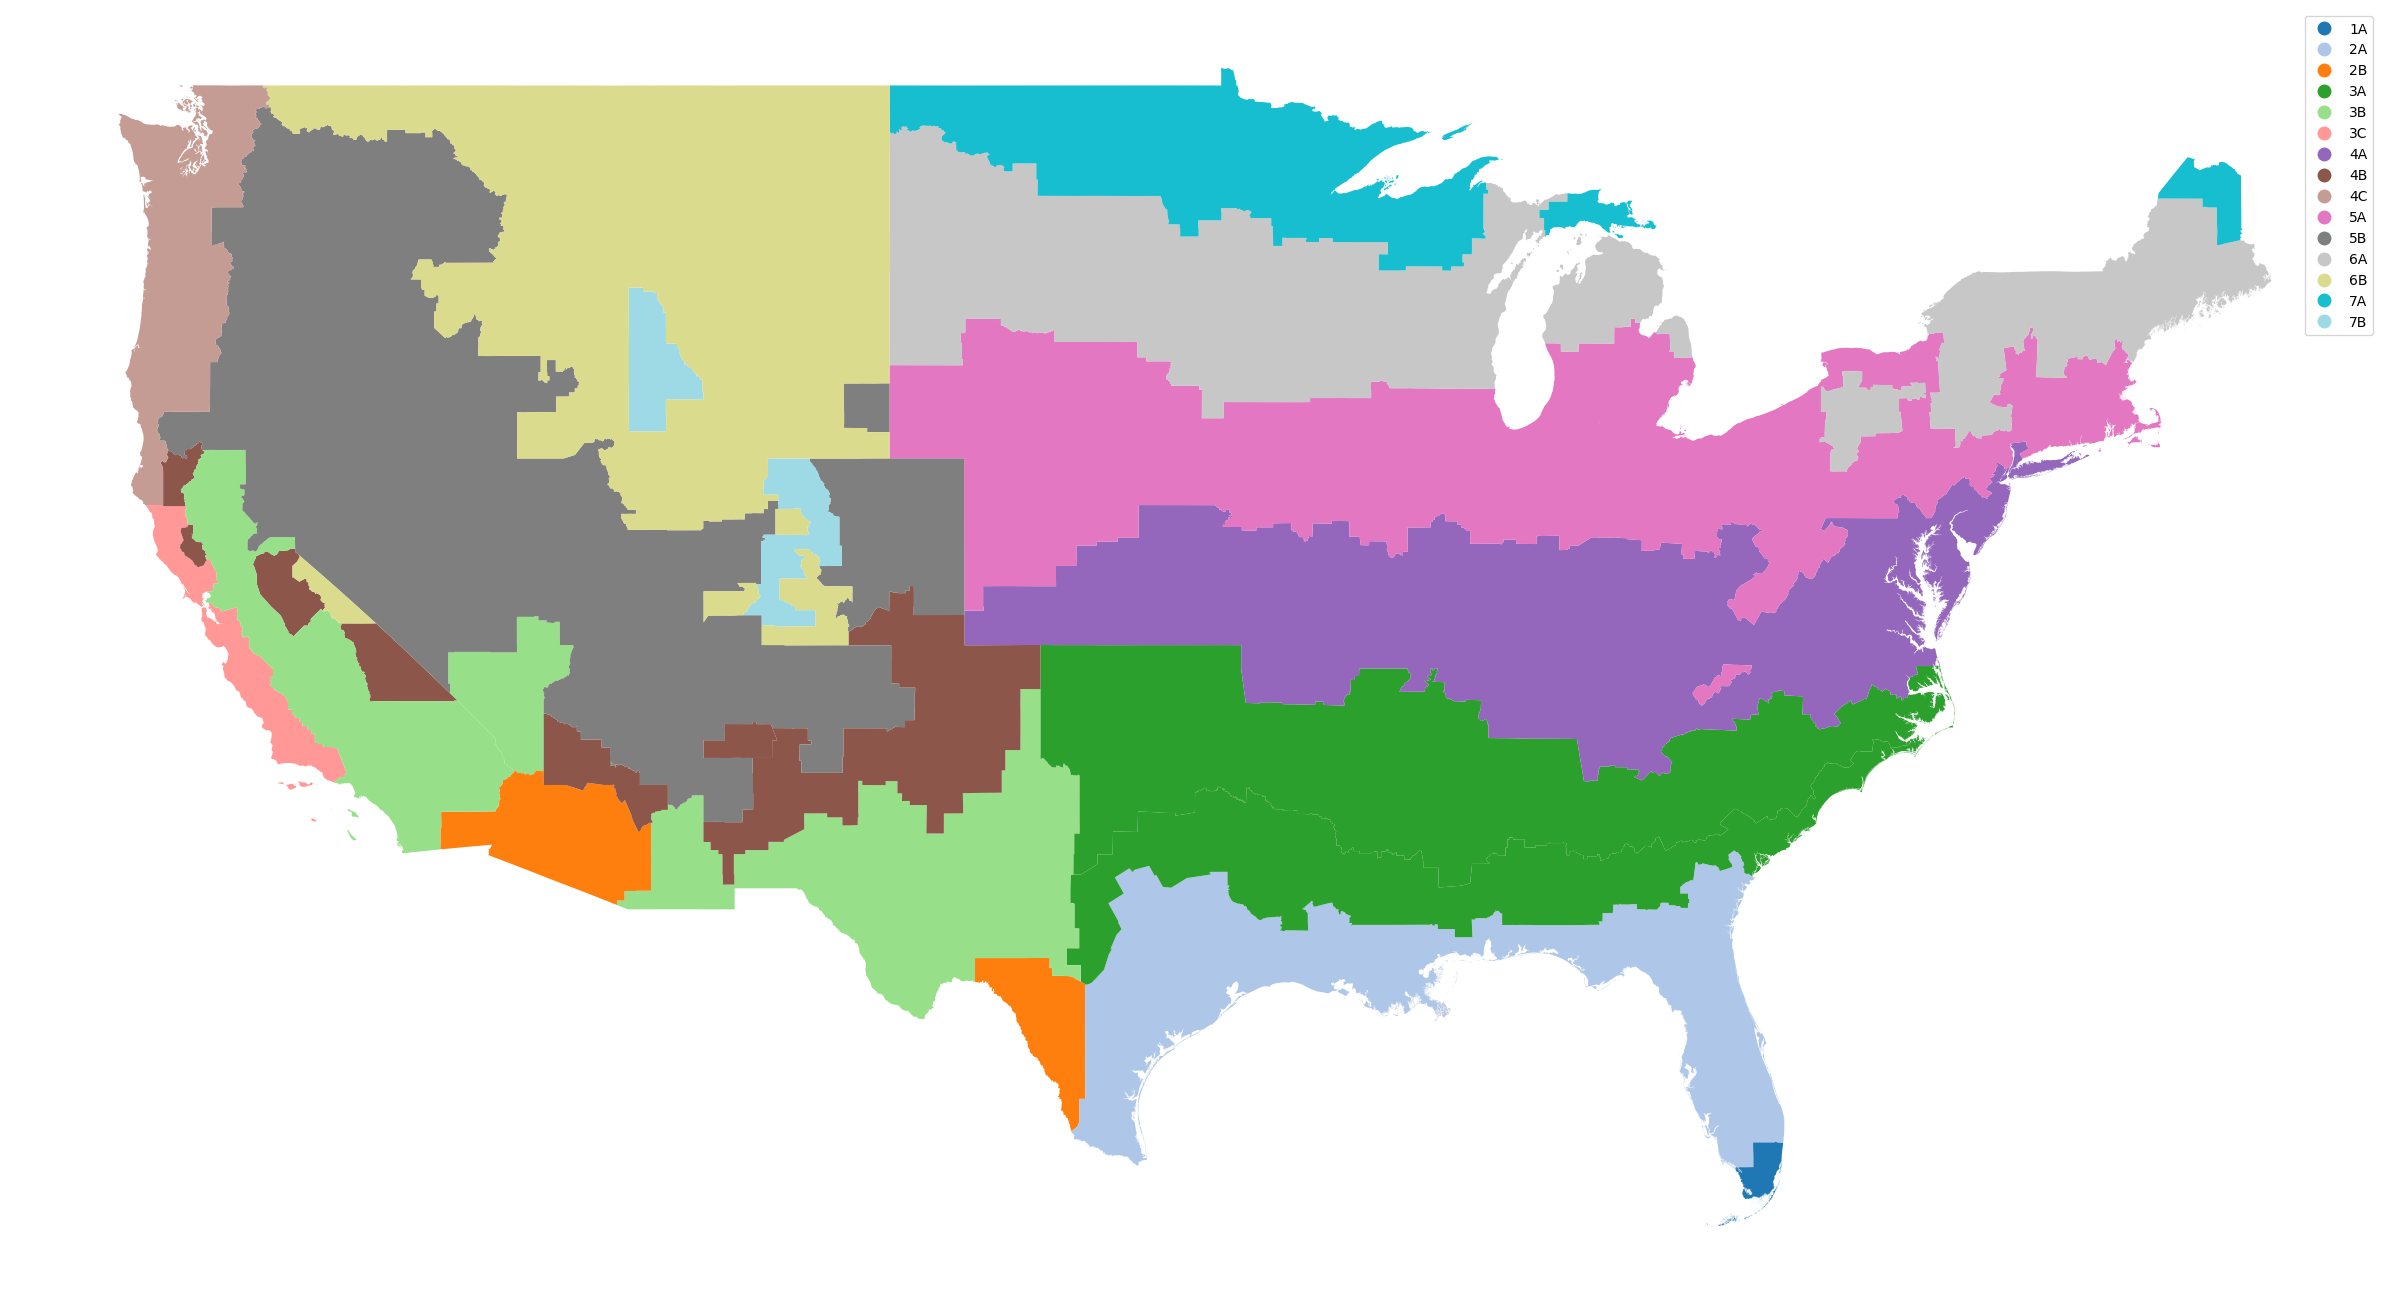

In [4]:
contiguous_us_bbox = Polygon([(-125, 24), (-125, 50), (-66, 50), (-66, 24)])
lower_48_gdf = gdf.clip(contiguous_us_bbox)
lower_48_gdf = lower_48_gdf[~lower_48_gdf["Climate_Zones"].isin(["7AK", "8"])]
fig, ax = plt.subplots(figsize=(24, 24))
lower_48_gdf.plot(ax=ax, column="Climate_Zones", legend=True, cmap="tab20")
plt.axis("off")
plt.tight_layout()
lower_48_gdf.to_file("simplified_split_filled_lower_48_climate_zones.geojson", driver="GeoJSON")

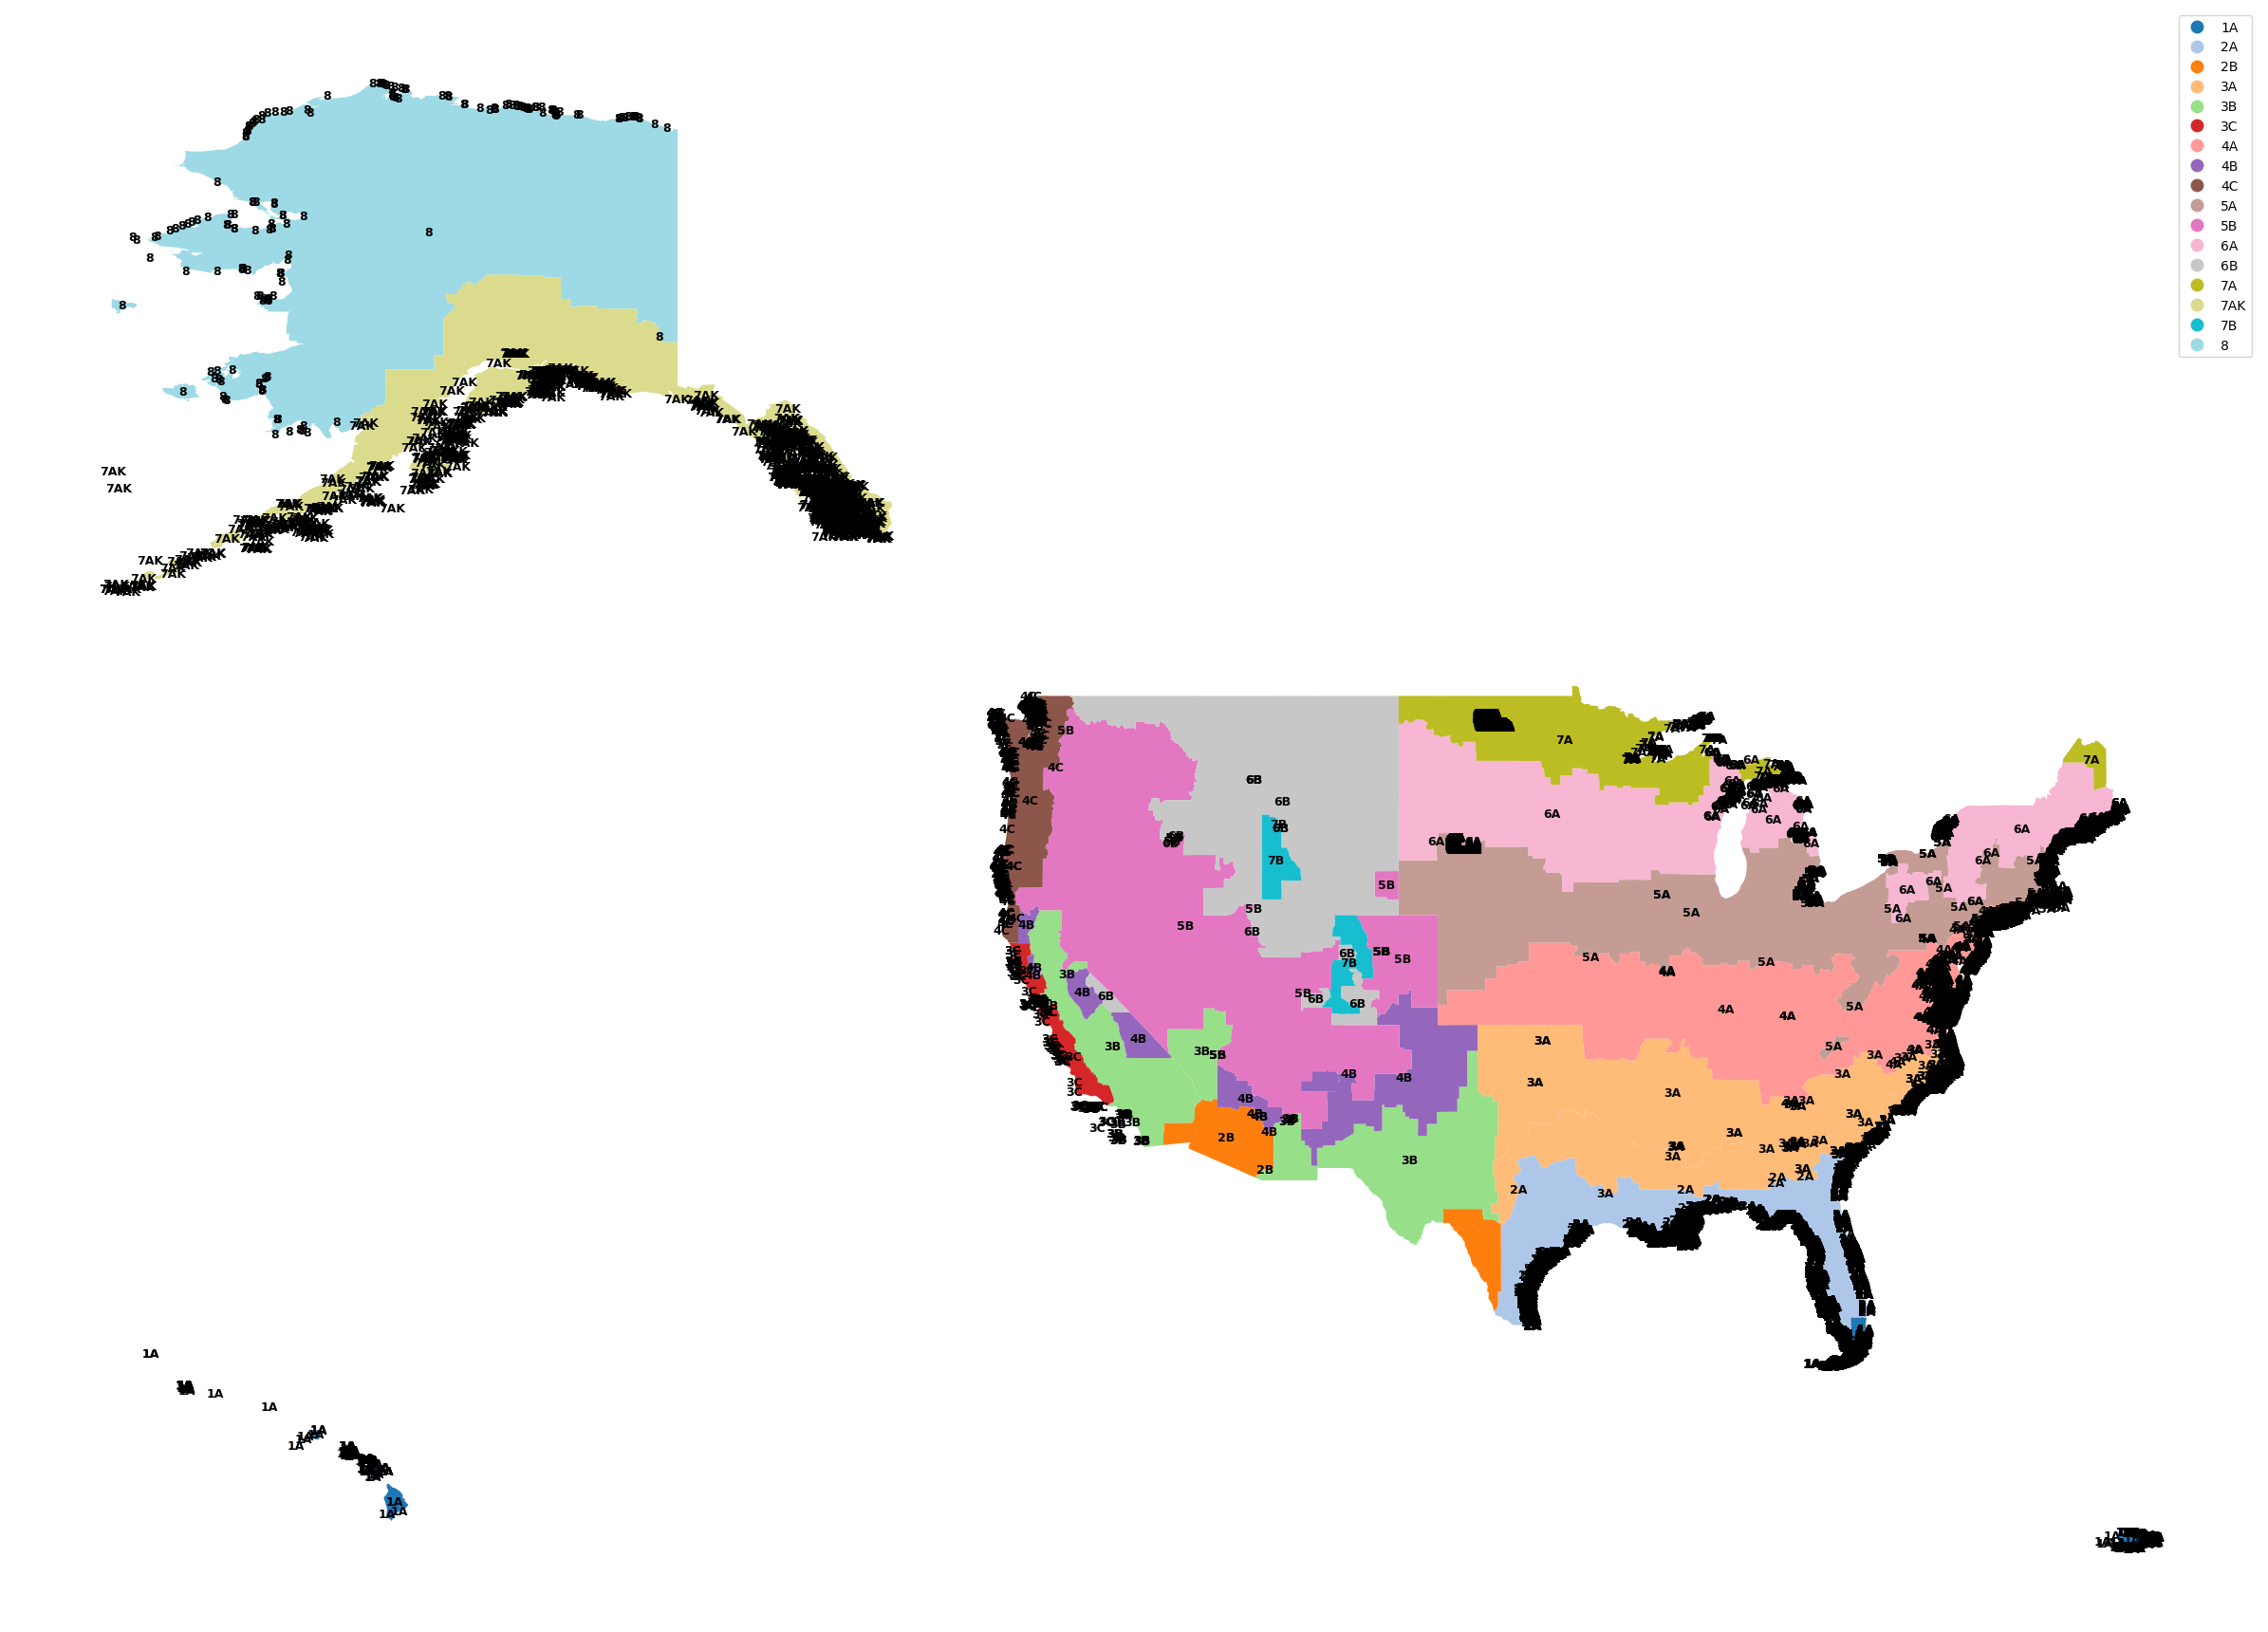

In [59]:
fig, ax = plt.subplots(figsize=(24, 24))
gdf.plot(ax=ax, column="Climate_Zones", legend=True, cmap="tab20")
plt.axis("off")
plt.tight_layout()
# ax.get_legend().remove()

for idx, row in gdf.iterrows():
    if row.geometry.is_empty:
        continue  # skip empty geometries
    
    geom = row['geometry']
    # Check if the geometry is a MultiPolygon
    if isinstance(geom, MultiPolygon):
        # Iterate through each individual polygon within the MultiPolygon
        for i, single_poly in enumerate(geom.geoms):
            # Get the centroid of the individual polygon
            centroid = single_poly.centroid
            # Place the label at the centroid
            # Adjust ha (horizontal alignment) and va (vertical alignment) as needed
            ax.text(
                centroid.x,
                centroid.y,
                row["Climate_Zones"], # Add "Part X" for multipolygons
                fontsize=9,
                ha='center',
                va='center',
                color='black', # Or 'white' depending on your colormap
                fontweight='bold'
            )
    # centroid = row.geometry.centroid # row.geometry.representative_point()# 
    # plt.text(centroid.x, centroid.y, str(row["Climate_Zones"]),
    #          ha='center', va='center', fontsize=8, color='black')

# fig.savefig("labeled_climate_zones.svg")

# VISUALS

## Cost-Based
### Market Size

In [3]:
cost_based_market_size_dict = {
    "1A":   495000 ,
"2A":   2145000 ,
"2B":   379500 ,
"3A":   1650000 ,
"3B":   214500 ,
"3C":   16500 ,
"4A":   5049000 ,
"4B":   165000 ,
"4C":   1204500 ,
"5A":   15114000 ,
"5B":   1881000 ,
"6A":   5230500 ,
"6B":   544500 ,
# "7":   808500 ,
"7A":   808500 ,
"7AK":  33000 ,
"7B":   66000 ,
"8AK":   0 ,
}

print(f"Total market size is: {sum(cost_based_market_size_dict.values())}")

cost_based_market_size_dict["7"] = cost_based_market_size_dict["7A"]
cost_based_market_size_dict["8"] = cost_based_market_size_dict["8AK"]


gdf["Market Size"] = np.array(cost_based_market_size_dict[climate_zone] for climate_zone in gdf["Climate_Zones"])

# Your provided data values
raw_data_values = gdf["Market Size"]

# gdf["Market Size"] = np.array([495000,2145000,379500,379500,1650000,1650000,214500,214500,16500,5049000,165000,165000,1204500,15114000,1881000,5230500,544500,907500,0])
# gdf.loc[7,"Climate_Zones"] = "3B"

Total market size is: 34996500


In [62]:
# fig, ax = plt.subplots(figsize=(24, 24))
# gdf.plot(ax=ax, column="Market Size", cmap="Reds") # , legend=False
# plt.axis("off")
# plt.tight_layout()

# fig.savefig("heat_map_of_market_size_US_regions_with_legend.svg")
# ax.get_legend().remove()

# for idx, row in gdf.iterrows():
#     if row.geometry.is_empty:
#         continue  # skip empty geometries
#     centroid = row.geometry.representative_point()# row.geometry.centroid
#     plt.text(centroid.x, centroid.y, str(row["Climate_Zones"]),
#              ha='center', va='center', fontsize=8, color='black')

/tmp/ipykernel_944/1745656669.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('Blues', num_unique_values)


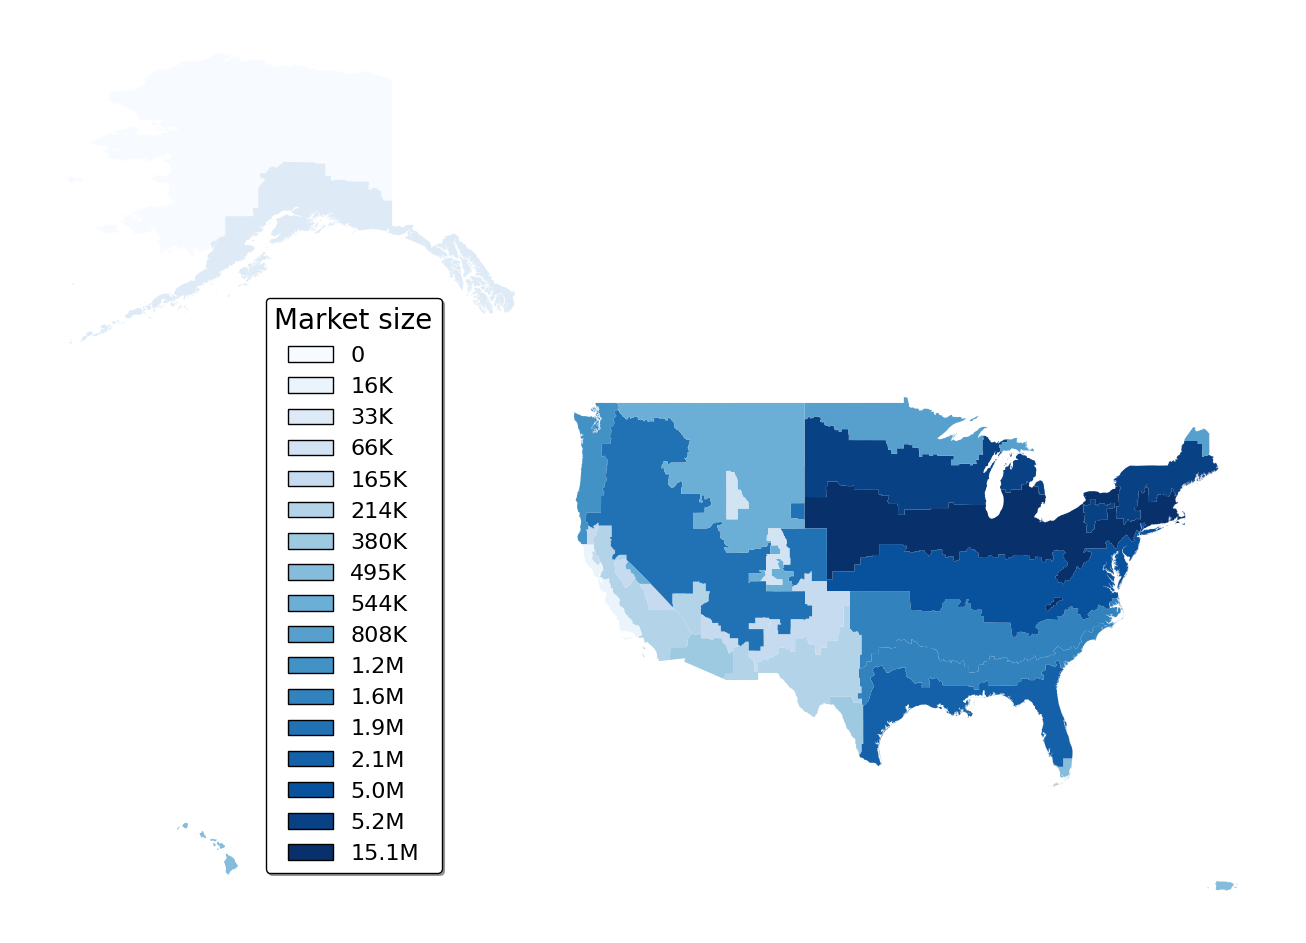

In [8]:
# Your provided data values
# raw_data_values = [
#     495000, 2145000, 379500, 379500, 1650000, 1650000, 214500, 214500, 16500,
#     5049000, 165000, 165000, 1204500, 15114000, 1881000, 5230500, 544500, 907500, 0
# ]

# Get unique and sorted values to define the categories and color mapping
unique_sorted_values = sorted(list(set(raw_data_values)))
num_unique_values = len(unique_sorted_values)

# Generate a custom colormap using "Reds"
colormap = cm.get_cmap('Blues', num_unique_values)
custom_colors_list = [colormap(i) for i in range(num_unique_values)]
custom_cmap = mcolors.ListedColormap(custom_colors_list)


# Convert the 'value_column' to a Categorical type with the custom order.
# This ensures that geopandas.plot assigns distinct colors based on your specific values.
value_category_type = pd.CategoricalDtype(categories=unique_sorted_values, ordered=True)
gdf['value_column_cat'] = gdf['Market Size'].astype(value_category_type)

# Function to format labels (to avoid scientific notation)
def format_value_label(num):
    """Formats a number into a human-readable string (e.g., 1.5M, 500K, 0)."""
    if num == 0:
        return "0"
    elif num >= 1_000_000:
        return f"{num / 1_000_000:.1f}M"
    elif num >= 1_000:
        return f"{num / 1_000:.0f}K"
    else:
        return f"{num:.0f}"

# Create formatted labels for the legend
formatted_labels = [format_value_label(val) for val in unique_sorted_values]

# Create a mapping from unique value to its assigned color for legend patches
color_map_for_legend = {
    unique_sorted_values[i]: custom_colors_list[i]
    for i in range(num_unique_values)
}

# Plot the GeoDataFrame
fig, ax = plt.subplots(1, 1, figsize=(16, 10))

gdf.plot(
    column='value_column_cat',
    cmap=custom_cmap,
    ax=ax,
    legend=False,
    markersize=100, # Adjust for point data
    # edgecolor='black',
    linewidth=0.5
)

# Create and add the custom legend
legend_handles = []
for value in unique_sorted_values:
    color = color_map_for_legend[value]
    label = format_value_label(value)
    legend_handles.append(Patch(facecolor=color, edgecolor='black', label=label))

# ax.legend(
#     handles=legend_handles,
#     title="Number of cost-adopting residences",
#     loc='lower left',
#     bbox_to_anchor=(1.05, 0),
#     frameon=True,
#     edgecolor='black',
#     fancybox=True,
#     shadow=True,
#     fontsize=14,
#     title_fontsize=18
# )



cax = ax.inset_axes([0.19, 0.65, 0.4, 0.05])

cax.legend(
    handles=legend_handles,
    title="Market size",
    loc='upper left',
    bbox_to_anchor=(0, 1),
    frameon=True,
    edgecolor='black',
    fancybox=True,
    shadow=True,
    fontsize=16,
    title_fontsize=20
)
cax.set_axis_off()

ax.set_axis_off()
plt.tight_layout()
plt.show()

fig.savefig("Ch4_simplified_heat_map_of_market_size_US_regions_with_legend_Blues.svg")

## Cost-Based
### Penetration

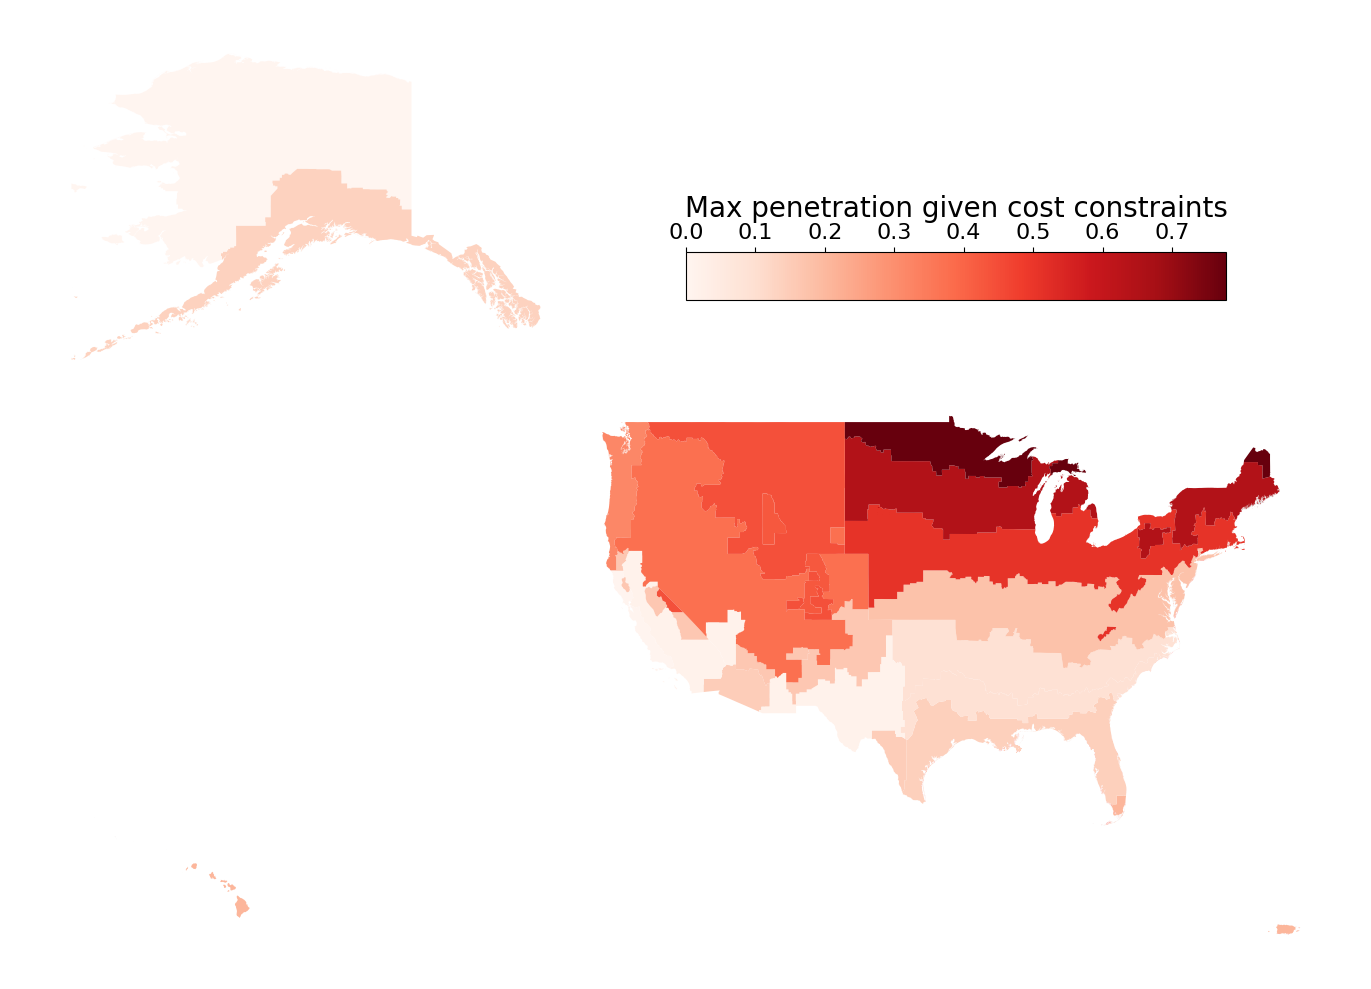

In [68]:
economic_penetration_dict = {
    "1A":     0.208369,
"2A":     0.140040,
"2B":     0.147500,
"3A":     0.094052,
"3B":     0.017207,
"3C":     0.005350,
"4A":     0.177676,
"4B":     0.164016,
"4C":     0.317496,
"5A":     0.509798,
"5B":     0.375306,
"6A":     0.645680,
"6B":     0.441761,
"7A":     0.778209,
"7AK":    0.136506,
"7B":     0.427804,
"8AK":    0.000000,
}

economic_penetration_dict["7"] = economic_penetration_dict["7A"]
economic_penetration_dict["8"] = economic_penetration_dict["8AK"]


gdf["Economic Penetration"] = np.array(list(economic_penetration_dict[climate_zone] for climate_zone in gdf["Climate_Zones"]), dtype=float) # np.array(economic_penetration_dict[climate_zone] for climate_zone in gdf["Climate_Zones"])

# gdf["Economic Penetration"] = np.array([0.208369,0.140040,0.147500,0.147500,0.094052,0.094052,0.017207,0.017207,0.005350,0.177676,0.164016,0.164016,0.317496,0.509798,0.375306,0.645680,0.441761,0.778209,0])

# gdf['centroid'] = gdf.geometry.centroid
# gdf[gdf["OBJECTID"]==17]
# gdf
# Plot the GeoDataFrame
fig, ax = plt.subplots(1, 1, figsize=(16, 10))

cax = ax.inset_axes([0.5, 0.7, 0.4, 0.05])

gdf.plot(
    column='Economic Penetration',
    cmap="Reds",
    ax=ax,
    legend=True,
    markersize=100, # Adjust for point data
    # edgecolor='black',
    linewidth=0.5,
    
    cax= cax,
    # fontsize= 12, # Font size for the tick labels (numbers) on the colorbar
    # title_fontsize= 14, # Font size for the colorbar title
    
    legend_kwds={
        # 'label': , # Title for the colorbar
        'shrink': 0.3, # Make the colorbar 70% of its default height
        'location': 'top',
        # 'orientation': 'horizontal',
        # 'ticklocation': 'top',
        # 'pad': 0.02, # Padding between the plot area and the colorbar
        # 'frameon': True, # Display a frame around the colorbar
        # 'edgecolor': 'black', # Color of the frame edge
        # 'fancybox': True, # Apply rounded corners to the frame
        # 'shadow': True # Add a shadow to the frame
    }
)

cax.tick_params(axis='x', labelsize=16)
cax.set_xlabel("Max penetration given cost constraints", fontsize=20)

# # Create and add the custom legend
# legend_handles = []
# for value in unique_sorted_values:
#     color = color_map_for_legend[value]
#     label = format_value_label(value)
#     legend_handles.append(Patch(facecolor=color, edgecolor='black', label=label))

# ax.legend(
#     # handles=legend_handles,
#     title="Portion of residences that can economically-feasibly adopt",
#     loc='upper left',
#     bbox_to_anchor=(1.1, 0.5),
#     frameon=True,
#     edgecolor='black',
#     fancybox=True,
#     shadow=True,
#     fontsize=10,
#     title_fontsize=12
# )

# ax.legend(
#     # handles=legend_handles,
#     title="Portion of residences that can economically-feasibly adopt",
#     loc='upper left',
#     bbox_to_anchor=(1, 1),
#     frameon=True,
#     edgecolor='black',
#     fancybox=True,
#     shadow=True,
#     fontsize=10,
#     title_fontsize=12,
# )

ax.set_axis_off()
plt.tight_layout()
plt.show()

fig.savefig("Ch4_simplified_heat_map_of_economic_penetration_US_regions_with_legend.svg")

## Grid-Based
### Penetration

In [69]:
grid_penetration_dict = {'1A': 0.632325233575468,
 '2A': 0.4605923626669744,
 '2B': 0.5,
 '3A': 0.0,
 '3B': 1.0,
 '3C': 0.06472312444413979,
 '4A': 0.0,
 '4B': 1.0,
 '4C': 0.09214372193757792,
 '5A': 0.007579637048233256,
 '5B': 0.08425623556700332,
 '6A': 0.0,
 '6B': 0.0,
 '7A': 0.0,
 '7B': 0,
 '7AK': 0,
 '8AK': 0,
 }

grid_penetration_dict["7"] = grid_penetration_dict["7A"]
grid_penetration_dict["8"] = grid_penetration_dict["8AK"]

gdf["Grid Penetration"] = np.array(list(grid_penetration_dict[climate_zone] for climate_zone in gdf["Climate_Zones"]), dtype=float) # np.array(economic_penetration_dict[climate_zone] for climate_zone in gdf["Climate_Zones"])


# gdf["Grid Penetration"] = np.array([0.632325233575468,0.4605923626669744,0.5,0.5,0.0,0.0,1.0,1.0,0.06472312444413979,0.0,1.0,1.0, 0.09214372193757792,0.007579637048233256,0.08425623556700332,0.0,0.0,0.0,0.0])

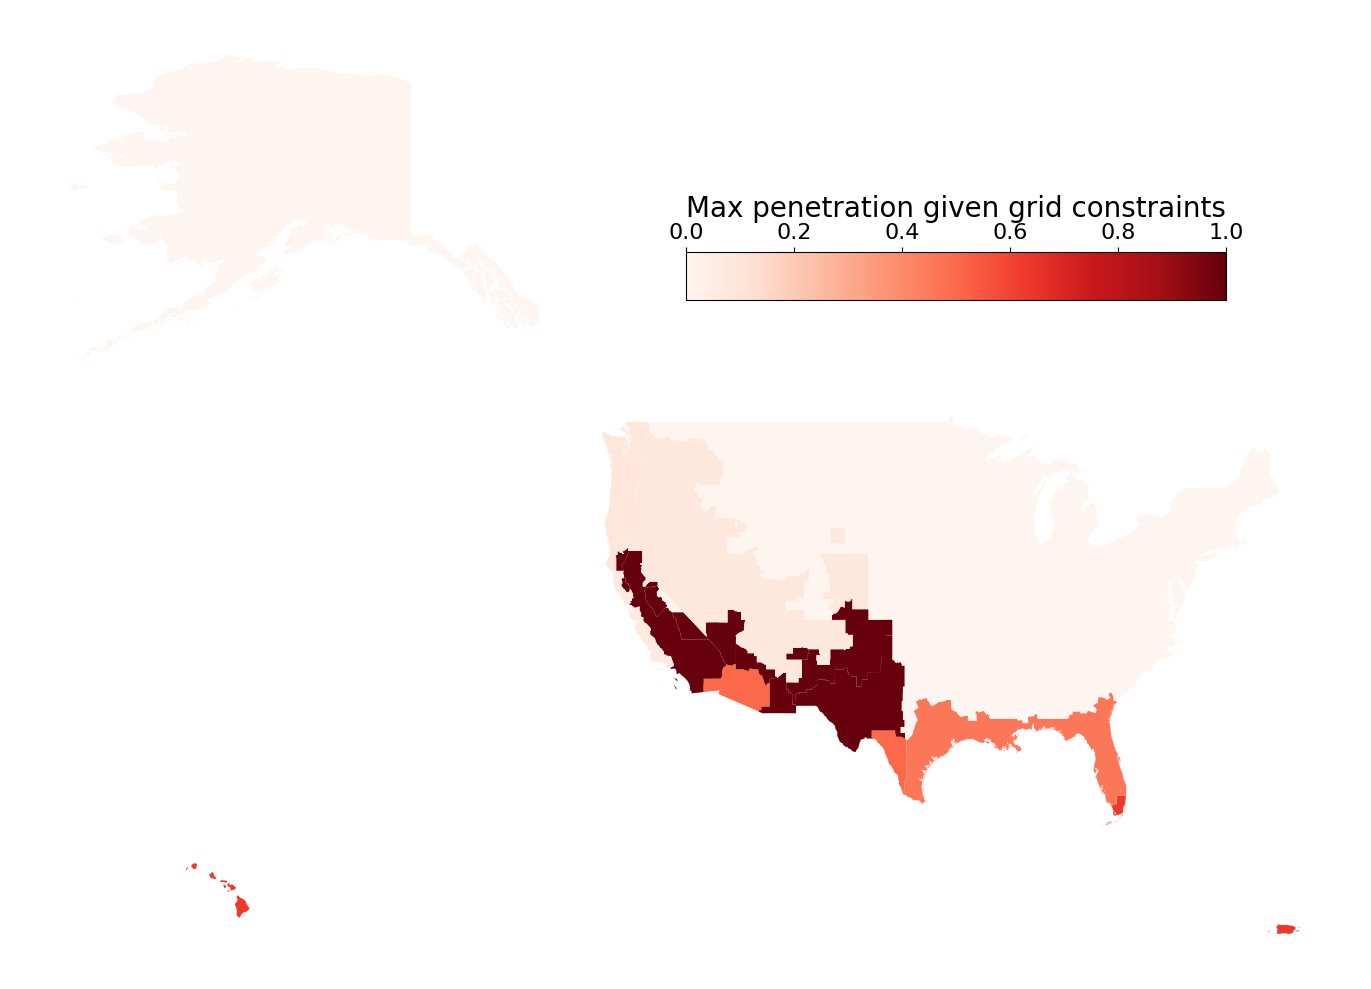

In [70]:
# Plot the GeoDataFrame
fig, ax = plt.subplots(1, 1, figsize=(16, 10))
cax = ax.inset_axes([0.5, 0.7, 0.4, 0.05])


gdf.plot(
    column='Grid Penetration',
    cmap="Reds",
    ax=ax,
    legend=True,
    markersize=100, # Adjust for point data
    # edgecolor='black',
    # linewidth=0.1,
    
    cax= cax,
    # fontsize= 12, # Font size for the tick labels (numbers) on the colorbar
    # title_fontsize= 14, # Font size for the colorbar title
    
    legend_kwds={
        # 'label': , # Title for the colorbar
        'shrink': 0.3, # Make the colorbar 70% of its default height
        'location': 'top',
        # 'orientation': 'horizontal',
        # 'ticklocation': 'top',
        # 'pad': 0.02, # Padding between the plot area and the colorbar
        # 'frameon': True, # Display a frame around the colorbar
        # 'edgecolor': 'black', # Color of the frame edge
        # 'fancybox': True, # Apply rounded corners to the frame
        # 'shadow': True # Add a shadow to the frame
    }
)

cax.tick_params(axis='x', labelsize=16)
cax.set_xlabel("Max penetration given grid constraints", fontsize=20)

# # Create and add the custom legend
# legend_handles = []
# for value in unique_sorted_values:
#     color = color_map_for_legend[value]
#     label = format_value_label(value)
#     legend_handles.append(Patch(facecolor=color, edgecolor='black', label=label))

# ax.legend(
#     # handles=legend_handles,
#     title="Portion of residences that can grid-feasibly adopt",
#     loc='upper left',
#     bbox_to_anchor=(1.1, 0.5),
#     frameon=True,
#     edgecolor='black',
#     fancybox=True,
#     shadow=True,
#     fontsize=10,
#     title_fontsize=12
# )

ax.set_axis_off()
plt.tight_layout()
plt.show()

fig.savefig("Ch4_simplified_heat_map_of_grid_penetration_US_regions_with_legend.svg")

## Grid-Based
### Market Size

/tmp/ipykernel_752/2090407260.py:37: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('Blues', num_unique_values)


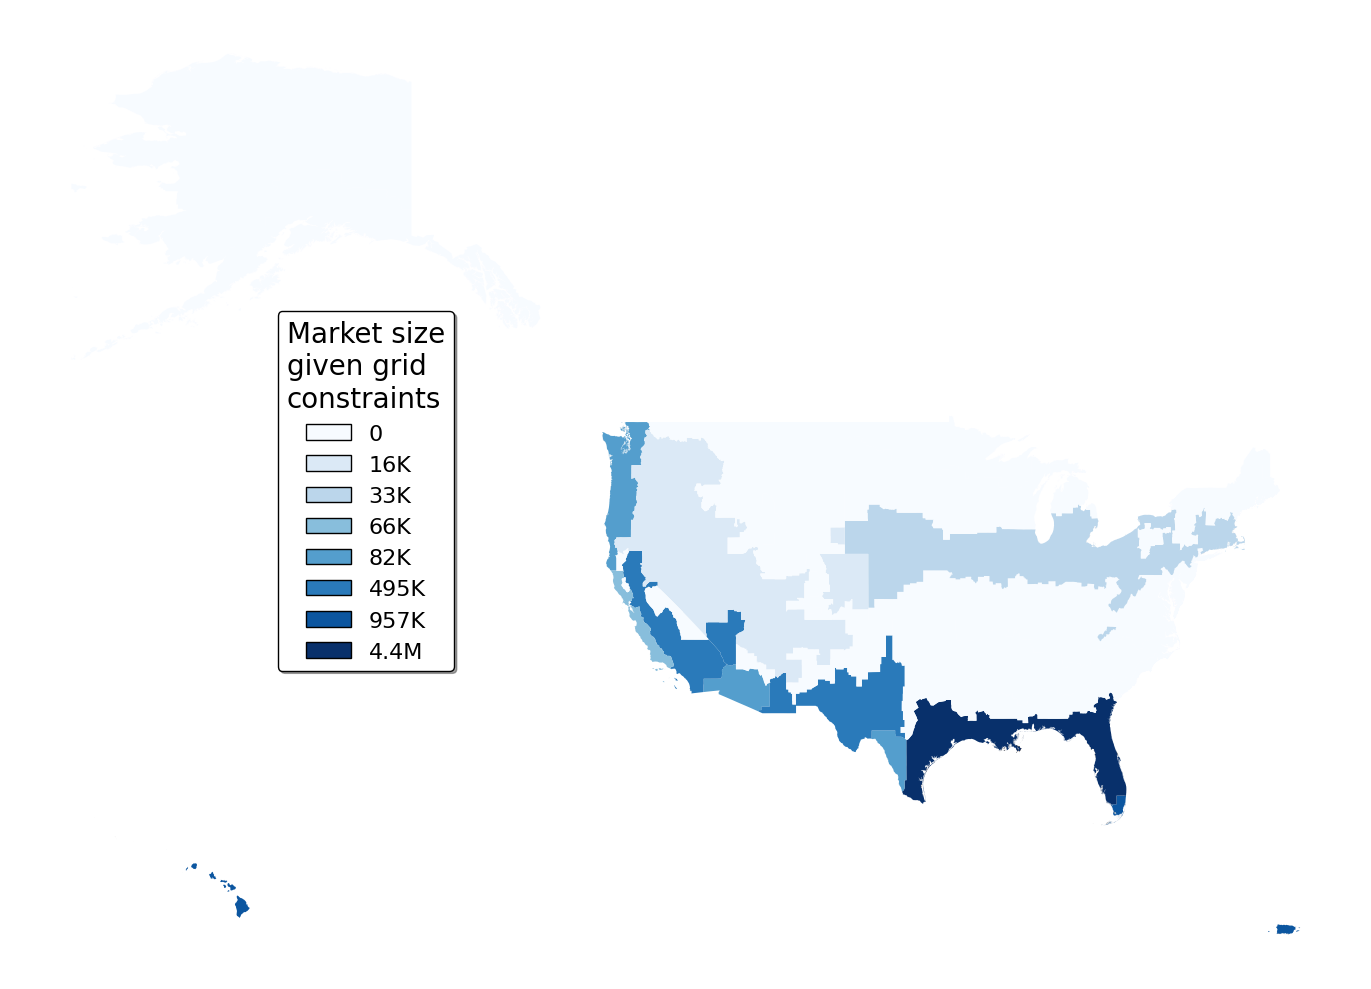

In [71]:
grid_market_dict = {"1A":  957000,
"2A":  4438500,
"2B":  82500,
"3A":  0,
"3B":  495000,
"3C":  66000,
"4A":  0,
"4B":  0,
"4C":  82500,
"5A":  33000,
"5B":  16500,
"6A":  0,
"6B":  0,
"7A":  0,
"7AK": 0,
"7B":  0,
"8AK": 0,
 }

grid_market_dict["7"] = grid_market_dict["7A"]
grid_market_dict["8"] = grid_market_dict["8AK"]

gdf["Grid-Based Market Size"] = np.array(list(grid_market_dict[climate_zone] for climate_zone in gdf["Climate_Zones"]), dtype=float) # np.array(economic_penetration_dict[climate_zone] for climate_zone in gdf["Climate_Zones"])


# gdf["Grid-Based Market Size"] = np.array([957000,4438500,82500,82500,0,0,495000,495000,66000,0,0,0,82500,33000,16500,0,0,0,0])


# Your provided data values
grid_based_raw_data_values = gdf["Grid-Based Market Size"] # [957000,4438500,82500,82500,0,0,495000,495000,66000,0,0,0,82500,33000,16500,0,0,0,0]

# Get unique and sorted values to define the categories and color mapping
unique_sorted_values = sorted(list(set(grid_based_raw_data_values)))
num_unique_values = len(unique_sorted_values)

# Generate a custom colormap using "Reds"
colormap = cm.get_cmap('Blues', num_unique_values)
custom_colors_list = [colormap(i) for i in range(num_unique_values)]
custom_cmap = mcolors.ListedColormap(custom_colors_list)


# Convert the 'value_column' to a Categorical type with the custom order.
# This ensures that geopandas.plot assigns distinct colors based on your specific values.
value_category_type = pd.CategoricalDtype(categories=unique_sorted_values, ordered=True)
gdf['Grid-Based value_column_cat'] = gdf['Grid-Based Market Size'].astype(value_category_type)

# Function to format labels (to avoid scientific notation)
def format_value_label(num):
    """Formats a number into a human-readable string (e.g., 1.5M, 500K, 0)."""
    if num == 0:
        return "0"
    elif num >= 1_000_000:
        return f"{num / 1_000_000:.1f}M"
    elif num >= 1_000:
        return f"{num / 1_000:.0f}K"
    else:
        return f"{num:.0f}"

# Create formatted labels for the legend
formatted_labels = [format_value_label(val) for val in unique_sorted_values]

# Create a mapping from unique value to its assigned color for legend patches
color_map_for_legend = {
    unique_sorted_values[i]: custom_colors_list[i]
    for i in range(num_unique_values)
}

# Plot the GeoDataFrame
fig, ax = plt.subplots(1, 1, figsize=(16, 10))

gdf.plot(
    column='Grid-Based value_column_cat',
    cmap=custom_cmap,
    ax=ax,
    legend=False,
    markersize=100, # Adjust for point data
    # edgecolor='black',
    linewidth=0.5
)

# Create and add the custom legend
legend_handles = []
for value in unique_sorted_values:
    color = color_map_for_legend[value]
    label = format_value_label(value)
    legend_handles.append(Patch(facecolor=color, edgecolor='black', label=label))

    
cax = ax.inset_axes([0.19, 0.65, 0.4, 0.05])

cax.legend(
    handles=legend_handles,
    title="Market size\ngiven grid\nconstraints",
    loc='upper left',
    bbox_to_anchor=(0, 1),
    frameon=True,
    edgecolor='black',
    fancybox=True,
    shadow=True,
    fontsize=16,
    title_fontsize=20
)
cax.set_axis_off()

# ax.legend(
#     handles=legend_handles,
#     title="Number of residences grid can support",
#     loc='lower left',
#     bbox_to_anchor=(1.05, 0),
#     frameon=True,
#     edgecolor='black',
#     fancybox=True,
#     shadow=True,
#     fontsize=14,
#     title_fontsize=18
# )

ax.set_axis_off()
plt.tight_layout()
plt.show()

fig.savefig("Ch4_simplified_heat_map_of_grid_based_market_size_US_regions_with_legend_Blues.svg")


## BOTH Based
### Penetration

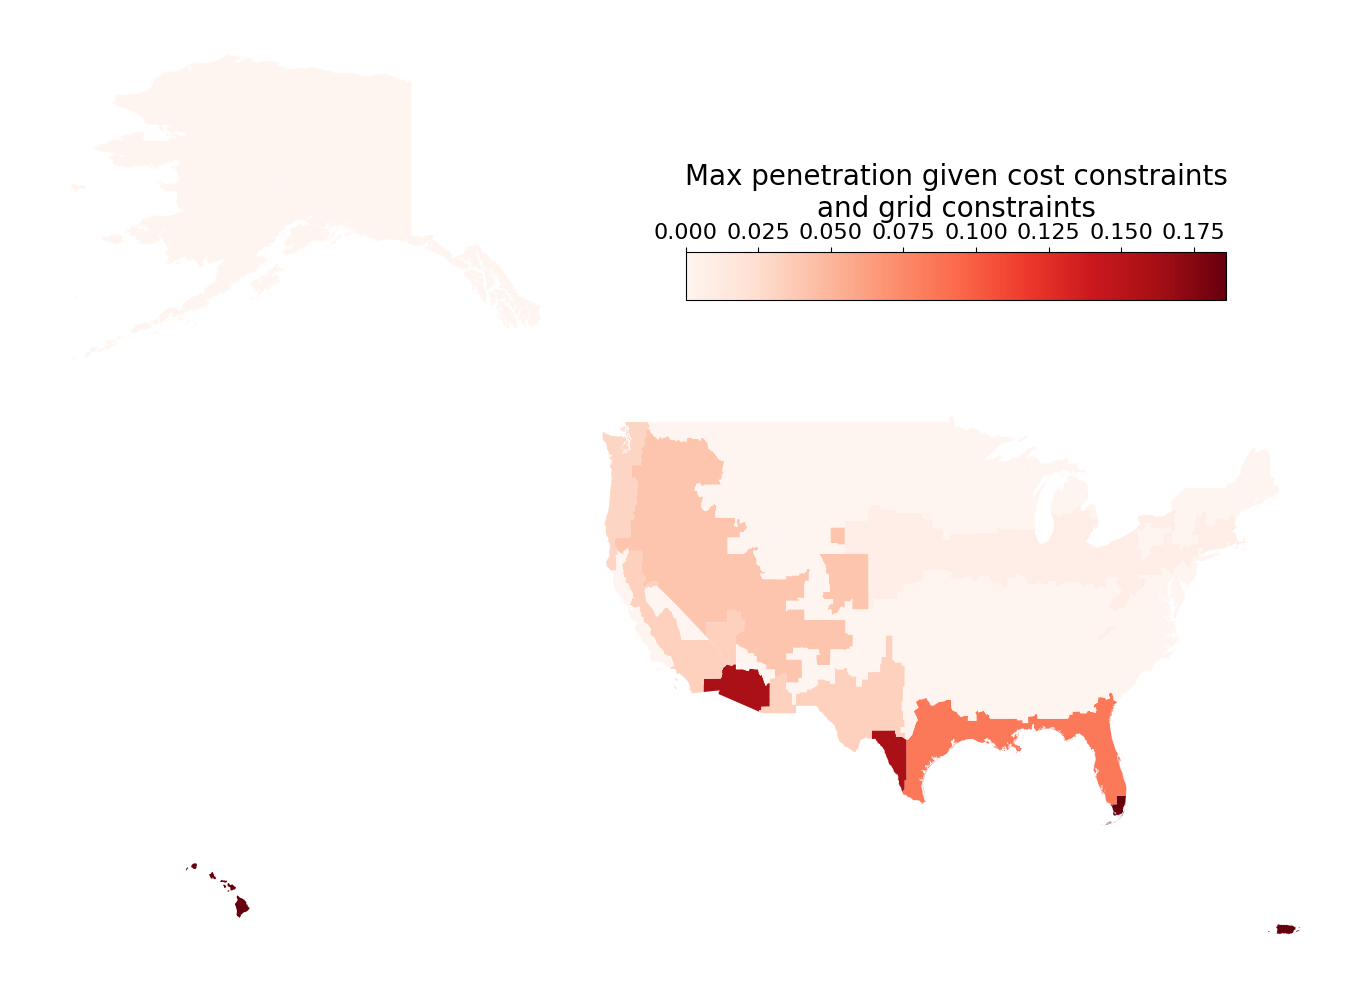

In [72]:
# gdf

BOTH_penetration_dict = {'1A': 0.18630399019134905,
 '2A': 0.08444016163404178,
 '2B': 0.159090909,
 '3A': 0.0,
 '3B': 0.032894737,
 '3C': 0.0,
 '4A': 0.0,
 '4B': 0.0,
 '4C': 0.02993705547528206,
 '5A': 0.007579637048233256,
 '5B': 0.04044299307216159,
 '6A': 0.0,
 '6B': 0.0,
 '7A': 0.0,
 '7B': 0,
 '7AK':0,
 '8':0,}

# BOTH_penetration_dict["7"] = BOTH_penetration_dict["7A"]
# BOTH_penetration_dict["8"] = BOTH_penetration_dict["8AK"]

gdf["BOTH Penetration"] = np.array(list(BOTH_penetration_dict[climate_zone] for climate_zone in gdf["Climate_Zones"]), dtype=float)


# gdf["BOTH Penetration"] = np.array([0.18630399019134905,0.08444016163404178,0.159090909,0.159090909,0.0,0.0,0.032894737,0.032894737,0.0,0.0,0.0,0.0,0.02993705547528206,0.007579637048233256,0.04044299307216159,0.0,0.0,0.0,0.0])

# Plot the GeoDataFrame
fig, ax = plt.subplots(1, 1, figsize=(16, 10))
cax = ax.inset_axes([0.5, 0.7, 0.4, 0.05])

gdf.plot(
    column='BOTH Penetration',
    cmap="Reds",
    ax=ax,
    legend=True,
    markersize=100, # Adjust for point data
    # edgecolor='black',
    linewidth=0.5,
    
    cax= cax,
    # fontsize= 12, # Font size for the tick labels (numbers) on the colorbar
    # title_fontsize= 14, # Font size for the colorbar title
    
    legend_kwds={
        # 'label': , # Title for the colorbar
        'shrink': 0.3, # Make the colorbar 70% of its default height
        'location': 'top',
        # 'orientation': 'horizontal',
        # 'ticklocation': 'top',
        # 'pad': 0.02, # Padding between the plot area and the colorbar
        # 'frameon': True, # Display a frame around the colorbar
        # 'edgecolor': 'black', # Color of the frame edge
        # 'fancybox': True, # Apply rounded corners to the frame
        # 'shadow': True # Add a shadow to the frame
    }
)

cax.tick_params(axis='x', labelsize=16)
cax.set_xlabel("Max penetration given cost constraints\nand grid constraints", fontsize=20)

# # Create and add the custom legend
# legend_handles = []
# for value in unique_sorted_values:
#     color = color_map_for_legend[value]
#     label = format_value_label(value)
#     legend_handles.append(Patch(facecolor=color, edgecolor='black', label=label))

# ax.legend(
#     # handles=legend_handles,
#     title="Portion of residences that can adopt",
#     loc='upper left',
#     bbox_to_anchor=(1.1, 0.5),
#     frameon=True,
#     edgecolor='black',
#     fancybox=True,
#     shadow=True,
#     fontsize=10,
#     title_fontsize=12
# )

ax.set_axis_off()
plt.tight_layout()
plt.show()

fig.savefig("Ch4_simplified_heat_map_of_BOTH_penetration_US_regions_with_legend.svg")

## BOTH Based
### Market Size

/tmp/ipykernel_752/2783249251.py:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('Blues', num_unique_values)


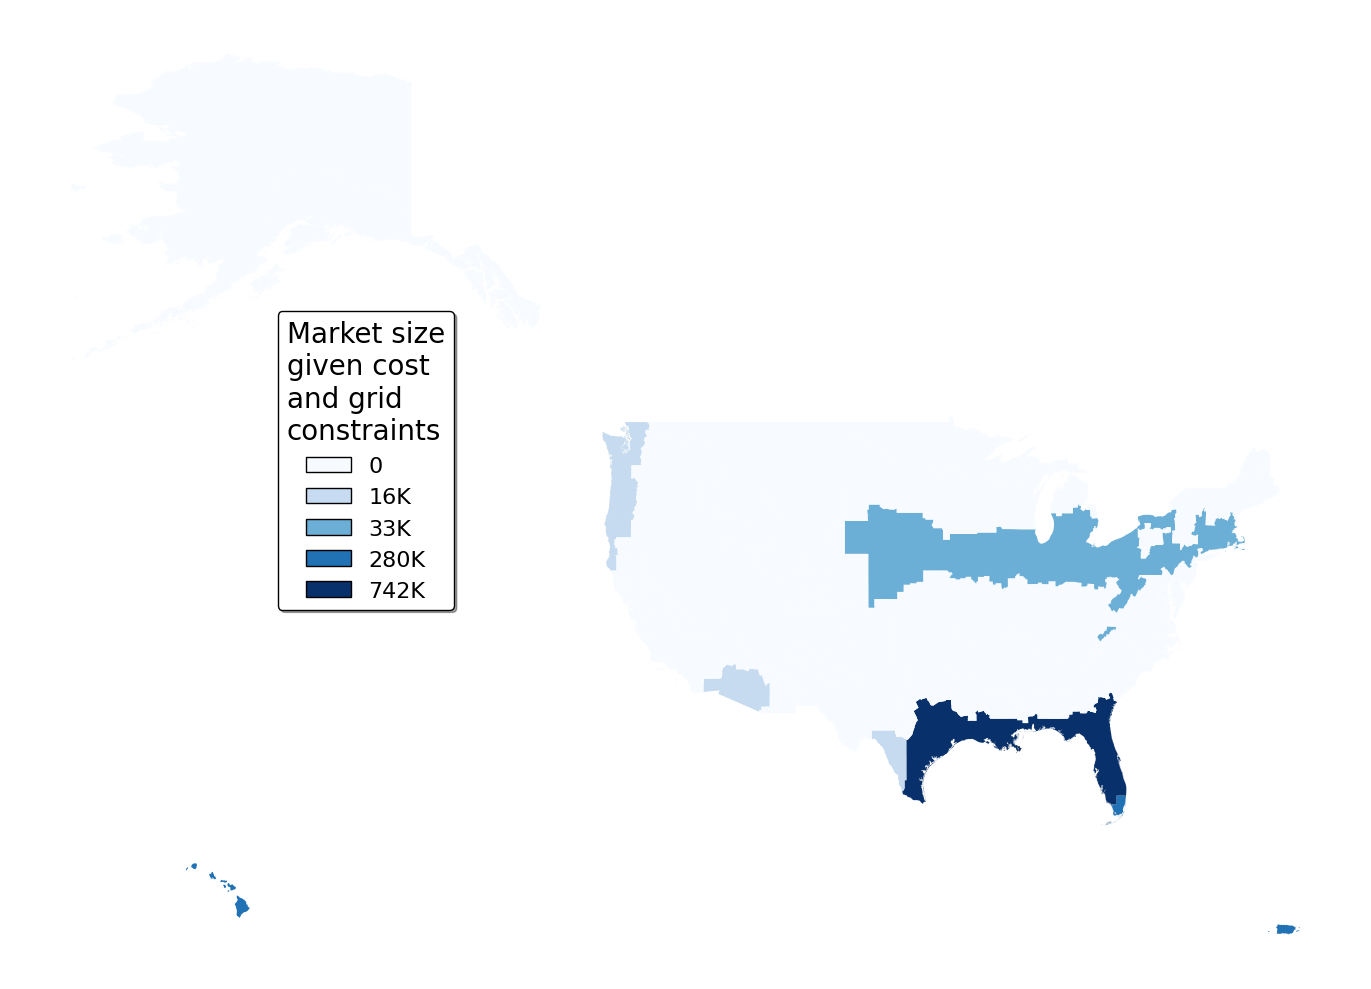

In [73]:
both_based_market_size_dict = {"1A":     280500,
"2A":     742500,
"2B":      16500,
"3A":          0,
"3B":          0,
"3C":          0,
"4A":          0,
"4B":          0,
"4C":      16500,
"5A":      33000,
"5B":          0,
"6A":          0,
"6B":          0,
"7":          0,
"7A":          0,
"7AK":         0,
"7B":          0,
"8AK":         0,
"8":         0}
gdf["BOTH Market Size"] = np.array(both_based_market_size_dict[climate_zone] for climate_zone in gdf["Climate_Zones"])

# Your provided data values
raw_data_values = gdf["BOTH Market Size"]

# Get unique and sorted values to define the categories and color mapping
unique_sorted_values = sorted(list(set(raw_data_values)))
num_unique_values = len(unique_sorted_values)

# Generate a custom colormap using "Reds"
colormap = cm.get_cmap('Blues', num_unique_values)
custom_colors_list = [colormap(i) for i in range(num_unique_values)]
custom_cmap = mcolors.ListedColormap(custom_colors_list)


# Convert the 'value_column' to a Categorical type with the custom order.
# This ensures that geopandas.plot assigns distinct colors based on your specific values.
value_category_type = pd.CategoricalDtype(categories=unique_sorted_values, ordered=True)
gdf['BOTH Market Size value_column_cat'] = gdf['BOTH Market Size'].astype(value_category_type)

# Function to format labels (to avoid scientific notation)
def format_value_label(num):
    """Formats a number into a human-readable string (e.g., 1.5M, 500K, 0)."""
    if num == 0:
        return "0"
    elif num >= 1_000_000:
        return f"{num / 1_000_000:.1f}M"
    elif num >= 1_000:
        return f"{num / 1_000:.0f}K"
    else:
        return f"{num:.0f}"

# Create formatted labels for the legend
formatted_labels = [format_value_label(val) for val in unique_sorted_values]

# Create a mapping from unique value to its assigned color for legend patches
color_map_for_legend = {
    unique_sorted_values[i]: custom_colors_list[i]
    for i in range(num_unique_values)
}

# Plot the GeoDataFrame
fig, ax = plt.subplots(1, 1, figsize=(16, 10))

cax = ax.inset_axes([0.19, 0.65, 0.4, 0.05])

gdf.plot(
    column='BOTH Market Size value_column_cat',
    cmap=custom_cmap,
    ax=ax,
    legend=False,
    markersize=100, # Adjust for point data
    # edgecolor='black',
    linewidth=0.5
)

# Create and add the custom legend
legend_handles = []
for value in unique_sorted_values:
    color = color_map_for_legend[value]
    label = format_value_label(value)
    legend_handles.append(Patch(facecolor=color, edgecolor='black', label=label))


cax.legend(
    handles=legend_handles,
    title="Market size\ngiven cost\nand grid\nconstraints",
    loc='upper left',
    bbox_to_anchor=(0, 1),
    frameon=True,
    edgecolor='black',
    fancybox=True,
    shadow=True,
    fontsize=16,
    title_fontsize=20
)
cax.set_axis_off()

# ax.legend(
#     handles=legend_handles,
#     title="Number of residences grid can support",
#     loc='lower left',
#     bbox_to_anchor=(1.05, 0),
#     frameon=True,
#     edgecolor='black',
#     fancybox=True,
#     shadow=True,
#     fontsize=14,
#     title_fontsize=18
# )

ax.set_axis_off()
plt.tight_layout()
plt.show()

fig.savefig("Ch4_simplified_heat_map_of_BOTH_based_market_size_US_regions_with_legend_Blues.svg")


## Relaxed Grid-Based
### Penetration

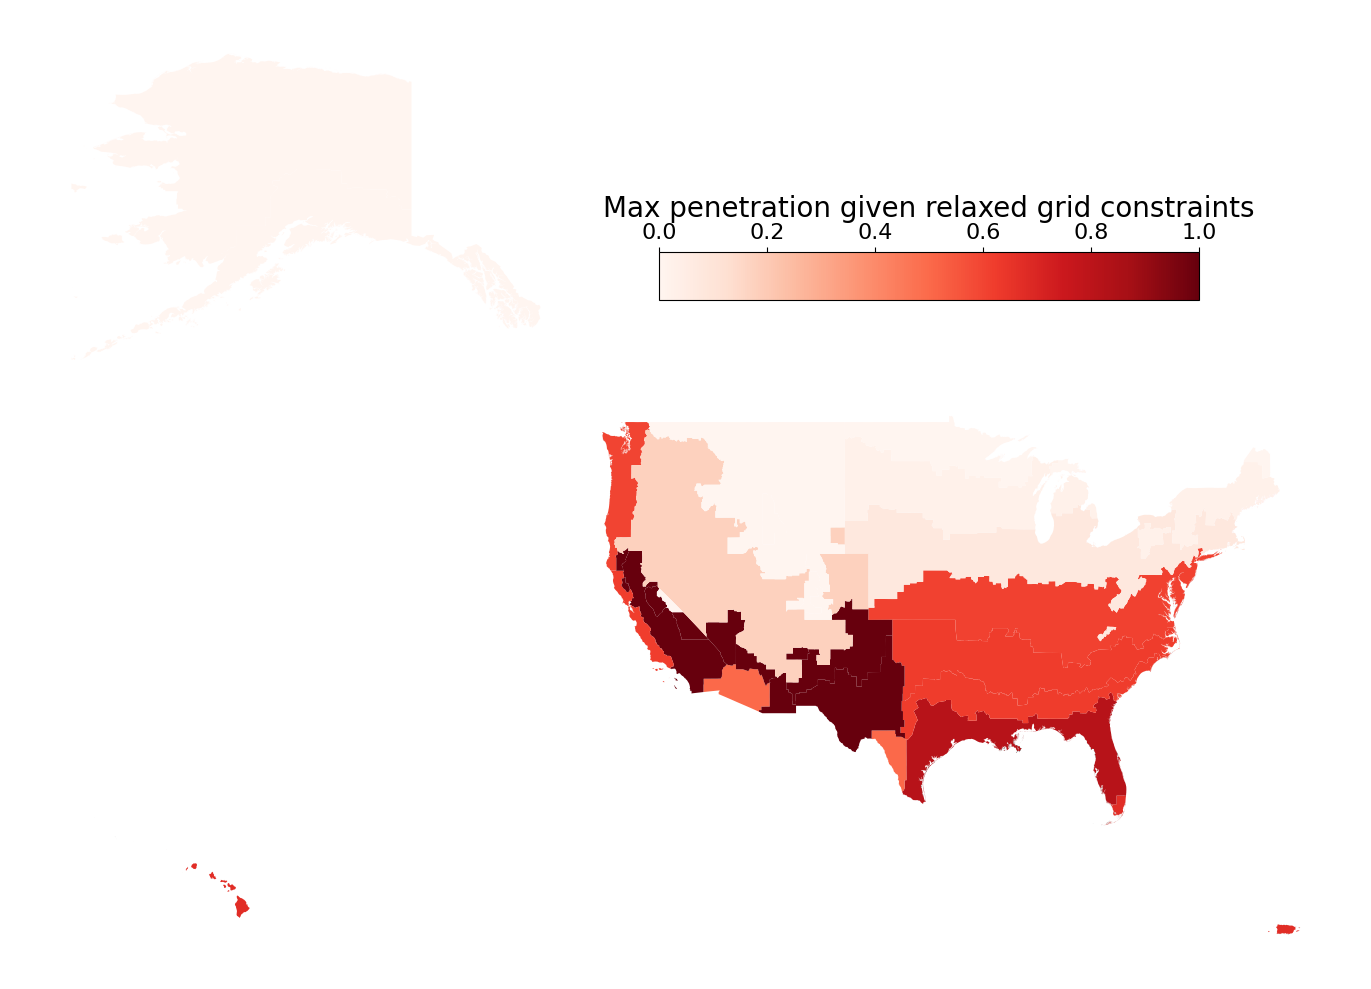

In [74]:
relaxed_grid_based_penetration_dict = {'1A': 0.6740364404158704,
 '2A': 0.8128122121965403,
 '2B': 0.5,
 '3A': 0.6234356545348289,
 '3B': 1.0,
 '3C': 0.6174754670265636,
 '4A': 0.6087693134159086,
 '4B': 1.0,
 '4C': 0.5978442405191362,
 '5A': 0.07579637048233256,
 '5B': 0.17805122316852892,
 '6A': 0.025937834414140146,
 '6B': 0.0,
 '7': 0.0,
 '7A': 0.0,
 '7AK': 0.0,
 '7B': 0,
 '8': 0,
 "8AK": 0}

gdf["Relaxed Grid Penetration"] = np.array(list(relaxed_grid_based_penetration_dict[climate_zone] for climate_zone in gdf["Climate_Zones"]), dtype=float)

# Plot the GeoDataFrame
fig, ax = plt.subplots(1, 1, figsize=(16, 10))

cax = ax.inset_axes([0.48, 0.7, 0.4, 0.05])
gdf.plot(
    column='Relaxed Grid Penetration',
    cmap="Reds",
    ax=ax,
    legend=True,
    markersize=100, # Adjust for point data
    # edgecolor='black',
    linewidth=0.5,
    
    cax= cax,
    # fontsize= 12, # Font size for the tick labels (numbers) on the colorbar
    # title_fontsize= 14, # Font size for the colorbar title
    
    legend_kwds={
        # 'label': , # Title for the colorbar
        'shrink': 0.3, # Make the colorbar 70% of its default height
        'location': 'top',
        # 'orientation': 'horizontal',
        # 'ticklocation': 'top',
        # 'pad': 0.02, # Padding between the plot area and the colorbar
        # 'frameon': True, # Display a frame around the colorbar
        # 'edgecolor': 'black', # Color of the frame edge
        # 'fancybox': True, # Apply rounded corners to the frame
        # 'shadow': True # Add a shadow to the frame
    }
)

cax.tick_params(axis='x', labelsize=16)
cax.set_xlabel("Max penetration given relaxed grid constraints", fontsize=20)

# # Create and add the custom legend
# legend_handles = []
# for value in unique_sorted_values:
#     color = color_map_for_legend[value]
#     label = format_value_label(value)
#     legend_handles.append(Patch(facecolor=color, edgecolor='black', label=label))

# ax.legend(
#     # handles=legend_handles,
#     title="Portion of residences that can adopt without grid infeasibility",
#     loc='upper left',
#     bbox_to_anchor=(1.1, 0.5),
#     frameon=True,
#     edgecolor='black',
#     fancybox=True,
#     shadow=True,
#     fontsize=10,
#     title_fontsize=12
# )

ax.set_axis_off()
plt.tight_layout()
plt.show()

fig.savefig("Ch4_simplified_heat_map_of_relaxed_grid_penetration_US_regions_with_legend.svg")

## Relaxed Grid-Based
### Market Size

/tmp/ipykernel_752/3289731556.py:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('Blues', num_unique_values)


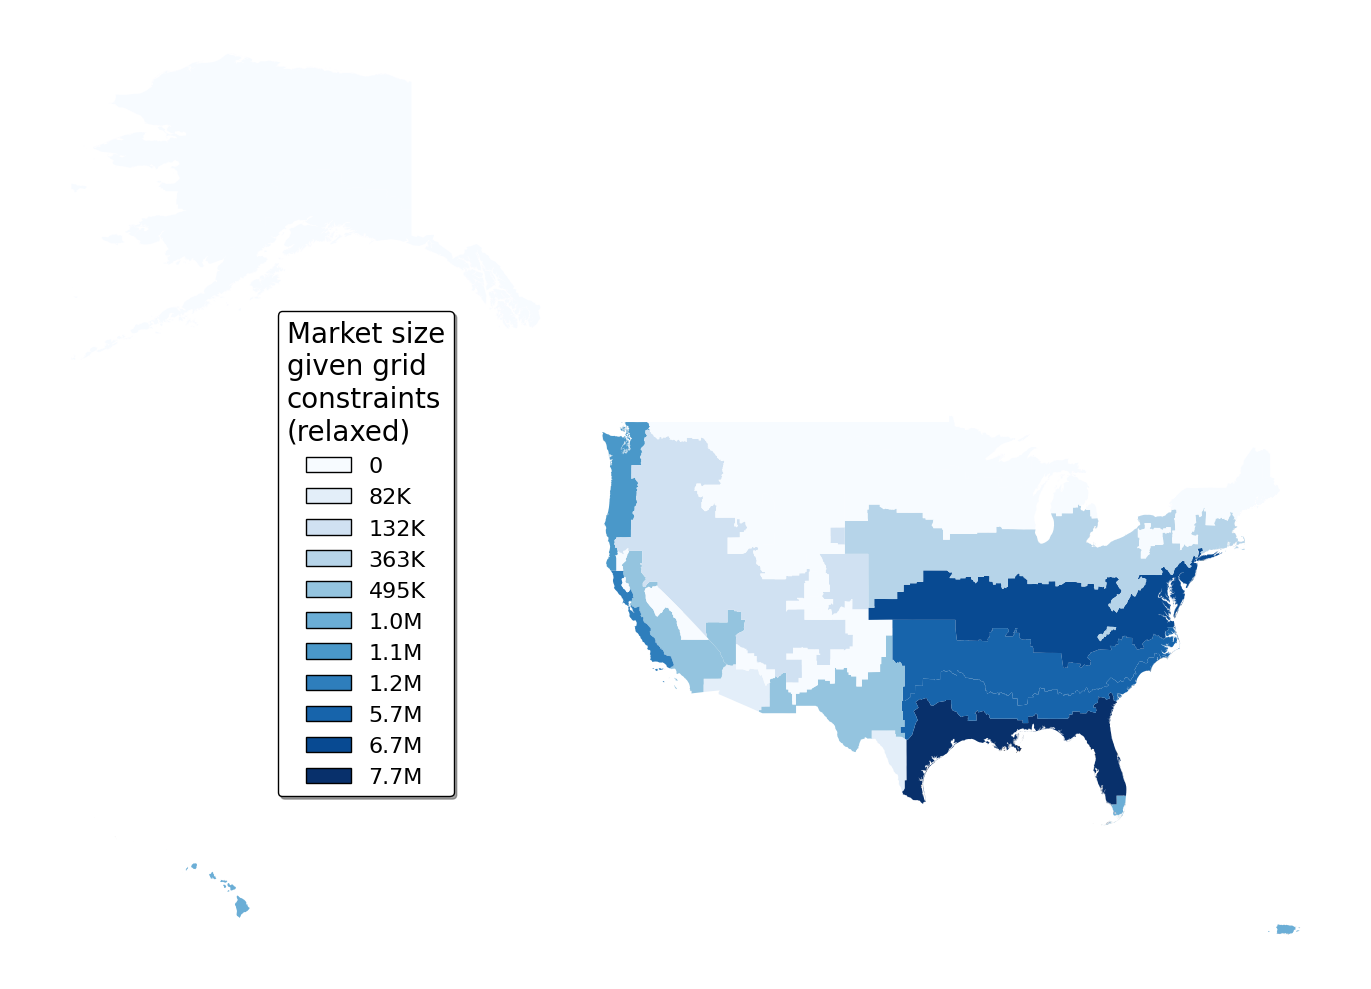

In [75]:
relaxed_grid_based_market_size_dict = {"1A":     1006500,
"2A":     7738500,
"2B":       82500,
"3A":     5676000,
"3B":      495000,
"3C":     1188000,
"4A":     6715500,
"4B":           0,
"4C":     1138500,
"5A":      363000,
"5B":      132000,
"6A":           0,
"6B":           0,
"7":           0,
"7A":           0,
"7AK":          0,
"7B":           0,
"8":           0,
"8AK":          0,}
gdf["relaxed Grid-Based Market Size"] = np.array(relaxed_grid_based_market_size_dict[climate_zone] for climate_zone in gdf["Climate_Zones"])

# Your provided data values
raw_data_values = gdf["relaxed Grid-Based Market Size"]

# Get unique and sorted values to define the categories and color mapping
unique_sorted_values = sorted(list(set(raw_data_values)))
num_unique_values = len(unique_sorted_values)

# Generate a custom colormap using "Reds"
colormap = cm.get_cmap('Blues', num_unique_values)
custom_colors_list = [colormap(i) for i in range(num_unique_values)]
custom_cmap = mcolors.ListedColormap(custom_colors_list)


# Convert the 'value_column' to a Categorical type with the custom order.
# This ensures that geopandas.plot assigns distinct colors based on your specific values.
value_category_type = pd.CategoricalDtype(categories=unique_sorted_values, ordered=True)
gdf['relaxed Grid-Based Market Size value_column_cat'] = gdf['relaxed Grid-Based Market Size'].astype(value_category_type)

# Function to format labels (to avoid scientific notation)
def format_value_label(num):
    """Formats a number into a human-readable string (e.g., 1.5M, 500K, 0)."""
    if num == 0:
        return "0"
    elif num >= 1_000_000:
        return f"{num / 1_000_000:.1f}M"
    elif num >= 1_000:
        return f"{num / 1_000:.0f}K"
    else:
        return f"{num:.0f}"

# Create formatted labels for the legend
formatted_labels = [format_value_label(val) for val in unique_sorted_values]

# Create a mapping from unique value to its assigned color for legend patches
color_map_for_legend = {
    unique_sorted_values[i]: custom_colors_list[i]
    for i in range(num_unique_values)
}

# Plot the GeoDataFrame
fig, ax = plt.subplots(1, 1, figsize=(16, 10))


cax = ax.inset_axes([0.19, 0.65, 0.4, 0.05])
gdf.plot(
    column='relaxed Grid-Based Market Size value_column_cat',
    cmap=custom_cmap,
    ax=ax,
    legend=False,
    markersize=100, # Adjust for point data
    # edgecolor='black',
    linewidth=0.5
)

# Create and add the custom legend
legend_handles = []
for value in unique_sorted_values:
    color = color_map_for_legend[value]
    label = format_value_label(value)
    legend_handles.append(Patch(facecolor=color, edgecolor='black', label=label))


cax.legend(
    handles=legend_handles,
    title="Market size\ngiven grid\nconstraints\n(relaxed)",
    loc='upper left',
    bbox_to_anchor=(0, 1),
    frameon=True,
    edgecolor='black',
    fancybox=True,
    shadow=True,
    fontsize=16,
    title_fontsize=20
)
cax.set_axis_off()

# ax.legend(
#     handles=legend_handles,
#     title="Number of residences grid can support",
#     loc='lower left',
#     bbox_to_anchor=(1.05, 0),
#     frameon=True,
#     edgecolor='black',
#     fancybox=True,
#     shadow=True,
#     fontsize=14,
#     title_fontsize=18
# )

ax.set_axis_off()
plt.tight_layout()
plt.show()

fig.savefig("Ch4_simplified_heat_map_of_relaxed_grid_based_market_size_US_regions_with_legend_Blues.svg")


## Relaxed BOTH Based
### Penetration

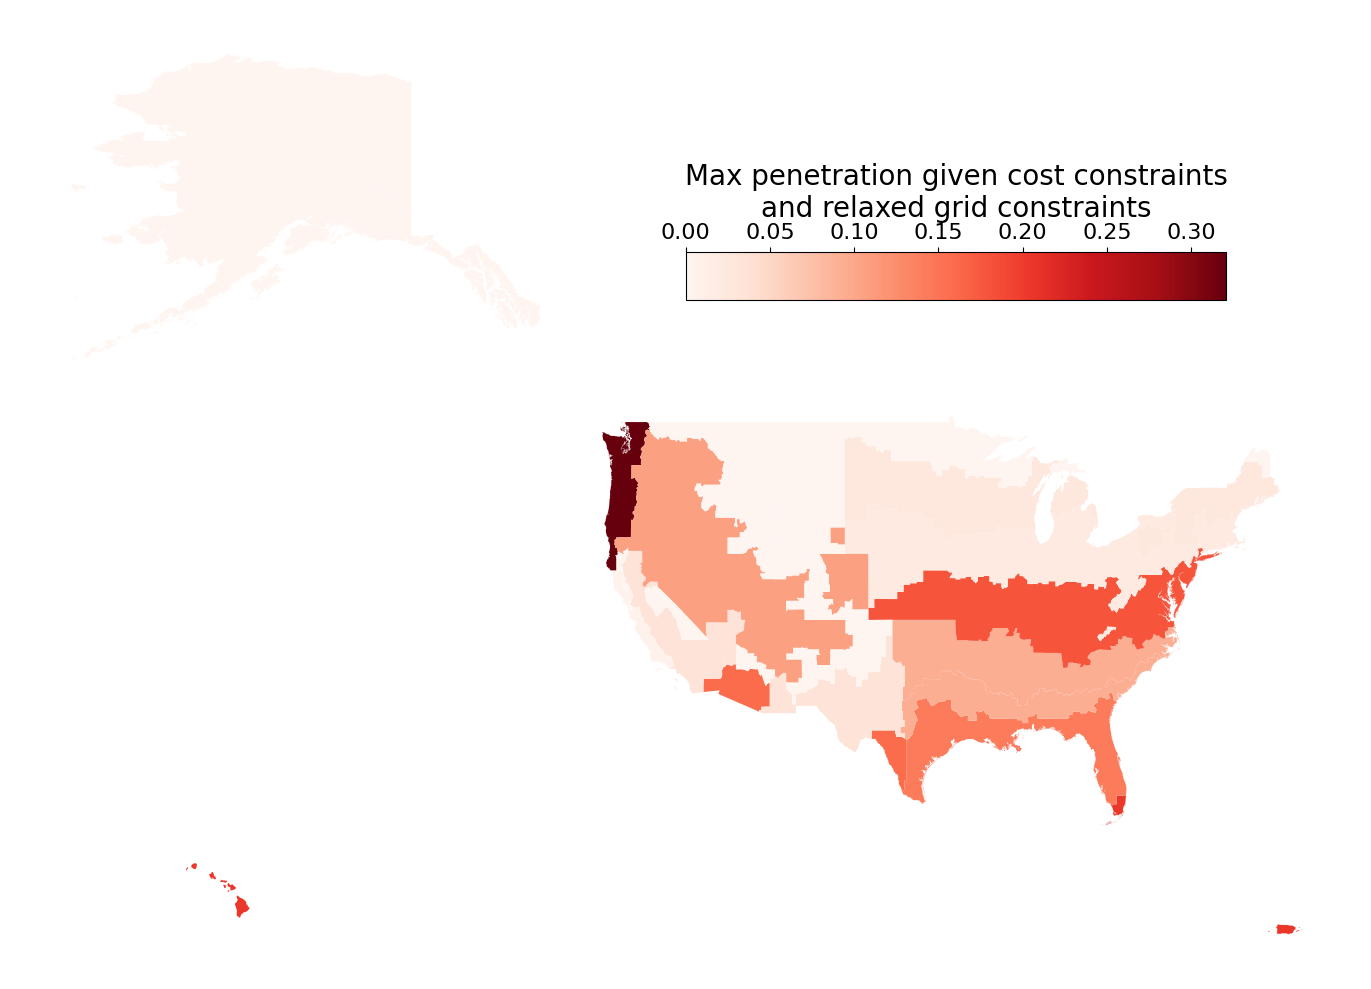

In [76]:
relaxed_BOTH_based_penetration_dict = {'1A': 0.20547789087668558,
 '2A': 0.14303372498139263,
 '2B': 0.159090909,
 '3A': 0.09380455166437023,
 '3B': 0.032894737,
 '3C': 0.0060245419735835744,
 '4A': 0.17871932179903344,
 '4B': 0.0,
 '4C': 0.32092355348696494,
 '5A': 0.02074030039619872,
 '5B': 0.10689851735690599,
 '6A': 0.025937834414140146,
 '6B': 0.0,
 '7': 0.0,
 '7A': 0.0,
 '7AK': 0.0,
 '8': 0.0,
 '8AK': 0.0,
 '7B': 0}

gdf["Relaxed BOTH Penetration"] = np.array(list(relaxed_BOTH_based_penetration_dict[climate_zone] for climate_zone in gdf["Climate_Zones"]), dtype=float)

# Plot the GeoDataFrame
fig, ax = plt.subplots(1, 1, figsize=(16, 10))
cax = ax.inset_axes([0.5, 0.7, 0.4, 0.05])

gdf.plot(
    column='Relaxed BOTH Penetration',
    cmap="Reds",
    ax=ax,
    legend=True,
    markersize=100, # Adjust for point data
    # edgecolor='black',
    linewidth=0.5,
    
    cax= cax,
    # fontsize= 12, # Font size for the tick labels (numbers) on the colorbar
    # title_fontsize= 14, # Font size for the colorbar title
    
    legend_kwds={
        # 'label': , # Title for the colorbar
        'shrink': 0.3, # Make the colorbar 70% of its default height
        'location': 'top',
        # 'orientation': 'horizontal',
        # 'ticklocation': 'top',
        # 'pad': 0.02, # Padding between the plot area and the colorbar
        # 'frameon': True, # Display a frame around the colorbar
        # 'edgecolor': 'black', # Color of the frame edge
        # 'fancybox': True, # Apply rounded corners to the frame
        # 'shadow': True # Add a shadow to the frame
    }
)

cax.tick_params(axis='x', labelsize=16)
cax.set_xlabel("Max penetration given cost constraints\nand relaxed grid constraints", fontsize=20)

# # Create and add the custom legend
# legend_handles = []
# for value in unique_sorted_values:
#     color = color_map_for_legend[value]
#     label = format_value_label(value)
#     legend_handles.append(Patch(facecolor=color, edgecolor='black', label=label))

# ax.legend(
#     # handles=legend_handles,
#     title="Portion of residences that can feasibly adopt",
#     loc='upper left',
#     bbox_to_anchor=(1.1, 0.5),
#     frameon=True,
#     edgecolor='black',
#     fancybox=True,
#     shadow=True,
#     fontsize=10,
#     title_fontsize=12
# )

ax.set_axis_off()
plt.tight_layout()
plt.show()

fig.savefig("Ch4_simplified_heat_map_of_relaxed_BOTH_penetration_US_regions_with_legend.svg")

## Relaxed BOTH-Based
### Market Size

/tmp/ipykernel_752/1828677543.py:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('Blues', num_unique_values)


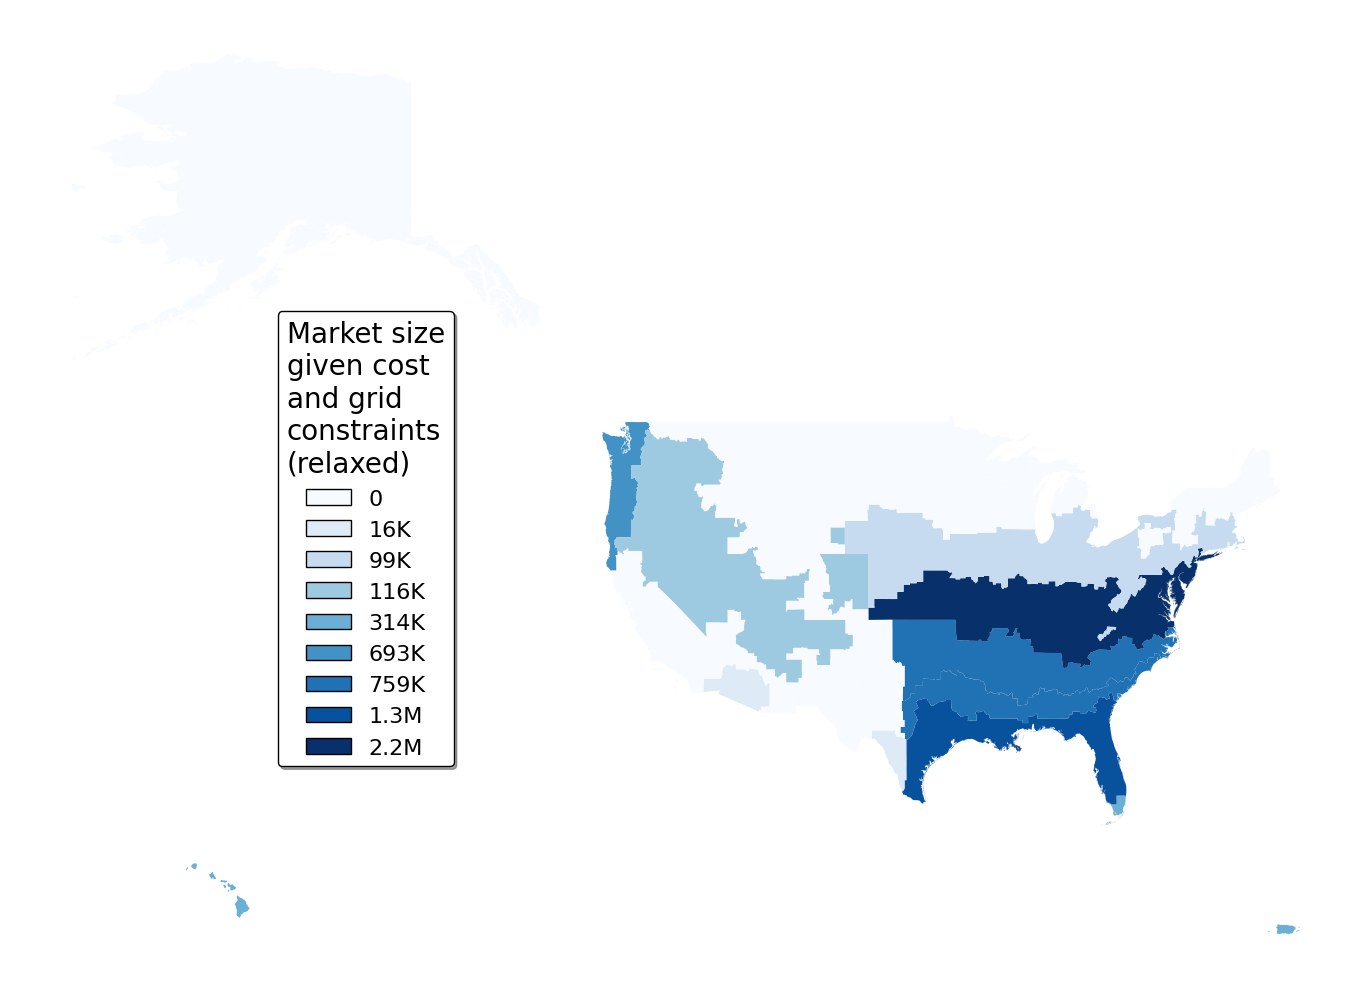

In [77]:
relaxed_BOTH_based_market_size_dict = {"1A":      313500,
"2A":     1336500,
"2B":       16500,
"3A":      759000,
"3B":           0,
"3C":           0,
"4A":     2244000,
"4B":           0,
"4C":      693000,
"5A":       99000,
"5B":      115500,
"6A":           0,
"6B":           0,
"7":           0,
"7A":           0,
"7AK":          0,
"7B":           0,
"8":           0,
"8AK":          0,}
gdf["relaxed BOTH-Based Market Size"] = np.array(relaxed_BOTH_based_market_size_dict[climate_zone] for climate_zone in gdf["Climate_Zones"])

# Your provided data values
raw_data_values = gdf["relaxed BOTH-Based Market Size"]

# Get unique and sorted values to define the categories and color mapping
unique_sorted_values = sorted(list(set(raw_data_values)))
num_unique_values = len(unique_sorted_values)

# Generate a custom colormap using "Reds"
colormap = cm.get_cmap('Blues', num_unique_values)
custom_colors_list = [colormap(i) for i in range(num_unique_values)]
custom_cmap = mcolors.ListedColormap(custom_colors_list)


# Convert the 'value_column' to a Categorical type with the custom order.
# This ensures that geopandas.plot assigns distinct colors based on your specific values.
value_category_type = pd.CategoricalDtype(categories=unique_sorted_values, ordered=True)
gdf['relaxed BOTH-Based Market Size value_column_cat'] = gdf['relaxed BOTH-Based Market Size'].astype(value_category_type)

# Function to format labels (to avoid scientific notation)
def format_value_label(num):
    """Formats a number into a human-readable string (e.g., 1.5M, 500K, 0)."""
    if num == 0:
        return "0"
    elif num >= 1_000_000:
        return f"{num / 1_000_000:.1f}M"
    elif num >= 1_000:
        return f"{num / 1_000:.0f}K"
    else:
        return f"{num:.0f}"

# Create formatted labels for the legend
formatted_labels = [format_value_label(val) for val in unique_sorted_values]

# Create a mapping from unique value to its assigned color for legend patches
color_map_for_legend = {
    unique_sorted_values[i]: custom_colors_list[i]
    for i in range(num_unique_values)
}

# Plot the GeoDataFrame
fig, ax = plt.subplots(1, 1, figsize=(16, 10))


cax = ax.inset_axes([0.19, 0.65, 0.4, 0.05])

gdf.plot(
    column='relaxed BOTH-Based Market Size value_column_cat',
    cmap=custom_cmap,
    ax=ax,
    legend=False,
    markersize=100, # Adjust for point data
    # edgecolor='black',
    linewidth=0.5
)

# Create and add the custom legend
legend_handles = []
for value in unique_sorted_values:
    color = color_map_for_legend[value]
    label = format_value_label(value)
    legend_handles.append(Patch(facecolor=color, edgecolor='black', label=label))


cax.legend(
    handles=legend_handles,
    title="Market size\ngiven cost\nand grid\nconstraints\n(relaxed)",
    loc='upper left',
    bbox_to_anchor=(0, 1),
    frameon=True,
    edgecolor='black',
    fancybox=True,
    shadow=True,
    fontsize=16,
    title_fontsize=20
)
cax.set_axis_off()

# ax.legend(
#     handles=legend_handles,
#     title="Number of residences feasibly supported",
#     loc='lower left',
#     bbox_to_anchor=(1.05, 0),
#     frameon=True,
#     edgecolor='black',
#     fancybox=True,
#     shadow=True,
#     fontsize=14,
#     title_fontsize=18
# )

ax.set_axis_off()
plt.tight_layout()
plt.show()

fig.savefig("Ch4_simplified_heat_map_of_relaxed_BOTH_based_market_size_US_regions_with_legend_Blues.svg")


# UNUSED PLOTS

## No-IRA Cost-Based
### Penetration

/tmp/ipykernel_791/499868665.py:43: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(


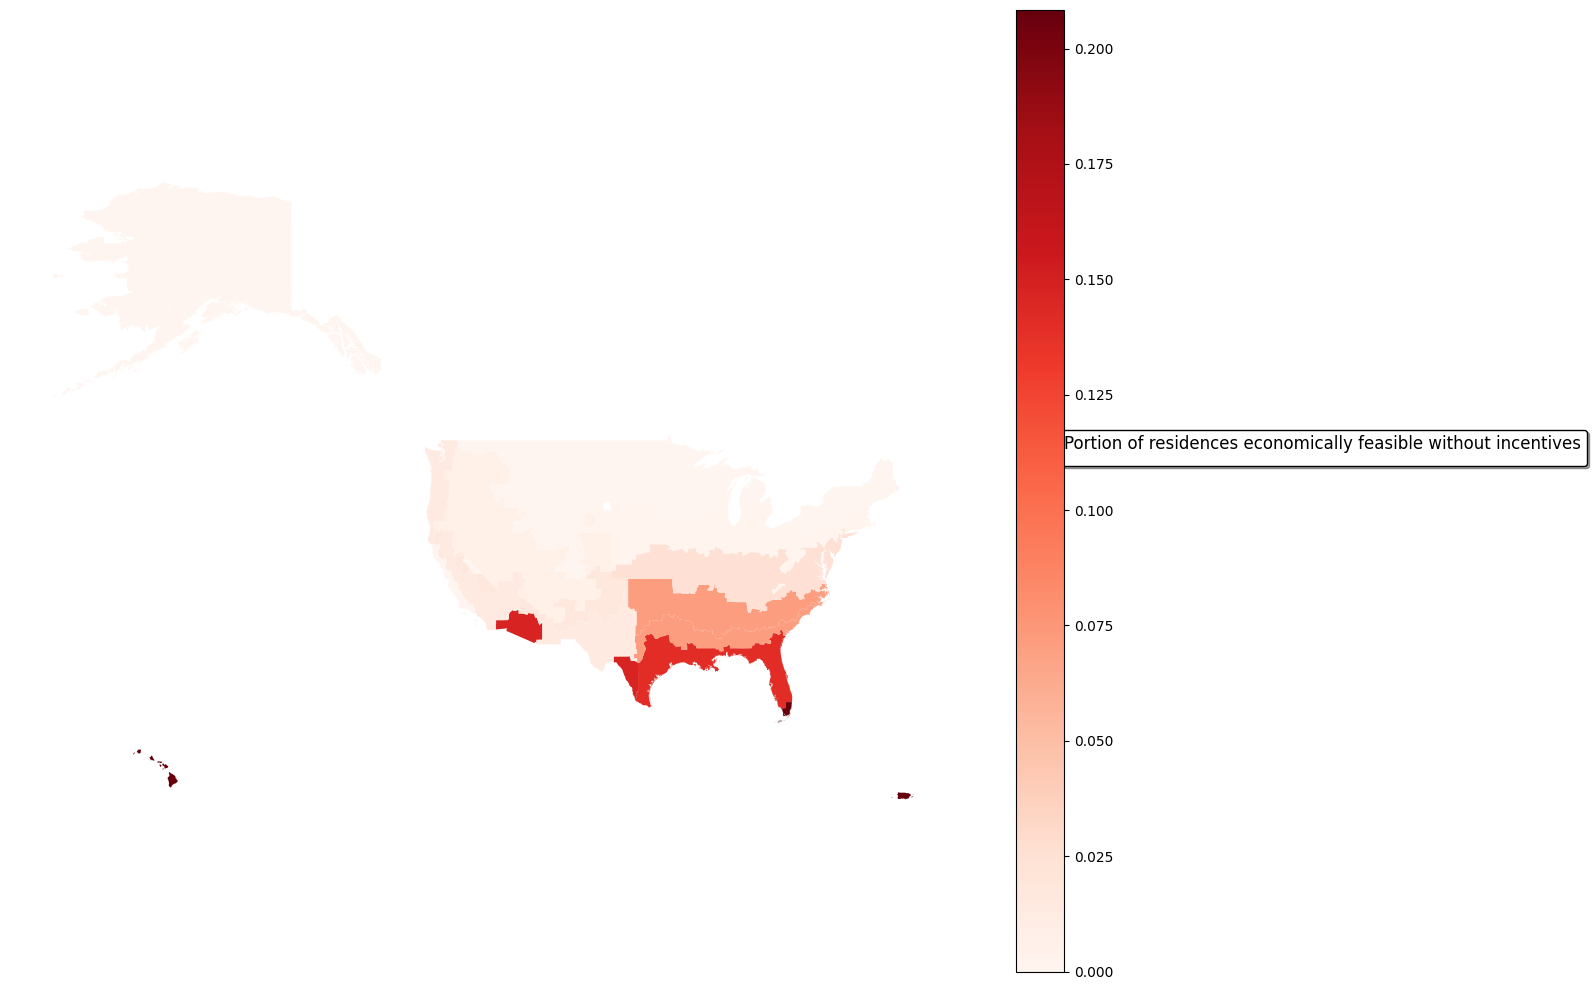

In [ ]:
no_IRA_cost_based_penetration_dict = {"1A":     0.208369,
"2A":     0.140040,
"2B":     0.147500,
"3A":     0.071570,
"3B":     0.014567,
"3C":     0.000000,
"4A":     0.025131,
"4B":     0.016642,
"4C":     0.013062,
"5A":     0.001689,
"5B":     0.006663,
"6A":     0.000000,
"6B":     0.000000,
"7":     0.000000,
"7A":     0.000000,
"7AK":    0.000000,
"7B":     0.000000,
"8":     0.000000,
"8AK":    0.000000}

gdf["No_IRA cost-based Penetration"] = np.array(list(no_IRA_cost_based_penetration_dict[climate_zone] for climate_zone in gdf["Climate_Zones"]), dtype=float)

# Plot the GeoDataFrame
fig, ax = plt.subplots(1, 1, figsize=(16, 10))

gdf.plot(
    column='No_IRA cost-based Penetration',
    cmap="Reds",
    ax=ax,
    legend=True,
    markersize=100, # Adjust for point data
    # edgecolor='black',
    linewidth=0.5
)

# # Create and add the custom legend
# legend_handles = []
# for value in unique_sorted_values:
#     color = color_map_for_legend[value]
#     label = format_value_label(value)
#     legend_handles.append(Patch(facecolor=color, edgecolor='black', label=label))

ax.legend(
    # handles=legend_handles,
    title="Portion of residences economically feasible without incentives",
    loc='upper left',
    bbox_to_anchor=(1.1, 0.6),
    frameon=True,
    edgecolor='black',
    fancybox=True,
    shadow=True,
    fontsize=10,
    title_fontsize=12
)

ax.set_axis_off()
plt.tight_layout()
plt.show()

fig.savefig("Ch4_heat_map_of_no_IRA_economic_penetration_US_regions_with_legend.svg")

## NO IRA Cost-Based
### Market Size

/tmp/ipykernel_791/3881682915.py:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('Blues', num_unique_values)


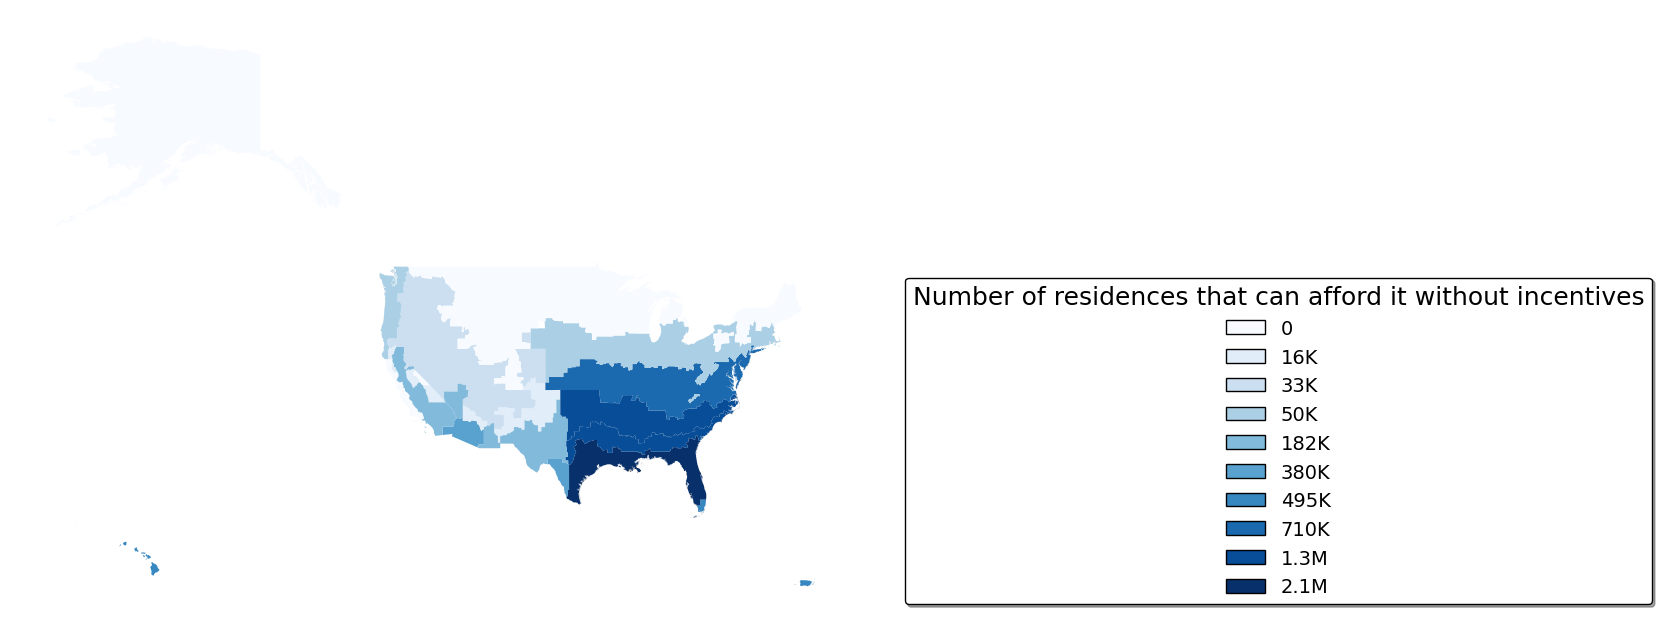

In [ ]:
no_IRA_economic_market_size_dict = {"1A":  495000,
"2A":  2145000,
"2B":  379500,
"3A":  1254000,
"3B":  181500,
"3C":  0,
"4A":  709500,
"4B":  16500,
"4C":  49500,
"5A":  49500,
"5B":  33000,
"6A":  0,
"6B":  0,
"7":  0,
"7A":  0,
"7B":  0,
"7AK": 0,
"8AK": 0,
"8": 0,
}
gdf["no_IRA economic Market Size"] = np.array(no_IRA_economic_market_size_dict[climate_zone] for climate_zone in gdf["Climate_Zones"])

# Your provided data values
raw_data_values = gdf["no_IRA economic Market Size"]

# Get unique and sorted values to define the categories and color mapping
unique_sorted_values = sorted(list(set(raw_data_values)))
num_unique_values = len(unique_sorted_values)

# Generate a custom colormap using "Reds"
colormap = cm.get_cmap('Blues', num_unique_values)
custom_colors_list = [colormap(i) for i in range(num_unique_values)]
custom_cmap = mcolors.ListedColormap(custom_colors_list)


# Convert the 'value_column' to a Categorical type with the custom order.
# This ensures that geopandas.plot assigns distinct colors based on your specific values.
value_category_type = pd.CategoricalDtype(categories=unique_sorted_values, ordered=True)
gdf['no_IRA economic Market Size value_column_cat'] = gdf['no_IRA economic Market Size'].astype(value_category_type)

# Function to format labels (to avoid scientific notation)
def format_value_label(num):
    """Formats a number into a human-readable string (e.g., 1.5M, 500K, 0)."""
    if num == 0:
        return "0"
    elif num >= 1_000_000:
        return f"{num / 1_000_000:.1f}M"
    elif num >= 1_000:
        return f"{num / 1_000:.0f}K"
    else:
        return f"{num:.0f}"

# Create formatted labels for the legend
formatted_labels = [format_value_label(val) for val in unique_sorted_values]

# Create a mapping from unique value to its assigned color for legend patches
color_map_for_legend = {
    unique_sorted_values[i]: custom_colors_list[i]
    for i in range(num_unique_values)
}

# Plot the GeoDataFrame
fig, ax = plt.subplots(1, 1, figsize=(16, 10))

gdf.plot(
    column='no_IRA economic Market Size value_column_cat',
    cmap=custom_cmap,
    ax=ax,
    legend=False,
    markersize=100, # Adjust for point data
    # edgecolor='black',
    linewidth=0.5
)

# Create and add the custom legend
legend_handles = []
for value in unique_sorted_values:
    color = color_map_for_legend[value]
    label = format_value_label(value)
    legend_handles.append(Patch(facecolor=color, edgecolor='black', label=label))

ax.legend(
    handles=legend_handles,
    title="Number of residences that can afford it without incentives",
    loc='lower left',
    bbox_to_anchor=(1.05, 0),
    frameon=True,
    edgecolor='black',
    fancybox=True,
    shadow=True,
    fontsize=14,
    title_fontsize=18
)

ax.set_axis_off()
plt.tight_layout()
plt.show()

fig.savefig("Ch4_heat_map_of_no_IRA_economic_market_size_US_regions_with_legend_Blues.svg")


In [ ]:
gdf

OBJECTID BA_Climate_Zone Climate_Zones   Shape__Area  Shape__Length  \
8          9       Hot-Humid            1A  4.259715e+10   8.850751e+06   
5          6         Hot-Dry            2B  1.411760e+11   2.952742e+06   
0          1            Cold            4B  1.753390e+10   6.353196e+05   
12        13          Marine            3C  8.927405e+10   5.117520e+06   
14        15       Mixed-Dry            4B  4.509881e+11   1.026020e+07   
7          8         Hot-Dry            3B  3.251860e+11   7.950496e+06   
2          3            Cold            5B  2.135266e+12   2.234062e+07   
4          5            Cold            6B  1.700021e+12   2.049475e+07   
13        14          Marine            4C  3.029728e+11   1.448493e+07   
17        18       Subarctic             8  6.121796e+12   4.896460e+07   
10        11       Hot-Humid            2B  7.506686e+10   1.703675e+06   
9         10       Hot-Humid            2A  6.007562e+11   5.552701e+07   
11        12       Hot-Humid            3A  4.535203e+11   2.216948e+07   
6          7         Hot-Dry            3B  5.951825e+11   1.005722e+07   
15        16     Mixed-Humid            3A  9.404345e+11   2.523458e+07   
16        17     Mixed-Humid            4A  1.369589e+12   5.709222e+07   
1          2            Cold            5A  1.701712e+12   3.502174e+07   
3          4            Cold            6A  1.506340e+12   3.624551e+07   
18        19       Very Cold             7  2.634320e+12   1.089380e+08   

                                             geometry Market Size  \
8   MULTIPOLYGON (((-81.28999 25.80371, -81.27833 ...      495000   
5   MULTIPOLYGON (((-111.38948 33.77682, -111.3893...      379500   
0   POLYGON ((-107.72226 35.34834, -107.71305 35.3...      165000   
12  MULTIPOLYGON (((-121.9319 37.7254, -121.93113 ...       16500   
14  MULTIPOLYGON (((-103.39991 38.26544, -103.3999...      165000   
7   MULTIPOLYGON (((-121.93335 37.72508, -121.9336...      214500   
2   MULTIPOLYGON (((-121.63999 46.38837, -121.6366...     1881000   
4   MULTIPOLYGON (((-115.75426 43.64538, -115.7540...      544500   
13  MULTIPOLYGON (((-124.47923 42.95568, -124.4788...     1204500   
17  MULTIPOLYGON (((-162.06801 60.60162, -162.0674...           0   
10  POLYGON ((-99.75417 30.29063, -99.75422 30.288...      379500   
9   MULTIPOLYGON (((-97.88659 31.00167, -97.88992 ...     2145000   
11  MULTIPOLYGON (((-97.88645 31.00144, -97.88645 ...     1650000   
6   MULTIPOLYGON (((-109.67646 33.56865, -109.6766...      214500   
15  MULTIPOLYGON (((-90.45001 32.57326, -90.45059 ...     1650000   
16  MULTIPOLYGON (((-94.2102 39.47716, -94.21019 3...     5049000   
1   MULTIPOLYGON (((-102.11293 43.71012, -102.1126...    15114000   
3   MULTIPOLYGON (((-102.11382 43.71081, -102.1144...     5230500   
18  MULTIPOLYGON (((-158.10073 57.36003, -158.0923...      808500   

    Economic Penetration BOTH Market Size BOTH Market Size value_column_cat  \
8               0.208369           280500                            280500   
5               0.147500            16500                             16500   
0               0.164016                0                                 0   
12              0.005350                0                                 0   
14              0.164016                0                                 0   
7               0.017207                0                                 0   
2               0.375306                0                                 0   
4               0.441761                0                                 0   
13              0.317496            16500                             16500   
17              0.000000                0                                 0   
10              0.147500            16500                             16500   
9               0.140040           742500                            742500   
11              0.094052                0                                 0   
6               

In [9]:
create_table_per_climate_zone_and_level_of_urbanization(region_name="7AK_suburban", num_residences=8)

7AK
In metro area, principal city


Don't have ducting  Tier 1: Feasible  \
7AK suburban                 NaN               NaN   
    urban                    5.0               0.0   

              Tier 2: Feasible vs. Alternative  \
7AK suburban                               NaN   
    urban                                  0.0   

              Tier 3: Subsidy-Dependent Feasibility  Tier 4: Averse  Total  
7AK suburban                                    NaN             NaN    0.0  
    urban                                       0.0             3.0    8.0

In [10]:
create_table_per_climate_zone_and_level_of_urbanization(region_name="7B_urban", num_residences=8)

7B
In metro area, not/partially in principal city


Don't have ducting  Tier 1: Feasible  \
7B urban                    NaN               NaN   
   suburban                 1.0               0.0   

             Tier 2: Feasible vs. Alternative  \
7B urban                                  NaN   
   suburban                               0.0   

             Tier 3: Subsidy-Dependent Feasibility  Tier 4: Averse  Total  
7B urban                                       NaN             NaN    0.0  
   suburban                                    5.0             2.0    8.0

In [5]:
def create_dicts_of_peak_electricity_consumption_of_home():
    # print(f"Filling a table with {'is_successful_upgrade' if table_filling_fn is None else table_filling_fn.__name__}")
    # table_to_fill = pd.DataFrame(columns=climate_zones, index=urbanization_level_dict.keys())

    # Map from climate zone and level of urbanization to a list of differences.
    differences_dict = defaultdict(lambda: [])
    baseline_dict = defaultdict(lambda: [])
    upgrades_dict = defaultdict(lambda: [])

    file_name = os.path.join(os.getcwd(), "output_results", "national_ASHP_8000_all_unit_residence", "alpha_beta_NPV_tare_output.csv")
    output = pd.read_csv(file_name)
    buildings = output["bldg_id"]

    resstock_dir = os.path.join("/ocean", "projects", "eng220005p", "agautam3", "resstock-3.4.0") # For PSC runs
    region = "national_ASHP"
    NUM_RESIDENCES = 8000
    unit_type = "all"
    POWER_FACTOR = 0.9

    buildstock_path = os.path.join(resstock_dir, "resources", "national", f"{'all_national' if region == 'national_ASHP' else region}_{NUM_RESIDENCES}_all_unit_buildstock.csv")
    # print(buildstock_path)
    buildstock_df = pd.read_csv(buildstock_path)
            
    for bldg_id in buildings:
        building_resstock_entry = buildstock_df[buildstock_df["Building"] == bldg_id].iloc[0]
        # print(building_resstock_entry)
        climate_zone = building_resstock_entry["ASHRAE IECC Climate Zone 2004"]
        level_of_urbanization = level_of_urbanization_dict[building_resstock_entry["PUMA Metro Status"]]
        baseline_load_file_path = os.path.join(resstock_dir, f"{region}{'' if '_' in region else '_upgrades'}_{NUM_RESIDENCES}_{unit_type}_unit_residence", f"run{bldg_id}", "run", "results_timeseries.csv")
        upgrade_load_file_path = os.path.join(resstock_dir, f"{region}{'' if '_' in region else '_upgrades'}_{NUM_RESIDENCES}_{unit_type}_unit_residence_ASHP", f"run{bldg_id}", "run", "results_timeseries.csv")
        if not os.path.exists(baseline_load_file_path):
            print(f"Couldn't find baseline data for building {bldg_id}, not adding it")
            continue
        baseline_power_timeseries_df = pd.read_csv(baseline_load_file_path, low_memory=True, usecols=lambda x: x == "Fuel Use: Electricity: Total")
        baseline_power_timeseries_df = baseline_power_timeseries_df.iloc[1:].copy() # Remove the title from the series
        baseline_power_timeseries_df[bldg_id] = baseline_power_timeseries_df["Fuel Use: Electricity: Total"].astype(float).apply(lambda power: power / POWER_FACTOR) #   / 3 / 0.9
        baseline_power_timeseries_df = baseline_power_timeseries_df[[bldg_id]]
        baseline_dict[(climate_zone, level_of_urbanization)].append(baseline_power_timeseries_df)
        if not os.path.exists(upgrade_load_file_path):
            print(f"Couldn't find upgrade data for building {bldg_id}, so adding a zero sequence for it")
            power_timeseries_df = pd.DataFrame(index=baseline_power_timeseries_df, columns=baseline_power_timeseries_df.columns)
            power_timeseries_df.iloc[:,0] = 0
            upgrades_dict[(climate_zone, level_of_urbanization)].append(baseline_power_timeseries_df)
        else:
            upgrade_power_timeseries_df = pd.read_csv(upgrade_load_file_path, low_memory=True, usecols=lambda x: x == "Fuel Use: Electricity: Total")
            upgrade_power_timeseries_df = upgrade_power_timeseries_df.iloc[1:].copy() # Remove the title from the series
            upgrade_power_timeseries_df[bldg_id] = upgrade_power_timeseries_df["Fuel Use: Electricity: Total"].astype(float).apply(lambda power: power / POWER_FACTOR) #   / 3 / 0.9
            upgrade_power_timeseries_df = upgrade_power_timeseries_df[[bldg_id]]
            upgrades_dict[(climate_zone, level_of_urbanization)].append(upgrade_power_timeseries_df)

            power_timeseries_df = upgrade_power_timeseries_df - baseline_power_timeseries_df

        # table_to_fill.loc[climate_zone,level_of_urbanization] = sum(output[0].loc[:,"iraRef_mp8_heating_adoption"] != "Tier 4: Averse")
        differences_dict[(climate_zone, level_of_urbanization)].append(power_timeseries_df)
            
    return baseline_dict, upgrades_dict, differences_dict



# def table_of_success_failure():
#     return fill_a_table(lambda x: ))

In [1]:
# baseline_dict, upgrades_dict, differences_dict = create_dicts_of_peak_electricity_consumption_of_home()
pass

In [2]:
cwd_filepath = os.getcwd()
TARE_dir = cwd_filepath
# TARE_dir = os.path.join(os.path.dirname(cwd_filepath), "Trane_Technologies", "cmu-tare-model")
# TARE_dir = os.path.join(os.path.dirname(cwd_filepath), "cmu-tare-model") # For PSC runs

# resstock_dir = os.path.join("/mnt", "wsl", "instances", "Ubuntu_24_04", "home", "arnavgautam", "resstock-3.4.0")
resstock_dir = os.path.join("/ocean", "projects", "eng220005p", "agautam3", "resstock-3.4.0") # For PSC runs

visuals_dir = os.path.join("/ocean","projects","eng220005p","agautam3","TPIA-MP", "visuals")

save_not_show = False

csv_format_phased_power_dict = {}


In [ ]:

for penetration_level_label in ["COST-BASED", "1pt0"]:

    region = "national_ASHP"
    NUM_RESIDENCES = 8000
    unit_type = "all"
    prefix="alpha_beta"
    tare_results_for_unit_type_filepath = os.path.join(TARE_dir, "output_results",f"{region}_{NUM_RESIDENCES}_{unit_type}_unit_residence", f"{prefix}_NPV_tare_output.csv")
    tare_results_for_unit_type = pd.read_csv(tare_results_for_unit_type_filepath)

    new_df = pd.DataFrame({"run_num_for_load_data": tare_results_for_unit_type["bldg_id"], "is_adopting": False, "NPV": tare_results_for_unit_type["iraRef_mp8_heating_total_npv_moreWTP"], "iraRef_mp8_heating_adoption": tare_results_for_unit_type["iraRef_mp8_heating_adoption"]})
    new_df = new_df.set_index("run_num_for_load_data")
    new_df.sort_values(by="NPV", axis=0, ascending=False, inplace=True)
    
    for idx, row in new_df.iterrows():
        bldg_id = row.name
        # print(bldg_id)

        if penetration_level_label == "1pt0":
            # In this case, we set the flag "is_adopting" for every building with an upgrade scenario
            new_df.loc[bldg_id,"is_adopting"] = True
            continue
        
        iraRef_mp8_heating_adoption = row["iraRef_mp8_heating_adoption"]
        if iraRef_mp8_heating_adoption in ['Tier 1: Feasible', 'Tier 2: Feasible vs. Alternative', 'Tier 3: Subsidy-Dependent Feasibility', 'Feasible per MMPV']:
            new_df.loc[bldg_id,"is_adopting"] = True

    buildstock_path = os.path.join(resstock_dir, "resources", "national", f"{'all_national' if region == 'national_ASHP' else region}_{NUM_RESIDENCES}_all_unit_buildstock.csv")
    # print(buildstock_path)
    buildstock_df = pd.read_csv(buildstock_path)
    resstock_building_list = buildstock_df['Building']

    excluded_buildings = set(resstock_building_list).difference(set(tare_results_for_unit_type["bldg_id"]))

    # num_nonzero_buildings = math.ceil(new_df.shape[0] * penetration_level)

    # # Exclude additional buildings based on the NPV, to force the penetration level
    # excluded_buildings.update(new_df.index[num_nonzero_buildings:])

    electricity_cols = ["Fuel Use: Electricity: Total"]
    POWER_FACTOR = 0.9

    # Make it into the format that TPIA-MP expects
    csv_format_phased_power = None
    for building_num, (idx, row) in enumerate(new_df.iterrows()):
        if np.isnan(row.name):
            continue
        if not row['is_adopting']:
            continue
        
        bldg_id = int(row.name)
        baseline_load_file_path = os.path.join(resstock_dir, f"{region}{'' if '_' in region else '_upgrades'}_{NUM_RESIDENCES}_{unit_type}_unit_residence", f"run{bldg_id}", "run", "results_timeseries.csv")
        upgrade_load_file_path = os.path.join(resstock_dir, f"{region}{'' if '_' in region else '_upgrades'}_{NUM_RESIDENCES}_{unit_type}_unit_residence_ASHP", f"run{bldg_id}", "run", "results_timeseries.csv")
        if not os.path.exists(baseline_load_file_path):
            print(f"Couldn't find baseline data for building {bldg_id}, not adding it")
            continue
        baseline_power_timeseries_df = pd.read_csv(baseline_load_file_path, low_memory=True, usecols=lambda x: x in electricity_cols)
        baseline_power_timeseries_df = baseline_power_timeseries_df.iloc[1:].copy() # Remove the title from the series
        baseline_power_timeseries_df[str(int(idx))] = baseline_power_timeseries_df["Fuel Use: Electricity: Total"].astype(float).apply(lambda power: power / POWER_FACTOR) #   / 3 / 0.9
        baseline_power_timeseries_df = baseline_power_timeseries_df[[str(int(idx))]]
        if not os.path.exists(upgrade_load_file_path):
            print(f"Couldn't find upgrade data for building {bldg_id}, so adding a zero sequence for it")
            power_timeseries_df = pd.DataFrame(index=baseline_power_timeseries_df, columns=baseline_power_timeseries_df.columns)
            power_timeseries_df.iloc[:,0] = 0
        else:
            upgrade_power_timeseries_df = pd.read_csv(upgrade_load_file_path, low_memory=True, usecols=lambda x: x in electricity_cols)
            upgrade_power_timeseries_df = upgrade_power_timeseries_df.iloc[1:].copy() # Remove the title from the series
            upgrade_power_timeseries_df[str(int(idx))] = upgrade_power_timeseries_df["Fuel Use: Electricity: Total"].astype(float).apply(lambda power: power / POWER_FACTOR) #   / 3 / 0.9
            upgrade_power_timeseries_df = upgrade_power_timeseries_df[[str(int(idx))]]
            power_timeseries_df = upgrade_power_timeseries_df - baseline_power_timeseries_df
        if csv_format_phased_power is None:
            csv_format_phased_power = power_timeseries_df
        else:
            csv_format_phased_power = csv_format_phased_power.join(power_timeseries_df, how="left")

    # # Add in zeros for the excluded buildings
    # for excluded_building in excluded_buildings:
    #     power_timeseries_df = pd.DataFrame(columns=[str(int(excluded_building))], index=range(1,8761))
    #     power_timeseries_df.iloc[:,0] = 0
    #     if csv_format_phased_power is None:
    #         csv_format_phased_power = power_timeseries_df
    #     else:
    #         csv_format_phased_power = csv_format_phased_power.join(power_timeseries_df, how="left")

    # summed_csv_format_phased_power = csv_format_phased_power.sum()

    fig = plt.figure(figsize=(12,4))
    plt.plot(csv_format_phased_power.sum(axis=1), label='Change from Baseline')
    plt.title(f"Change in Total Hourly Usage Over the Year for the 8000 residence sample")
    plt.xlabel("Hour")
    plt.ylabel("kWh")
    plt.legend()
    plt.tight_layout()
    if save_not_show:
        line_plot_path = os.path.join(visuals_dir, "line_plot", penetration_level_label, f"all_national_8000.svg")
        os.makedirs(os.path.dirname(line_plot_path), exist_ok=True)
        fig.savefig(line_plot_path)
        plt.close()
    else:
        plt.show()

    csv_format_phased_power_dict[penetration_level_label] = csv_format_phased_power



In [6]:
def get_cost_based_adoption_levels(climate_zone,level_of_urbanization, penetration_level_label):
    # Look into the TARE data to get the number of homes of this type, and figure out the adoption level (out of the applicable homes)

    # Read in selection data from TARE output
    tare_results_for_unit_type_filepath = os.path.join(TARE_dir, "output_results",f"{region}_{NUM_RESIDENCES}_{unit_type}_unit_residence", f"{prefix}_NPV_tare_output.csv")
    tare_results_for_unit_type = pd.read_csv(tare_results_for_unit_type_filepath)
    # tare_results_for_unit_type["Supplemental"] = False

    buildstock_path = os.path.join(resstock_dir, "resources", "national", f"{'all_national' if region == 'national_ASHP' else region}_{NUM_RESIDENCES}_all_unit_buildstock.csv")
    # print(buildstock_path)
    buildstock_df = pd.read_csv(buildstock_path)

    resstock_building_list = buildstock_df['Building']

    print(f"We begin with {tare_results_for_unit_type.shape} TARE results, out of a total of {resstock_building_list.shape} buildings")
    if climate_zone is not None:
        resstock_building_list = buildstock_df[buildstock_df['ASHRAE IECC Climate Zone 2004'] == climate_zone]['Building']
        tare_results_for_unit_type= tare_results_for_unit_type[tare_results_for_unit_type['bldg_id'].isin(resstock_building_list)]
    print(f"Filtering by climate zone leaves us {tare_results_for_unit_type.shape}")

    if level_of_urbanization is not None:
        resstock_building_list = buildstock_df[(buildstock_df['PUMA Metro Status'] == urbanization_level_dict[level_of_urbanization]) & (buildstock_df["Building"].isin(resstock_building_list))]['Building']
        tare_results_for_unit_type= tare_results_for_unit_type[tare_results_for_unit_type['bldg_id'].isin(buildstock_df[buildstock_df['PUMA Metro Status'] == urbanization_level_dict[level_of_urbanization]]['Building'])]
    print(f"Filtering by urbanization leaves us {tare_results_for_unit_type.shape}")

    excluded_buildings = set(resstock_building_list).difference(set(tare_results_for_unit_type["bldg_id"]))
    print(f"There were also {len(excluded_buildings)} buildings excluded from TARE")

    if tare_results_for_unit_type.shape[0] == 0:
        raise Exception(f"Filtering left us with zero residence load profiles to use for populating the network for {climate_zone} {level_of_urbanization}")

    new_df = pd.DataFrame({"run_num_for_load_data": tare_results_for_unit_type["bldg_id"], "is_adopting": False, "NPV": tare_results_for_unit_type["iraRef_mp8_heating_total_npv_moreWTP"]})
    new_df = new_df.set_index("run_num_for_load_data")

    
    for _, row in tare_results_for_unit_type.iterrows():
        bldg_id = row["bldg_id"]
        if penetration_level_label == "1pt0":
            # In this case, we set the flag "is_adopting" for every building with an upgrade scenario
            new_df.loc[bldg_id,"is_adopting"] = True
            continue
        iraRef_mp8_heating_adoption = row["iraRef_mp8_heating_adoption"]
        if iraRef_mp8_heating_adoption in ['Tier 1: Feasible', 'Tier 2: Feasible vs. Alternative', 'Tier 3: Subsidy-Dependent Feasibility', 'Feasible per MMPV']:
            new_df.loc[bldg_id,"is_adopting"] = True
    
    return new_df, excluded_buildings


In [3]:
cwd_filepath = os.getcwd()
TARE_dir = cwd_filepath
# TARE_dir = os.path.join(os.path.dirname(cwd_filepath), "Trane_Technologies", "cmu-tare-model")
# TARE_dir = os.path.join(os.path.dirname(cwd_filepath), "cmu-tare-model") # For PSC runs

# resstock_dir = os.path.join("/mnt", "wsl", "instances", "Ubuntu_24_04", "home", "arnavgautam", "resstock-3.4.0")
resstock_dir = os.path.join("/ocean", "projects", "eng220005p", "agautam3", "resstock-3.4.0") # For PSC runs

visuals_dir = os.path.join("/ocean","projects","eng220005p","agautam3","TPIA-MP", "visuals")

urbanization_level_dict = {
    "urban":"In metro area, principal city",
    "suburban":"In metro area, not/partially in principal city",
    "rural":"Not/partially in metro area",
}

climate_zones = ["1A","2A","2B","3A","3B","3C","4A","4B","4C","5A","5B","6A","6B","7A","7B"] # 

combinations_array = product(["COST_BASED"], climate_zones, urbanization_level_dict.keys()) # , "1pt0"

region = "national_ASHP"
NUM_RESIDENCES = 8000
unit_type = "all"
prefix="alpha_beta"


/tmp/ipykernel_2571288/3308226204.py:11: DtypeWarning: Columns (76,77,78,132) have mixed types. Specify dtype option on import or set low_memory=False.
  buildstock_df = pd.read_csv(buildstock_path)


We begin with (6709, 429) TARE results, out of a total of (8000,) buildings
Filtering by climate zone leaves us (410, 429)
Filtering by urbanization leaves us (17, 429)
There were also 11 buildings excluded from TARE


/tmp/ipykernel_2571288/245860821.py:34: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  upgrade_power_timeseries_df = pd.read_csv(upgrade_load_file_path, low_memory=True, usecols=lambda x: x in electricity_cols)
/tmp/ipykernel_2571288/245860821.py:25: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  baseline_power_timeseries_df = pd.read_csv(baseline_load_file_path, low_memory=True, usecols=lambda x: x in electricity_cols)
/tmp/ipykernel_2571288/245860821.py:34: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  upgrade_power_timeseries_df = pd.read_csv(upgrade_load_file_path, low_memory=True, usecols=lambda x: x in electricity_cols)
/tmp/ipykernel_2571288/245860821.py:25: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  baseline_power_timeseries_df = pd.read_csv(baseline_load_f

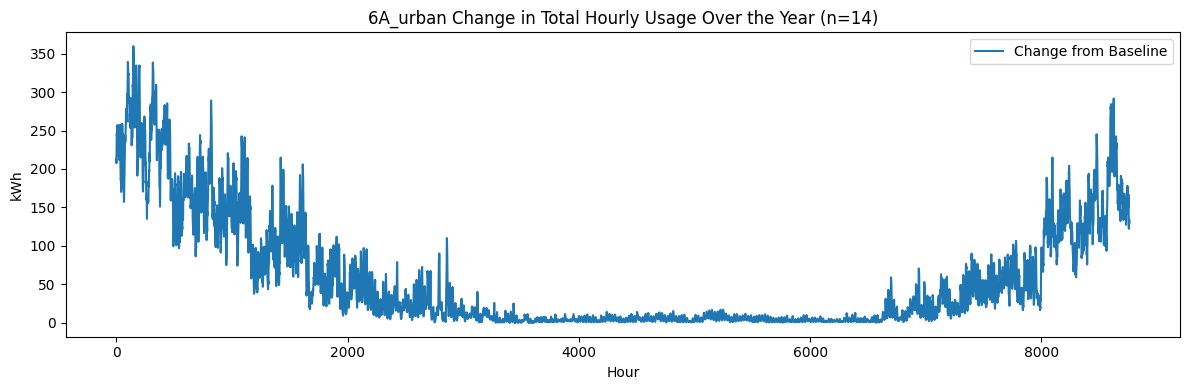

In [4]:
combinations_array = [("COST_BASED", "6A", "urban")]
for penetration_level_label, climate_zone, level_of_urbanization in combinations_array:
    try:
        new_df, excluded_buildings = get_cost_based_adoption_levels(climate_zone,level_of_urbanization, penetration_level_label)
    except:
        continue

    electricity_cols = ["Fuel Use: Electricity: Total"]
    POWER_FACTOR = 0.9

    # Make it into the format that TPIA-MP expects
    csv_format_phased_power = None
    for building_num, (idx, row) in enumerate(new_df.iterrows()):
        if np.isnan(row.name):
            continue
        if not row['is_adopting']:
            continue
        
        bldg_id = int(row.name)
        baseline_load_file_path = os.path.join(resstock_dir, f"{region}{'' if '_' in region else '_upgrades'}_{NUM_RESIDENCES}_{unit_type}_unit_residence", f"run{bldg_id}", "run", "results_timeseries.csv")
        upgrade_load_file_path = os.path.join(resstock_dir, f"{region}{'' if '_' in region else '_upgrades'}_{NUM_RESIDENCES}_{unit_type}_unit_residence_ASHP", f"run{bldg_id}", "run", "results_timeseries.csv")
        if not os.path.exists(baseline_load_file_path):
            print(f"Couldn't find baseline data for building {bldg_id}, not adding it")
            continue
        baseline_power_timeseries_df = pd.read_csv(baseline_load_file_path, low_memory=True, usecols=lambda x: x in electricity_cols)
        baseline_power_timeseries_df = baseline_power_timeseries_df.iloc[1:].copy() # Remove the title from the series
        baseline_power_timeseries_df[str(int(idx))] = baseline_power_timeseries_df["Fuel Use: Electricity: Total"].astype(float).apply(lambda power: power / POWER_FACTOR) #   / 3 / 0.9
        baseline_power_timeseries_df = baseline_power_timeseries_df[[str(int(idx))]]
        if not os.path.exists(upgrade_load_file_path):
            print(f"Couldn't find upgrade data for building {bldg_id}, so adding a zero sequence for it")
            power_timeseries_df = pd.DataFrame(index=baseline_power_timeseries_df, columns=baseline_power_timeseries_df.columns)
            power_timeseries_df.iloc[:,0] = 0
        else:
            upgrade_power_timeseries_df = pd.read_csv(upgrade_load_file_path, low_memory=True, usecols=lambda x: x in electricity_cols)
            upgrade_power_timeseries_df = upgrade_power_timeseries_df.iloc[1:].copy() # Remove the title from the series
            upgrade_power_timeseries_df[str(int(idx))] = upgrade_power_timeseries_df["Fuel Use: Electricity: Total"].astype(float).apply(lambda power: power / POWER_FACTOR) #   / 3 / 0.9
            upgrade_power_timeseries_df = upgrade_power_timeseries_df[[str(int(idx))]]
            power_timeseries_df = upgrade_power_timeseries_df - baseline_power_timeseries_df
        if csv_format_phased_power is None:
            csv_format_phased_power = power_timeseries_df
        else:
            csv_format_phased_power = csv_format_phased_power.join(power_timeseries_df, how="left")
    
    if csv_format_phased_power is None:
        continue

    num_residences_in_climate_zone_level_of_urbanization = csv_format_phased_power.shape[1]
    if num_residences_in_climate_zone_level_of_urbanization == 0:
        continue
    fig = plt.figure(figsize=(12,4))
    plt.plot(csv_format_phased_power.sum(axis=1), label='Change from Baseline')
    plt.title(f"{climate_zone}_{level_of_urbanization} Change in Total Hourly Usage Over the Year (n={num_residences_in_climate_zone_level_of_urbanization})")
    plt.xlabel("Hour")
    plt.ylabel("kWh")
    plt.legend()
    plt.tight_layout()
    line_plot_path = os.path.join(visuals_dir, "line_plot", penetration_level_label, f"{climate_zone}_{level_of_urbanization}.svg")
    os.makedirs(os.path.dirname(line_plot_path), exist_ok=True)
    fig.savefig(line_plot_path)
    plt.show()
    

In [11]:
region = "national_ASHP"
NUM_RESIDENCES = 8000
unit_type = "all"
prefix="alpha_beta"
tare_results_for_unit_type_filepath = os.path.join(TARE_dir, "output_results",f"{region}_{NUM_RESIDENCES}_{unit_type}_unit_residence", f"{prefix}_NPV_tare_output.csv")
tare_results_for_unit_type = pd.read_csv(tare_results_for_unit_type_filepath)

new_df = pd.DataFrame({"run_num_for_load_data": tare_results_for_unit_type["bldg_id"], "is_adopting": False, "NPV": tare_results_for_unit_type["iraRef_mp8_heating_total_npv_moreWTP"], "iraRef_mp8_heating_adoption": tare_results_for_unit_type["iraRef_mp8_heating_adoption"]})
new_df = new_df.set_index("run_num_for_load_data")
new_df.sort_values(by="NPV", axis=0, ascending=False, inplace=True)

for idx, row in new_df.iterrows():
    bldg_id = row.name
    
    iraRef_mp8_heating_adoption = row["iraRef_mp8_heating_adoption"]
    if iraRef_mp8_heating_adoption in ['Tier 1: Feasible', 'Tier 2: Feasible vs. Alternative', 'Tier 3: Subsidy-Dependent Feasibility', 'Feasible per MMPV']:
        new_df.loc[bldg_id,"is_adopting"] = True



In [28]:
total_num_adopting = new_df[new_df["is_adopting"] == True].shape[0]
print(f"Out of the 8000 residences, and the {new_df.shape[0]} with heat pumps modeled, only {total_num_adopting} would choose to adopt")

Out of the 8000 residences, and the 6709 with heat pumps modeled, only 2121 would choose to adopt


In [27]:
cwd_filepath = os.getcwd()
TARE_dir = cwd_filepath
level_of_urbanization_dict = {
    "In metro area, principal city":"urban",
    "In metro area, not/partially in principal city":"suburban",
    "Not/partially in metro area":"rural",
}

region = "national_ASHP"
NUM_RESIDENCES = 8000
unit_type = "all"
prefix="alpha_beta"
tare_results_for_unit_type_filepath = os.path.join(TARE_dir, "output_results",f"{region}_{NUM_RESIDENCES}_{unit_type}_unit_residence", f"{prefix}_NPV_tare_output.csv")
tare_results_for_unit_type = pd.read_csv(tare_results_for_unit_type_filepath)

buildstock_path = os.path.join(resstock_dir, "resources", "national", f"{'all_national' if region == 'national_ASHP' else region}_{NUM_RESIDENCES}_all_unit_buildstock.csv")
# print(buildstock_path)
buildstock_df = pd.read_csv(buildstock_path)

new_df = pd.DataFrame({"run_num_for_load_data": tare_results_for_unit_type["bldg_id"], "is_adopting": False, "iraRef_mp8_heating_adoption": tare_results_for_unit_type["iraRef_mp8_heating_adoption"], "climate_zone": None, "level_of_urbanization": None})
new_df = new_df.set_index("run_num_for_load_data")

for idx, row in new_df.iterrows():
    bldg_id = row.name
    
    iraRef_mp8_heating_adoption = row["iraRef_mp8_heating_adoption"]
    if iraRef_mp8_heating_adoption in ['Tier 1: Feasible', 'Tier 2: Feasible vs. Alternative', 'Tier 3: Subsidy-Dependent Feasibility', 'Feasible per MMPV']:
        new_df.loc[bldg_id,"is_adopting"] = True
    
    new_df.loc[bldg_id,"climate_zone"] = buildstock_df[buildstock_df["Building"] == bldg_id]["ASHRAE IECC Climate Zone 2004"].iloc[0]
    new_df.loc[bldg_id,"level_of_urbanization"] = buildstock_df[buildstock_df["Building"] == bldg_id]["PUMA Metro Status"].apply(lambda x: level_of_urbanization_dict[x]).iloc[0]

combinations_array = product(climate_zones, urbanization_level_dict.keys())

market_size_estimates = dict() # pd.DataFrame()#index=pd.MultiIndex.from_tuples(combinations_array))# defaultdict(lambda: {defaultdict(lambda: 0)})

groupby_obj = new_df.groupby(["climate_zone", "level_of_urbanization"])
# print(groupby_obj)
for group_name, grouped_df in groupby_obj:
    # print(group_name)

    adopting_count = grouped_df[grouped_df["is_adopting"]==True].shape[0]
    # market_size_estimates[climate_zone][level_of_urbanization]["count"] = adopting_count
    market_size_estimates[group_name] = adopting_count * 16500

# market_size_estimates.dropna(inplace=True)

print(f"In total, we estimate that {sum(list(market_size_estimates.values()))} homes in the US would adopt heat pumps")


/tmp/ipykernel_2904971/3053441830.py:18: DtypeWarning: Columns (76,77,78,132) have mixed types. Specify dtype option on import or set low_memory=False.
  buildstock_df = pd.read_csv(buildstock_path)


('1A', 'rural')
('1A', 'suburban')
('1A', 'urban')
('2A', 'rural')
('2A', 'suburban')
('2A', 'urban')
('2B', 'rural')
('2B', 'suburban')
('2B', 'urban')
('3A', 'rural')
('3A', 'suburban')
('3A', 'urban')
('3B', 'rural')
('3B', 'suburban')
('3B', 'urban')
('3C', 'rural')
('3C', 'suburban')
('3C', 'urban')
('4A', 'rural')
('4A', 'suburban')
('4A', 'urban')
('4B', 'rural')
('4B', 'suburban')
('4B', 'urban')
('4C', 'rural')
('4C', 'suburban')
('4C', 'urban')
('5A', 'rural')
('5A', 'suburban')
('5A', 'urban')
('5B', 'rural')
('5B', 'suburban')
('5B', 'urban')
('6A', 'rural')
('6A', 'suburban')
('6A', 'urban')
('6B', 'rural')
('6B', 'suburban')
('7A', 'rural')
('7A', 'suburban')
('7AK', 'rural')
('7AK', 'urban')
('7B', 'rural')
In total, we estimate that 34996500 homes in the US would adopt heat pumps


In [34]:
market_data_series = pd.Series(market_size_estimates, index=pd.MultiIndex.from_tuples(market_size_estimates.keys()))

In [35]:
market_data_series.unstack()

rural    suburban     urban
1A     16500.0    429000.0   49500.0
2A    247500.0   1716000.0  181500.0
2B     33000.0    231000.0  115500.0
3A    561000.0    957000.0  132000.0
3B         0.0    132000.0   82500.0
3C         0.0     16500.0       0.0
4A   1006500.0   3481500.0  561000.0
4B    115500.0     49500.0       0.0
4C     33000.0    973500.0  198000.0
5A   3201000.0  11005500.0  907500.0
5B    313500.0   1369500.0  198000.0
6A   2689500.0   2310000.0  231000.0
6B    445500.0     99000.0       NaN
7A    709500.0     99000.0       NaN
7AK        0.0         NaN   33000.0
7B     66000.0         NaN       NaN

/tmp/ipykernel_2040881/3308226204.py:11: DtypeWarning: Columns (76,77,78,132) have mixed types. Specify dtype option on import or set low_memory=False.
  buildstock_df = pd.read_csv(buildstock_path)


We begin with (6709, 429) TARE results, out of a total of (8000,) buildings
Filtering by climate zone leaves us (150, 429)
Filtering by urbanization leaves us (124, 429)
There were also 22 buildings excluded from TARE


/tmp/ipykernel_2040881/1333341924.py:39: DtypeWarning: Columns (5,8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  baseline_power_timeseries_df = pd.read_csv(baseline_load_file_path, low_memory=True, usecols=lambda x: x in electricity_cols or x in desired_hvac_cols)
/tmp/ipykernel_2040881/1333341924.py:48: DtypeWarning: Columns (5,8,9,10,11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  upgrade_power_timeseries_df = pd.read_csv(upgrade_load_file_path, low_memory=True, usecols=lambda x: x in electricity_cols or x in desired_hvac_cols)


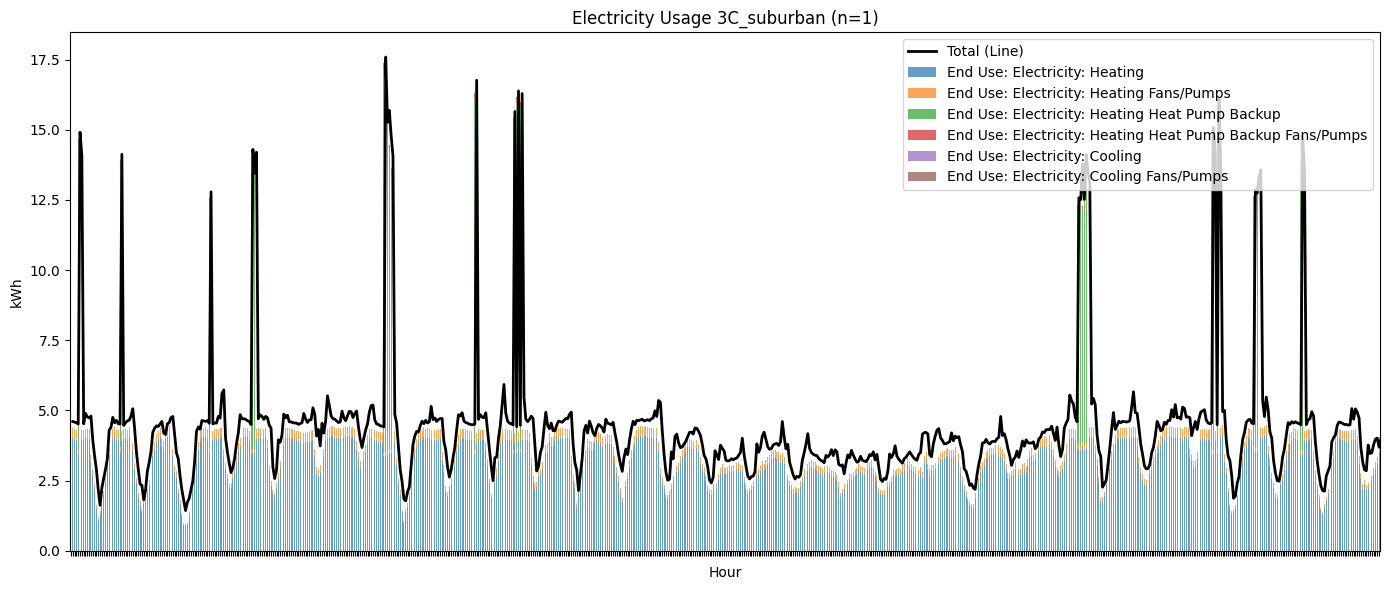

/tmp/ipykernel_2040881/3308226204.py:11: DtypeWarning: Columns (76,77,78,132) have mixed types. Specify dtype option on import or set low_memory=False.
  buildstock_df = pd.read_csv(buildstock_path)


We begin with (6709, 429) TARE results, out of a total of (8000,) buildings
Filtering by climate zone leaves us (1451, 429)
Filtering by urbanization leaves us (109, 429)
There were also 92 buildings excluded from TARE


/tmp/ipykernel_2040881/1333341924.py:39: DtypeWarning: Columns (5,8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  baseline_power_timeseries_df = pd.read_csv(baseline_load_file_path, low_memory=True, usecols=lambda x: x in electricity_cols or x in desired_hvac_cols)
/tmp/ipykernel_2040881/1333341924.py:48: DtypeWarning: Columns (5,8,9,10,11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  upgrade_power_timeseries_df = pd.read_csv(upgrade_load_file_path, low_memory=True, usecols=lambda x: x in electricity_cols or x in desired_hvac_cols)
/tmp/ipykernel_2040881/1333341924.py:39: DtypeWarning: Columns (5,8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  baseline_power_timeseries_df = pd.read_csv(baseline_load_file_path, low_memory=True, usecols=lambda x: x in electricity_cols or x in desired_hvac_cols)
/tmp/ipykernel_2040881/1333341924.py:48: DtypeWarning: Columns (5,8,9,10,11,12,13) have

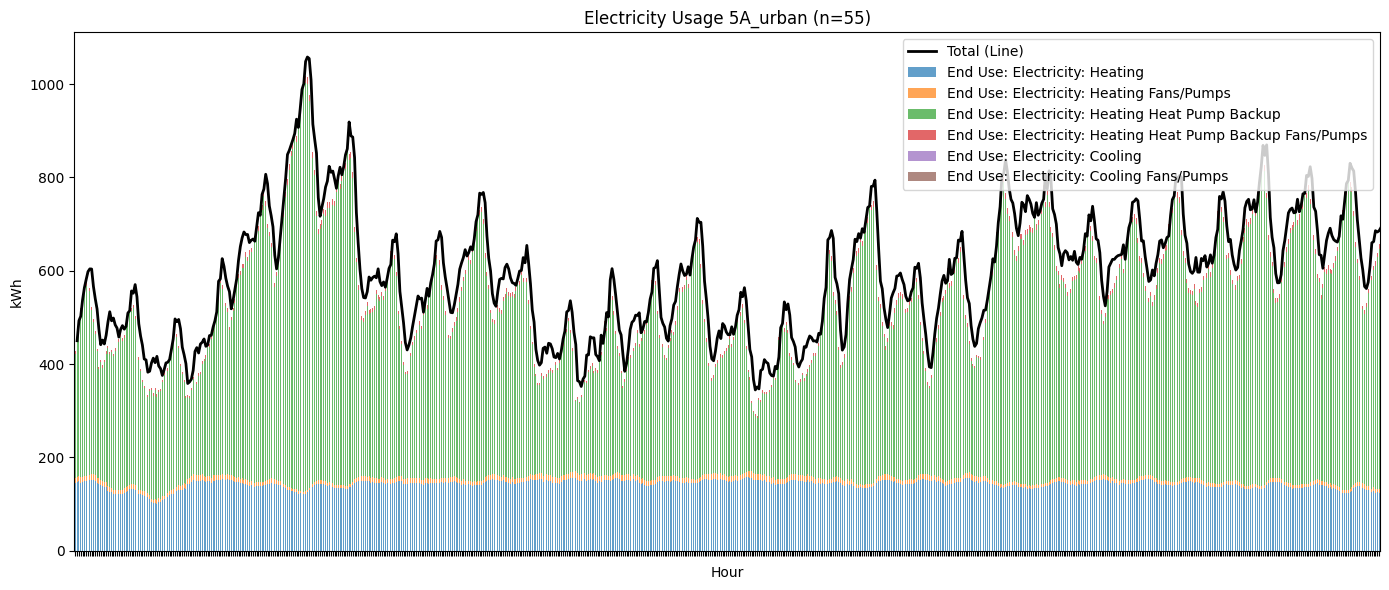

/tmp/ipykernel_2040881/3308226204.py:11: DtypeWarning: Columns (76,77,78,132) have mixed types. Specify dtype option on import or set low_memory=False.
  buildstock_df = pd.read_csv(buildstock_path)


We begin with (6709, 429) TARE results, out of a total of (8000,) buildings
Filtering by climate zone leaves us (1451, 429)
Filtering by urbanization leaves us (277, 429)
There were also 35 buildings excluded from TARE


/tmp/ipykernel_2040881/1333341924.py:39: DtypeWarning: Columns (5,8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  baseline_power_timeseries_df = pd.read_csv(baseline_load_file_path, low_memory=True, usecols=lambda x: x in electricity_cols or x in desired_hvac_cols)
/tmp/ipykernel_2040881/1333341924.py:48: DtypeWarning: Columns (5,8,9,10,11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  upgrade_power_timeseries_df = pd.read_csv(upgrade_load_file_path, low_memory=True, usecols=lambda x: x in electricity_cols or x in desired_hvac_cols)
/tmp/ipykernel_2040881/1333341924.py:39: DtypeWarning: Columns (5,8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  baseline_power_timeseries_df = pd.read_csv(baseline_load_file_path, low_memory=True, usecols=lambda x: x in electricity_cols or x in desired_hvac_cols)
/tmp/ipykernel_2040881/1333341924.py:48: DtypeWarning: Columns (5,8,9,10,11,12,13) have

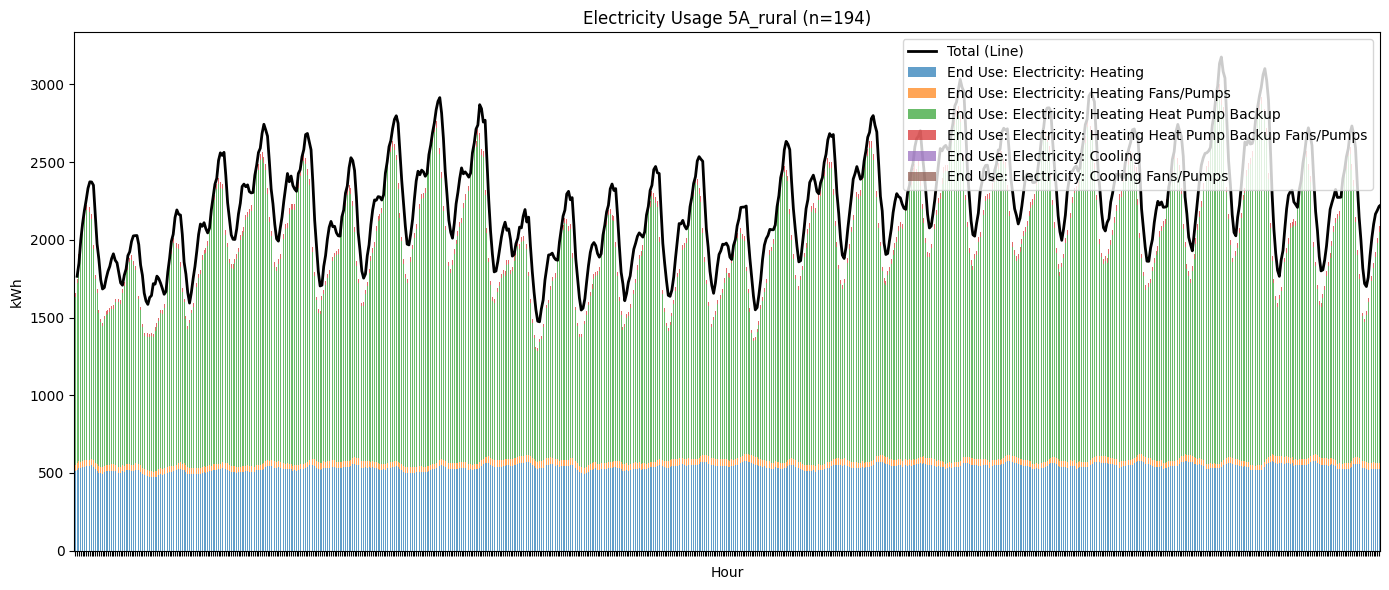

/tmp/ipykernel_2040881/3308226204.py:11: DtypeWarning: Columns (76,77,78,132) have mixed types. Specify dtype option on import or set low_memory=False.
  buildstock_df = pd.read_csv(buildstock_path)


We begin with (6709, 429) TARE results, out of a total of (8000,) buildings
Filtering by climate zone leaves us (410, 429)
Filtering by urbanization leaves us (182, 429)
There were also 37 buildings excluded from TARE


/tmp/ipykernel_2040881/1333341924.py:39: DtypeWarning: Columns (5,8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  baseline_power_timeseries_df = pd.read_csv(baseline_load_file_path, low_memory=True, usecols=lambda x: x in electricity_cols or x in desired_hvac_cols)
/tmp/ipykernel_2040881/1333341924.py:48: DtypeWarning: Columns (5,8,9,10,11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  upgrade_power_timeseries_df = pd.read_csv(upgrade_load_file_path, low_memory=True, usecols=lambda x: x in electricity_cols or x in desired_hvac_cols)
/tmp/ipykernel_2040881/1333341924.py:39: DtypeWarning: Columns (5,8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  baseline_power_timeseries_df = pd.read_csv(baseline_load_file_path, low_memory=True, usecols=lambda x: x in electricity_cols or x in desired_hvac_cols)
/tmp/ipykernel_2040881/1333341924.py:48: DtypeWarning: Columns (5,8,9,10,11,12,13) have

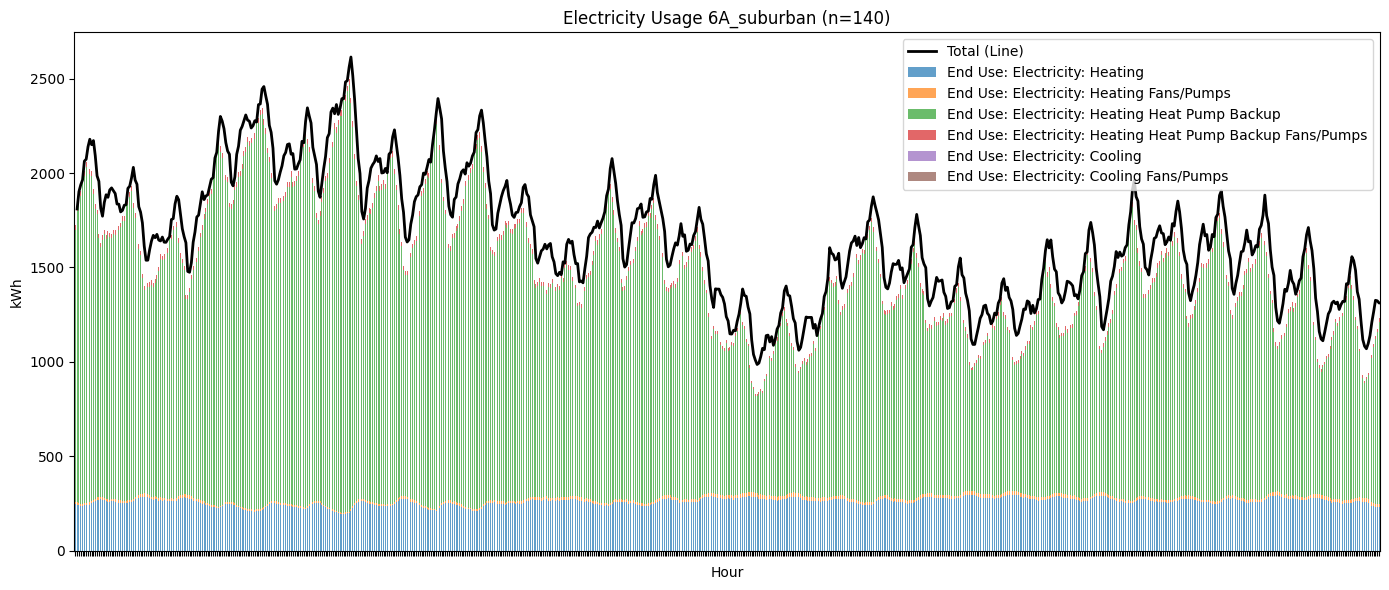

In [18]:
combinations_array = [("COST_BASED", "3C", "suburban"),("COST_BASED", "5A", "urban"),("COST_BASED", "5A", "rural"),("COST_BASED", "6A", "suburban")]
for penetration_level_label, climate_zone, level_of_urbanization in combinations_array:
    try:
        new_df, excluded_buildings = get_cost_based_adoption_levels(climate_zone,level_of_urbanization, penetration_level_label)
    except:
        continue
    # print("got cost based adoption")
    # hvac_electricity_use_cols = ["End Use: Electricity: Heating",
    #         "End Use: Electricity: Heating Fans/Pumps",
    #         "End Use: Electricity: Heating Heat Pump Backup",
    #         "End Use: Electricity: Heating Heat Pump Backup Fans/Pumps",
    #         "End Use: Electricity: Cooling",
    #         "End Use: Electricity: Cooling Fans/Pumps"]
    desired_cols = ["Time", "Fuel Use: Electricity: Total", "Weather: Drybulb Temperature", "Temperature: Conditioned Space"]
    desired_heating_cols = ["End Use: Electricity: Heating", "End Use: Electricity: Heating Fans/Pumps", "End Use: Electricity: Heating Heat Pump Backup", "End Use: Electricity: Heating Heat Pump Backup Fans/Pumps"]
    desired_cooling_cols = ["End Use: Electricity: Cooling", "End Use: Electricity: Cooling Fans/Pumps"]
    desired_hvac_cols = desired_heating_cols + desired_cooling_cols

    electricity_cols = ["Fuel Use: Electricity: Total"]
    POWER_FACTOR = 0.9

    stacked_bar_chart_dfs = {col_name: None for col_name in desired_hvac_cols}
    overall_line_chart_electricity_df = None

    # Make it into the format that TPIA-MP expects
    csv_format_phased_power = None
    for building_num, (idx, row) in enumerate(new_df.iterrows()):
        if np.isnan(row.name):
            continue
        if not row['is_adopting']:
            continue
        
        bldg_id = int(row.name)
        baseline_load_file_path = os.path.join(resstock_dir, f"{region}{'' if '_' in region else '_upgrades'}_{NUM_RESIDENCES}_{unit_type}_unit_residence", f"run{bldg_id}", "run", "results_timeseries.csv")
        upgrade_load_file_path = os.path.join(resstock_dir, f"{region}{'' if '_' in region else '_upgrades'}_{NUM_RESIDENCES}_{unit_type}_unit_residence_ASHP", f"run{bldg_id}", "run", "results_timeseries.csv")
        if not os.path.exists(baseline_load_file_path):
            print(f"Couldn't find baseline data for building {bldg_id}, not adding it")
            continue
        baseline_power_timeseries_df = pd.read_csv(baseline_load_file_path, low_memory=True, usecols=lambda x: x in electricity_cols or x in desired_hvac_cols)
        baseline_power_timeseries_df = baseline_power_timeseries_df.iloc[1:].copy() # Remove the title from the series
        baseline_power_timeseries_df[str(int(idx))] = baseline_power_timeseries_df["Fuel Use: Electricity: Total"].astype(float).apply(lambda power: power / POWER_FACTOR) #   / 3 / 0.9
        # baseline_power_timeseries_df = baseline_power_timeseries_df[[str(int(idx))]]
        if not os.path.exists(upgrade_load_file_path):
            print(f"Couldn't find upgrade data for building {bldg_id}, so adding a zero sequence for it")
            power_timeseries_df = pd.DataFrame(index=baseline_power_timeseries_df, columns=baseline_power_timeseries_df.columns)
            power_timeseries_df.iloc[:,0] = 0
        else:
            upgrade_power_timeseries_df = pd.read_csv(upgrade_load_file_path, low_memory=True, usecols=lambda x: x in electricity_cols or x in desired_hvac_cols)
            upgrade_power_timeseries_df = upgrade_power_timeseries_df.iloc[1:].copy() # Remove the title from the series
            upgrade_power_timeseries_df[str(int(idx))] = upgrade_power_timeseries_df["Fuel Use: Electricity: Total"].astype(float).apply(lambda power: power / POWER_FACTOR) #   / 3 / 0.9
            # upgrade_power_timeseries_df = upgrade_power_timeseries_df[[str(int(idx))]]
            power_timeseries_df = upgrade_power_timeseries_df[[str(int(idx))]] - baseline_power_timeseries_df[[str(int(idx))]]

            if overall_line_chart_electricity_df is None:
                overall_line_chart_electricity_df = upgrade_power_timeseries_df[[str(int(idx))]]
            else:
                overall_line_chart_electricity_df = overall_line_chart_electricity_df.join(upgrade_power_timeseries_df[[str(int(idx))]], how="left")

            for col_name in desired_hvac_cols:
                # new_col_name = f"{col_name}_{idx}"
                col_value = upgrade_power_timeseries_df[[col_name]].astype(float).apply(lambda power: power / POWER_FACTOR)
                if stacked_bar_chart_dfs[col_name] is None:
                    stacked_bar_chart_dfs[col_name] = col_value
                else:
                    stacked_bar_chart_dfs[col_name] = stacked_bar_chart_dfs[col_name].join(col_value, how="left", lsuffix=idx, rsuffix=idx)



        if csv_format_phased_power is None:
            csv_format_phased_power = power_timeseries_df
        else:
            csv_format_phased_power = csv_format_phased_power.join(power_timeseries_df, how="left")
    
    if csv_format_phased_power is None:
        continue

    

    num_residences_in_climate_zone_level_of_urbanization = csv_format_phased_power.shape[1]
    if num_residences_in_climate_zone_level_of_urbanization == 0:
        continue

    # 1. Line data
    line_data = overall_line_chart_electricity_df.iloc[:720,:].sum(axis=1)

    # 2. Bar data: build a DataFrame where each column is the summed Series from the dict
    bar_data = pd.DataFrame({
        label: df.iloc[:720,:].sum(axis=1)
        for label, df in stacked_bar_chart_dfs.items()
    })

    # 3. Plot
    fig, ax = plt.subplots(figsize=(14, 6))

    # Plot the line
    line_data.plot(ax=ax, label="Total (Line)", color="black", linewidth=2)

    # Plot the stacked bars
    bar_data.plot(kind="bar", stacked=True, ax=ax, alpha=0.7)

    # Final touches
    ax.set_title(f"Electricity Usage {climate_zone}_{level_of_urbanization} (n={num_residences_in_climate_zone_level_of_urbanization})")
    ax.set_xlabel("Hour")
    ax.set_ylabel("kWh")
    ax.legend(loc="upper right")
    ax.set_xticklabels([])
    plt.tight_layout()
    plt.show()
    # fig = plt.figure(figsize=(12,4))
    # plt.plot(csv_format_phased_power.sum(axis=1), label='Change from Baseline')
    # plt.title(f"{climate_zone}_{level_of_urbanization} Change in Total Hourly Usage Over the Year (n={num_residences_in_climate_zone_level_of_urbanization})")
    # plt.xlabel("Hour")
    # plt.ylabel("kWh")
    # plt.legend()
    # plt.tight_layout()
    line_plot_path = os.path.join(visuals_dir, "line_and_box_plot", penetration_level_label, f"{climate_zone}_{level_of_urbanization}_jan.svg")
    os.makedirs(os.path.dirname(line_plot_path), exist_ok=True)
    fig.savefig(line_plot_path)
    plt.show()
    

In [19]:
def bootstrap_market_size_values():
    tare_file_name = os.path.join(os.getcwd(), "output_results",f"national_ASHP_8000_all_unit_residence", f"alpha_beta_NPV_tare_output.csv")
    tare_output = pd.read_csv(tare_file_name)
    new_df = pd.DataFrame({"bldg_id": tare_output["bldg_id"], "is_adopting": False, "iraRef_mp8_heating_adoption": tare_output["iraRef_mp8_heating_adoption"]})
    new_df = new_df.set_index("bldg_id")

    for idx, row in new_df.iterrows():
        bldg_id = row.name
        
        iraRef_mp8_heating_adoption = row["iraRef_mp8_heating_adoption"]
        if iraRef_mp8_heating_adoption in ['Tier 1: Feasible', 'Tier 2: Feasible vs. Alternative', 'Tier 3: Subsidy-Dependent Feasibility', 'Feasible per MMPV']:
            new_df.loc[bldg_id,"is_adopting"] = True

    # Number of bootstrap iterations
    n_iterations = 1000
    n_size = len(new_df)
    bootstrap_adoption_rates = []
    bootstrap_market_sizes = []

    for i in range(n_iterations):
        sample = new_df.sample(n=n_size, replace=True)
        adoption_rate = sample['is_adopting'].mean()
        market_size = sample['is_adopting'].sum() * 16500
        bootstrap_adoption_rates.append(adoption_rate)
        bootstrap_market_sizes.append(market_size)

    bootstrap_adoption_rates = np.array(bootstrap_adoption_rates)
    point_estimate_adoption_rate = new_df['is_adopting'].mean()
    ci_lower = np.percentile(bootstrap_adoption_rates, 2.5)
    ci_upper = np.percentile(bootstrap_adoption_rates, 97.5)

    print(f"Point Estimate (Adoption Rate): {point_estimate_adoption_rate:.3f}")
    print(f"95% Confidence Interval: ({ci_lower:.3f}, {ci_upper:.3f})")

    # Create figure and axis
    fig, ax = plt.subplots(figsize=(8, 5))

    # Plot histogram
    ax.hist(bootstrap_adoption_rates, bins=30, edgecolor='k', alpha=0.7)
    ax.axvline(point_estimate_adoption_rate, color='red', linestyle='dashed', linewidth=2, label='Point Estimate')
    ax.axvline(ci_lower, color='blue', linestyle='dashed', linewidth=1, label='2.5th Percentile')
    ax.axvline(ci_upper, color='blue', linestyle='dashed', linewidth=1, label='97.5th Percentile')
    ax.set_xlabel('Adoption Rate')
    ax.set_ylabel('Frequency')
    ax.set_title('Bootstrap Distribution of Adoption Rates')
    ax.legend()

    fig.tight_layout()

    # Save as SVG
    fig.savefig(os.path.join("/ocean", "projects", "eng220005p", "agautam3", "cmu-tare-model", "output_results", "national_ASHP_8000_all_unit_residence", "bootstrapping_estimate_of_adoption_rate.svg"), format='svg')

    ##################################

    bootstrap_market_sizes = np.array(bootstrap_market_sizes)
    point_estimate_market_size = new_df['is_adopting'].sum() * 16500
    ci_lower = np.percentile(bootstrap_market_sizes, 2.5)
    ci_upper = np.percentile(bootstrap_market_sizes, 97.5)

    print(f"Point Estimate (Adoption Rate): {point_estimate_market_size:.3f}")
    print(f"95% Confidence Interval: ({ci_lower:.3f}, {ci_upper:.3f})")

    # Create figure and axis
    fig, ax = plt.subplots(figsize=(8, 5))

    # Plot histogram
    ax.hist(bootstrap_market_sizes, bins=30, edgecolor='k', alpha=0.7)
    ax.axvline(point_estimate_market_size, color='red', linestyle='dashed', linewidth=2, label='Point Estimate')
    ax.axvline(ci_lower, color='blue', linestyle='dashed', linewidth=1, label='2.5th Percentile')
    ax.axvline(ci_upper, color='blue', linestyle='dashed', linewidth=1, label='97.5th Percentile')
    ax.set_xlabel('Market Size')
    ax.set_ylabel('Frequency')
    ax.set_title('Bootstrap Distribution of Market Sizes')
    ax.legend()

    fig.tight_layout()

    # Save as SVG
    fig.savefig(os.path.join("/ocean", "projects", "eng220005p", "agautam3", "cmu-tare-model", "output_results", "national_ASHP_8000_all_unit_residence", "bootstrapping_estimate_of_market_size.svg"), format='svg')

    # plt.close()  # Close the figure if not displaying interactively

    # fig.savefig(os.path.join("/ocean", "projects", "eng220005p", "agautam3", "cmu-tare-model", "output_results", "national_ASHP_8000_all_unit_residence", "market_size_estimate_bootstrapping.svg"))

Point Estimate (Adoption Rate): 0.316
95% Confidence Interval: (0.305, 0.326)
Point Estimate (Adoption Rate): 34996500.000
95% Confidence Interval: (33726000.000, 36118500.000)


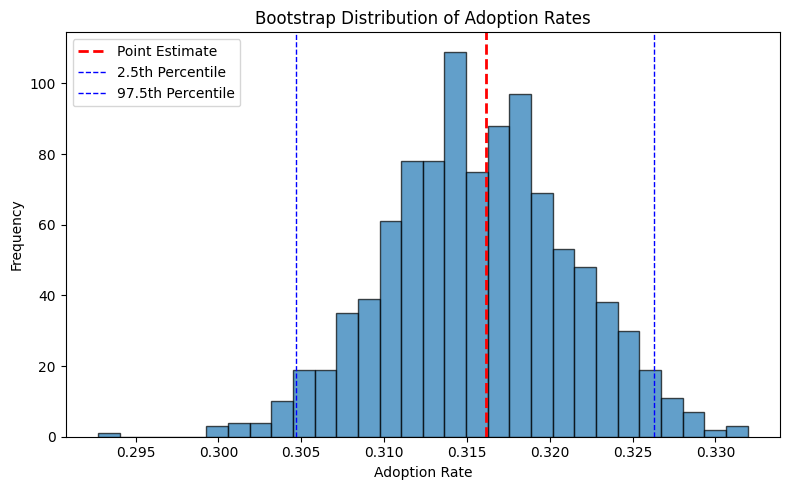

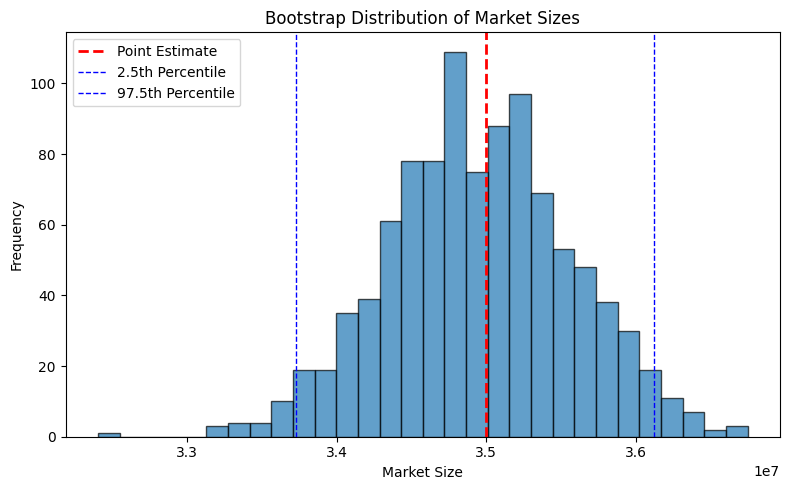

In [20]:
bootstrap_market_size_values()

In [7]:
lower_48_gdf = gpd.GeoDataFrame.from_file("simplified_split_filled_lower_48_climate_zones.geojson")

subplot_dicts = {
    "Cost": "cost_market_size",
    "Grid": "grid_market_size",
    "Both": "both_market_size",
}

subplot_colors = {
    "Cost": "Greens",
    "Grid": "Blues",
    "Both": "Purples",
}



# Function to format labels (to avoid scientific notation)
def format_value_label(num):
    """Formats a number into a human-readable string (e.g., 1.5M, 500K, 0)."""
    if num == 0:
        return "0"
    elif num >= 1_000_000:
        return f"{num / 1_000_000:.1f}M"
    elif num >= 1_000:
        return f"{num / 1_000:.0f}K"
    else:
        return f"{num:.0f}"

def make_three_maps(sensitivity_case_name="REFERENCE_CASE", split_up_files = False):

    # Plot the GeoDataFrame
    if not split_up_files:
        fig, axes_obj = plt.subplots(3, 1, figsize=(16, 25))

    for idx, (plot_name, dict_name) in enumerate(subplot_dicts.items()):
        # dict_path = os.path.join("/ocean", "projects", "eng220005p", "agautam3", "TPIA-MP", "sensitivities", sensitivity_case_name, f"{dict_name}.pkl")
        dict_path = os.path.join(os.path.dirname(os.path.dirname(os.getcwd())), "TPIA-MP", "sensitivities", sensitivity_case_name, f"{dict_name}.pkl")
        with open(dict_path, "rb") as f:
            dict_obj = pickle.load(f)
        # print(np.array(dict_obj[climate_zone] for climate_zone in lower_48_gdf["Climate_Zones"]))
        lower_48_gdf[f"{sensitivity_case_name} {plot_name}"] = np.array(dict_obj[climate_zone] for climate_zone in lower_48_gdf["Climate_Zones"])

        # Your provided data values
        raw_data_values = lower_48_gdf[f"{sensitivity_case_name} {plot_name}"]

        # Get unique and sorted values to define the categories and color mapping
        unique_sorted_values = sorted(list(set(raw_data_values)))
        num_unique_values = len(unique_sorted_values)

        # Generate a custom colormap using "Reds"
        colormap = cm.get_cmap(subplot_colors[plot_name], num_unique_values)
        custom_colors_list = [colormap(i) for i in range(num_unique_values)]
        custom_cmap = mcolors.ListedColormap(custom_colors_list)


        # Convert the 'value_column' to a Categorical type with the custom order.
        # This ensures that geopandas.plot assigns distinct colors based on your specific values.
        value_category_type = pd.CategoricalDtype(categories=unique_sorted_values, ordered=True)
        lower_48_gdf[f'{sensitivity_case_name} {plot_name} value_column_cat'] = lower_48_gdf[f'{sensitivity_case_name} {plot_name}'].astype(value_category_type)

        # Create formatted labels for the legend
        formatted_labels = [format_value_label(val) for val in unique_sorted_values]

        # Create a mapping from unique value to its assigned color for legend patches
        color_map_for_legend = {
            unique_sorted_values[i]: custom_colors_list[i]
            for i in range(num_unique_values)
        }

        if split_up_files:
            fig, ax = plt.subplots(figsize=(16, 8))
        else:
            ax = axes_obj[idx]


        # cax = ax.inset_axes([0.19, 0.65, 0.4, 0.05])

        lower_48_gdf.plot(
            column=f'{sensitivity_case_name} {plot_name} value_column_cat',
            cmap=custom_cmap,
            ax=ax,
            legend=False,
            markersize=100, # Adjust for point data
            # edgecolor='black',
            linewidth=0.5
        )

        # Create and add the custom legend
        legend_handles = []
        for value in unique_sorted_values:
            color = color_map_for_legend[value]
            label = format_value_label(value)
            legend_handles.append(Patch(facecolor=color, edgecolor='black', label=label))


        ax.legend(
            handles=legend_handles,
            title="Market size",
            frameon=True,
            edgecolor='black',
            fancybox=True,
            shadow=True,
            loc='upper left',
            bbox_to_anchor=(1, 0.9),
            fontsize=16,
            title_fontsize=20
        )

        ax.set_axis_off()
        plt.tight_layout()
        if split_up_files:
            fig.savefig(f"Ch4_three_map_{sensitivity_case_name}_pt_{idx}.svg")

    if not split_up_files:
        plt.show()
        
        fig.savefig(f"Ch4_three_map_{sensitivity_case_name}.svg")

/tmp/ipykernel_863/2978999472.py:51: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap(subplot_colors[plot_name], num_unique_values)
/tmp/ipykernel_863/2978999472.py:39: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  dict_obj = pickle.load(f)
/tmp/ipykernel_863/2978999472.py:51: MatplotlibDeprecationWarning: The get_cm

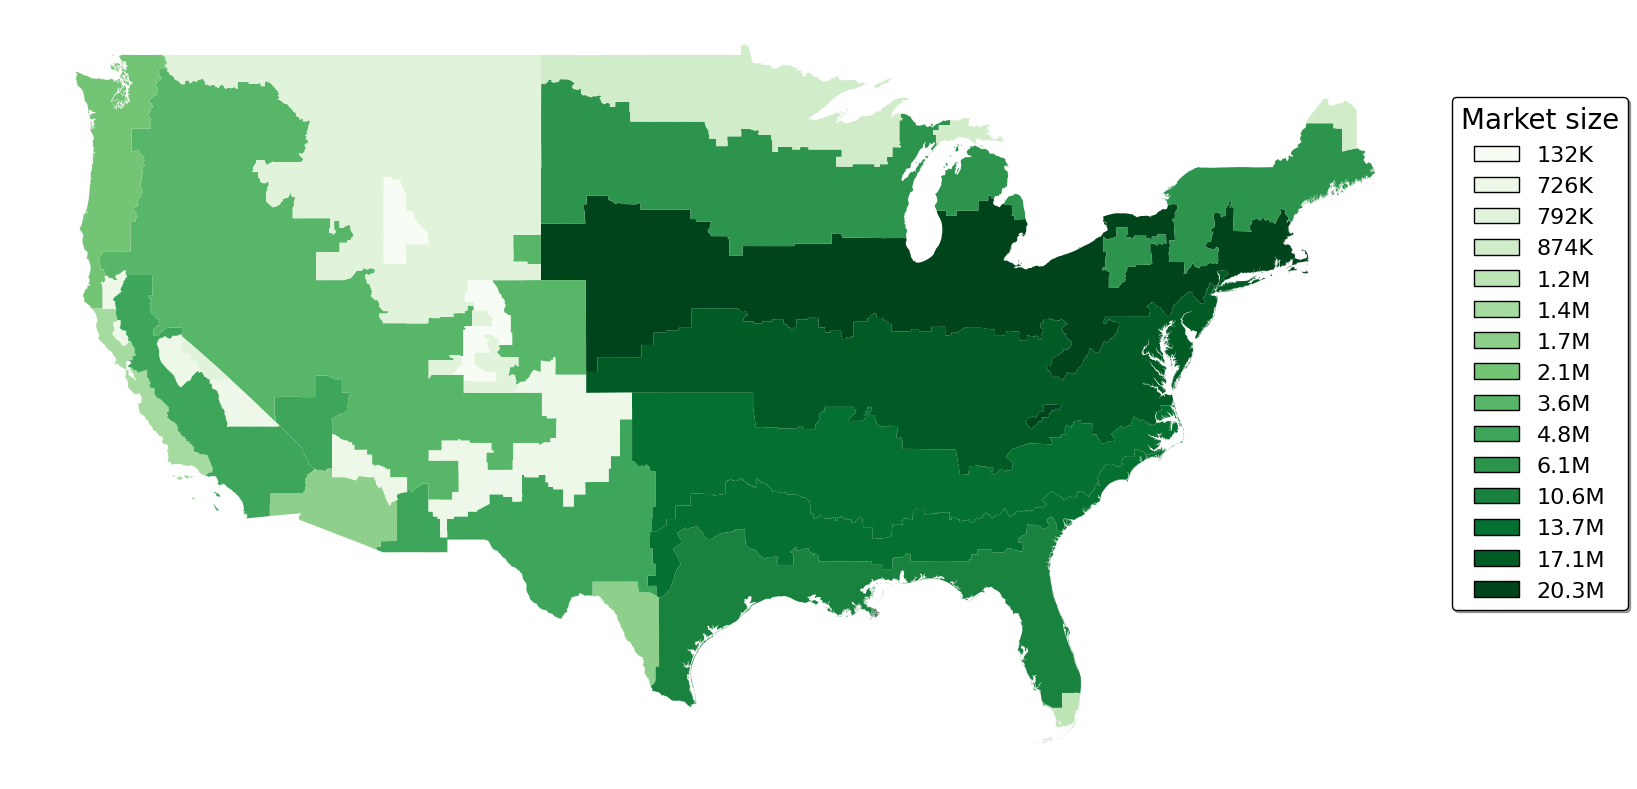

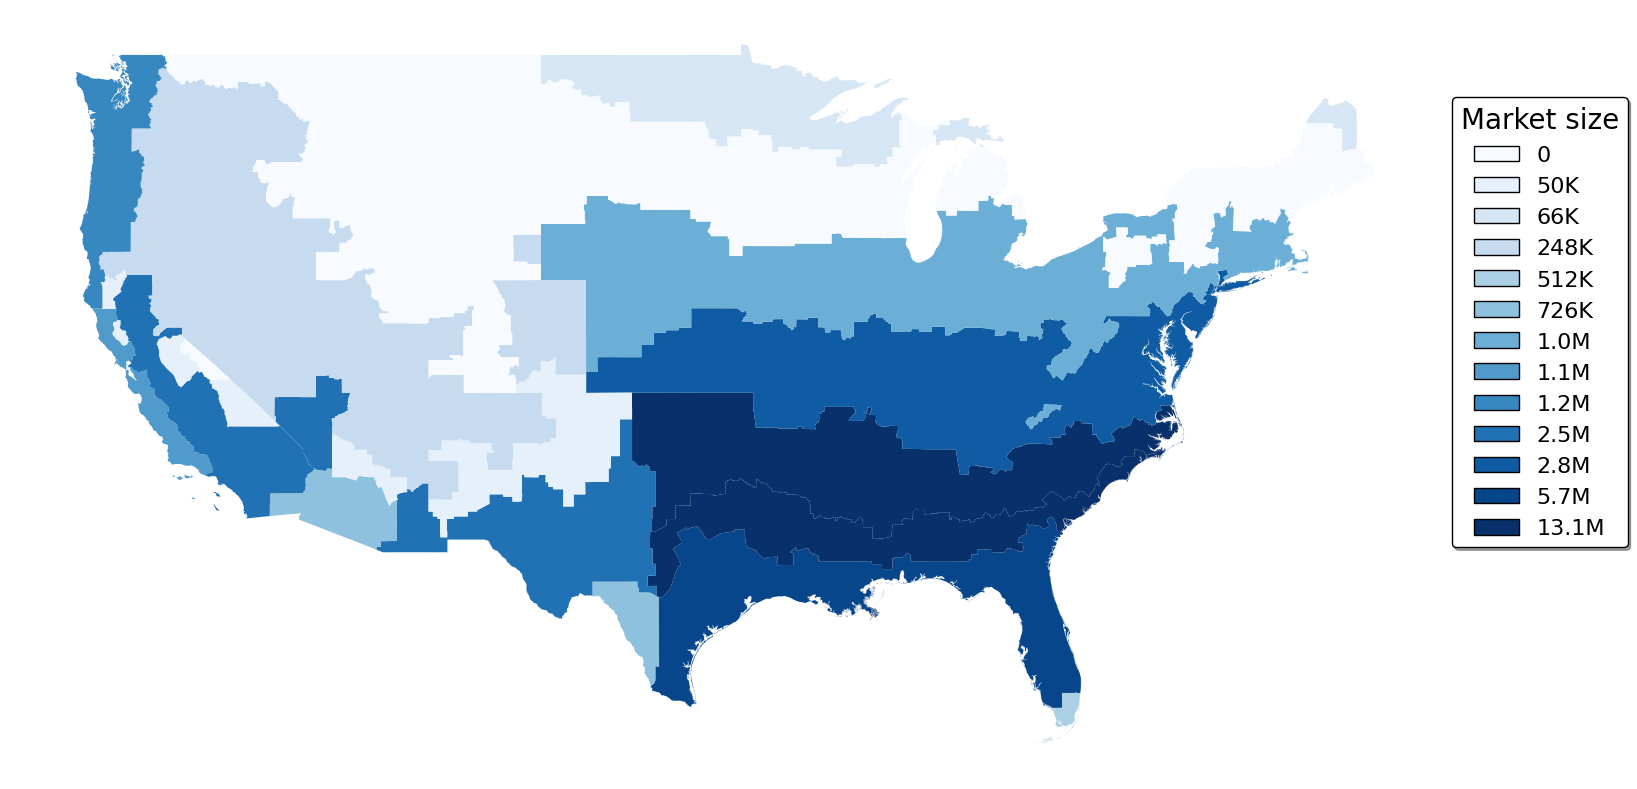

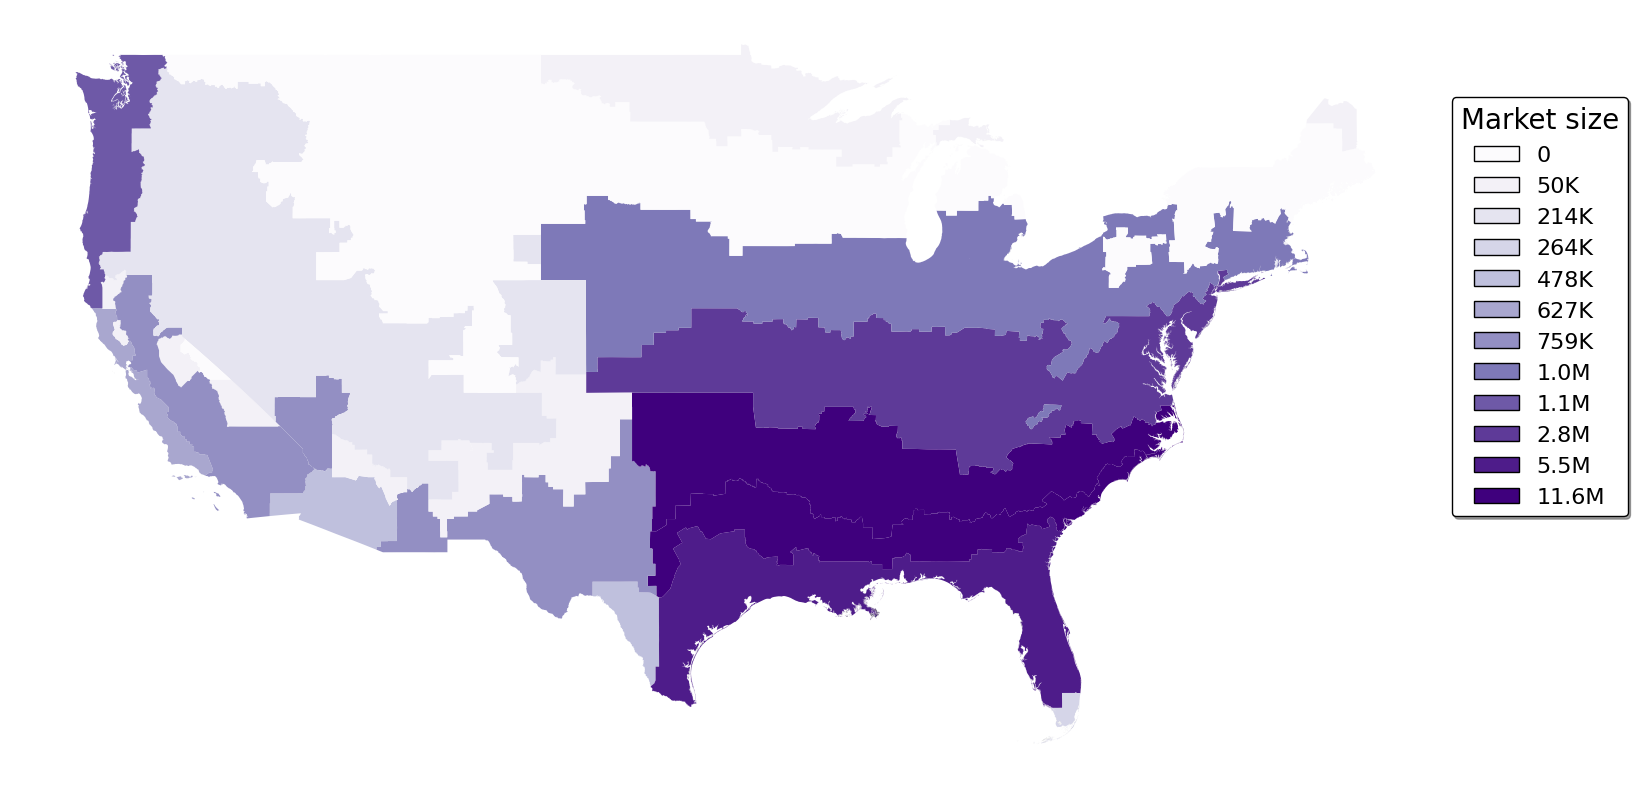

In [14]:
make_three_maps("REFERENCE_CASE", split_up_files=True)

/tmp/ipykernel_863/2978999472.py:51: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap(subplot_colors[plot_name], num_unique_values)
/tmp/ipykernel_863/2978999472.py:39: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  dict_obj = pickle.load(f)
/tmp/ipykernel_863/2978999472.py:51: MatplotlibDeprecationWarning: The get_cm

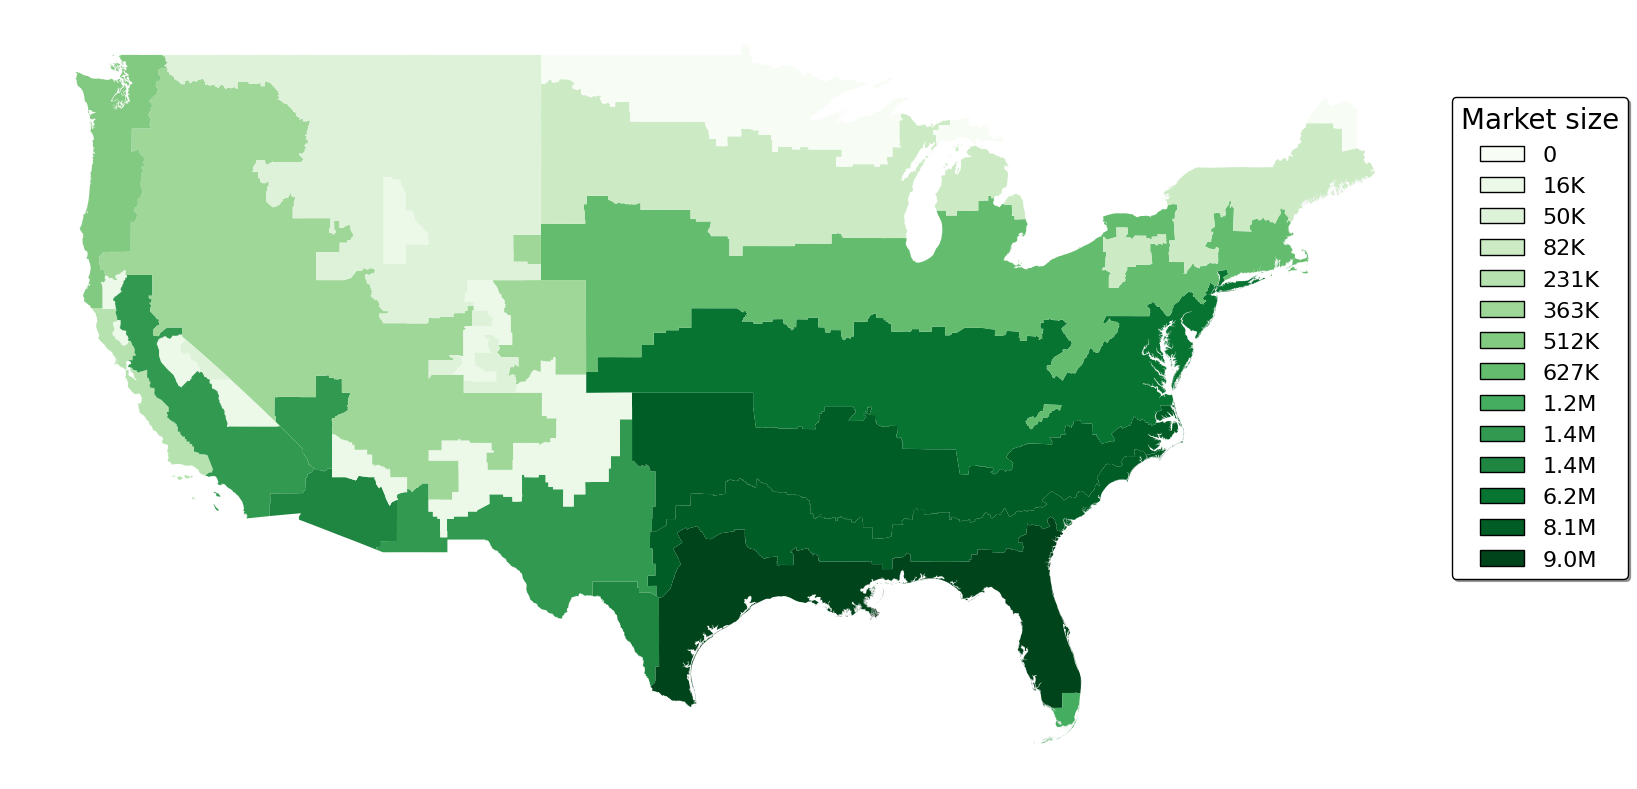

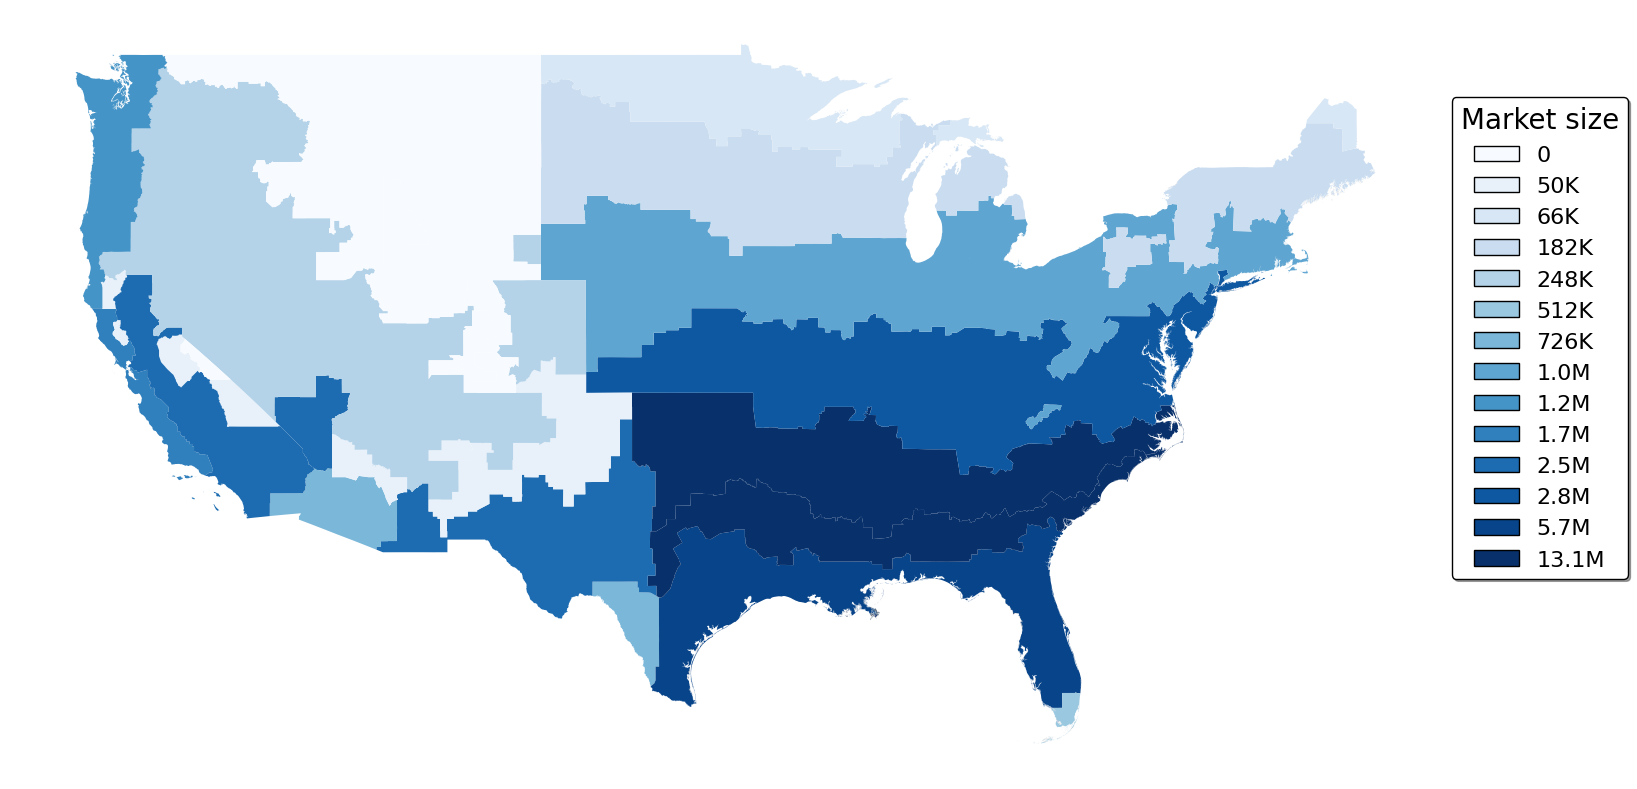

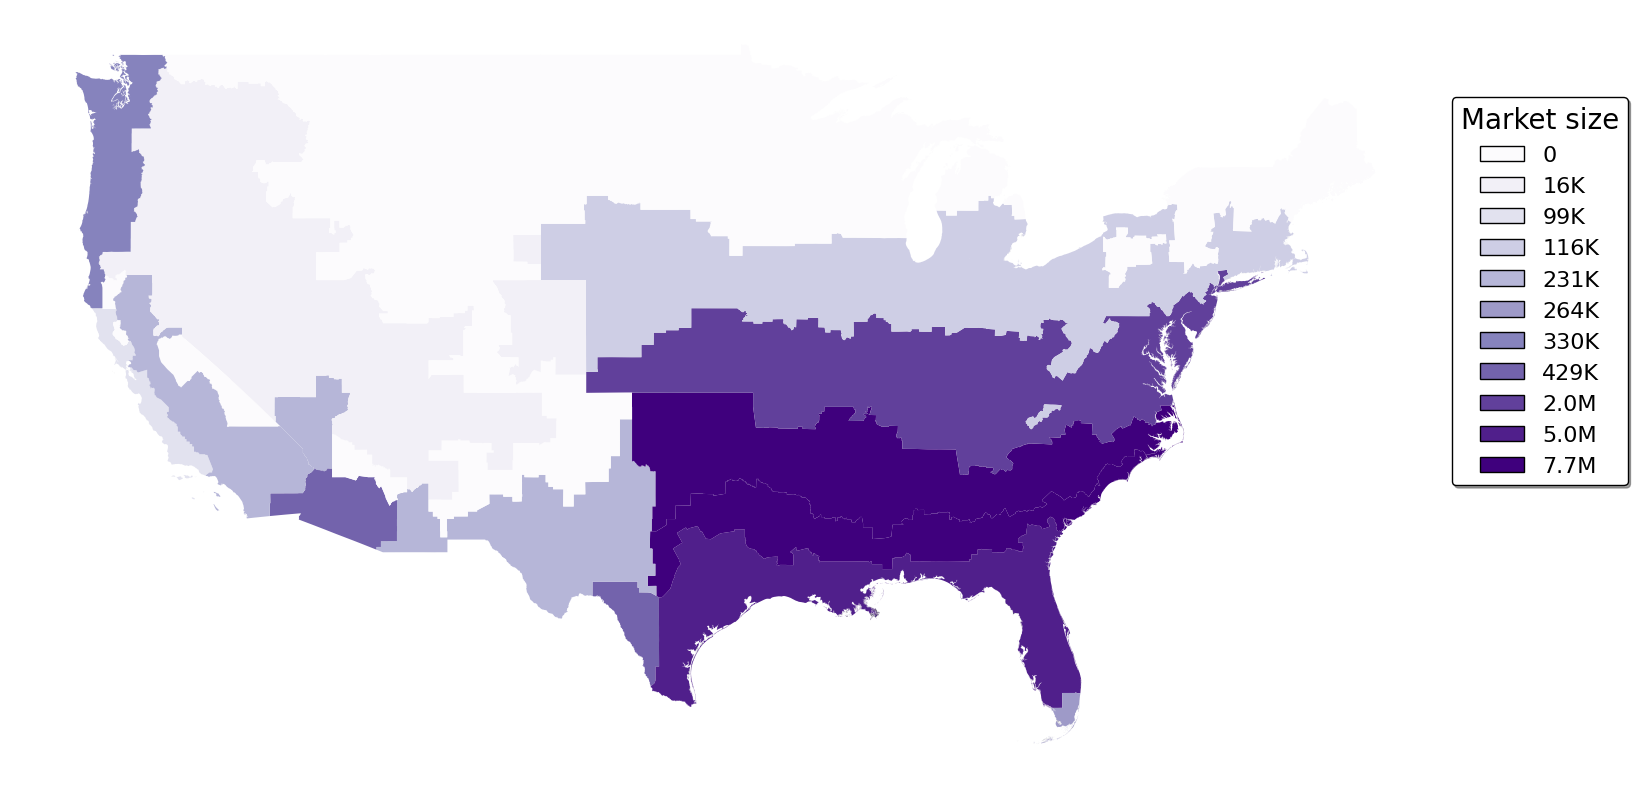

In [15]:
make_three_maps("NO_IRA", split_up_files=True)

/tmp/ipykernel_839/3894214271.py:51: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap(subplot_colors[plot_name], num_unique_values)


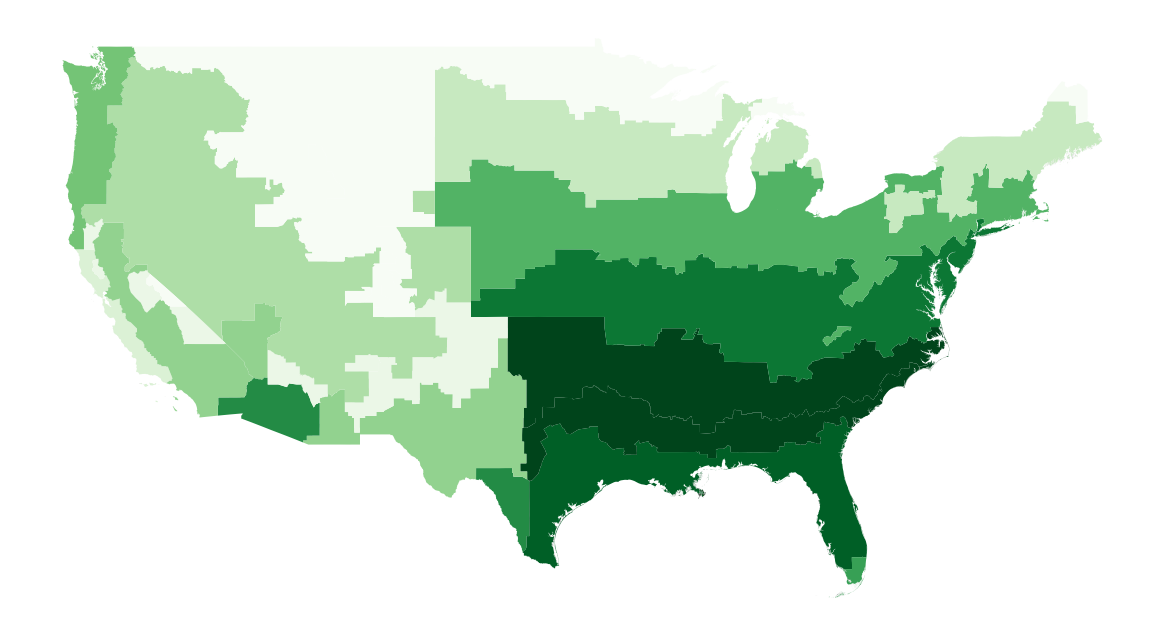

In [7]:
# import matplotlib.pyplot as plt
# import matplotlib.colors as mcolors
# import matplotlib.cm as cm
# from matplotlib.patches import Patch
# import geopandas as gpd
# import pandas as pd
# import numpy as np
# import os
# import pickle

# Load your GeoDataFrame
lower_48_gdf = gpd.GeoDataFrame.from_file("simplified_split_filled_lower_48_climate_zones.geojson")

subplot_dicts = {
    "Cost": "cost_market_size",
    "Grid": "grid_market_size",
    "Both": "both_market_size",
}

subplot_colors = {
    "Cost": "Greens",
    "Grid": "Blues",
    "Both": "Purples",
}

def format_value_label(num):
    if num == 0:
        return "0"
    elif num >= 1_000_000:
        return f"{num / 1_000_000:.1f}M"
    elif num >= 1_000:
        return f"{num / 1_000:.0f}K"
    else:
        return f"{num:.0f}"

def make_three_maps(sensitivity_case_name, legend_handles_dict, cost_only = False):
    for idx, (plot_name, dict_name) in enumerate(subplot_dicts.items()):
        if cost_only and idx > 0:
            return
        dict_path = os.path.join(os.path.dirname(os.path.dirname(os.getcwd())), "TPIA-MP", "sensitivities", sensitivity_case_name, f"{dict_name}.pkl")
        # dict_path = os.path.join(os.path.dirname(os.getcwd()), "TPIA-MP", "sensitivities", sensitivity_case_name, f"{dict_name}.pkl")
        with open(dict_path, "rb") as f:
            dict_obj = pickle.load(f)

        lower_48_gdf[f"{sensitivity_case_name} {plot_name}"] = np.array([dict_obj[climate_zone] for climate_zone in lower_48_gdf["Climate_Zones"]])

        raw_data_values = lower_48_gdf[f"{sensitivity_case_name} {plot_name}"]
        unique_sorted_values = sorted(set(raw_data_values))
        num_unique_values = len(unique_sorted_values)

        colormap = cm.get_cmap(subplot_colors[plot_name], num_unique_values)
        custom_colors_list = [colormap(i) for i in range(num_unique_values)]
        custom_cmap = mcolors.ListedColormap(custom_colors_list)

        value_category_type = pd.CategoricalDtype(categories=unique_sorted_values, ordered=True)
        lower_48_gdf[f'{sensitivity_case_name} {plot_name} value_column_cat'] = lower_48_gdf[f'{sensitivity_case_name} {plot_name}'].astype(value_category_type)

        color_map_for_legend = {unique_sorted_values[i]: custom_colors_list[i] for i in range(num_unique_values)}

        fig, ax = plt.subplots(figsize=(16, 8))
        # ax = axes_obj[idx]
        lower_48_gdf.plot(
            column=f'{sensitivity_case_name} {plot_name} value_column_cat',
            cmap=custom_cmap,
            ax=ax,
            legend=False,
            markersize=100,
            linewidth=0.5
        )

        # Collect legend handles for this plot_name if not already collected
        if plot_name not in legend_handles_dict:
            handles = [
                Patch(facecolor=color_map_for_legend[val], edgecolor='black', label=format_value_label(val))
                for val in unique_sorted_values
            ]
            legend_handles_dict[plot_name] = handles

        ax.set_axis_off()
        fig.savefig(f"Ch4_three_map_{sensitivity_case_name}_pt_{idx}.svg")



# --- MAIN EXECUTION ---

# fig, axes = plt.subplots(3, 1, figsize=(16, 25))

legend_handles_dict = {}

# Call for two sensitivities (or as many as you like)
# make_three_maps("REFERENCE_CASE", legend_handles_dict)
# make_three_maps("NO_IRA", legend_handles_dict, cost_only = True)
make_three_maps("TRANE_REPLACEMENT_COSTS", legend_handles_dict, cost_only=True)

# Save or display combined maps
# fig.savefig("combined_maps.svg")
# plt.show()



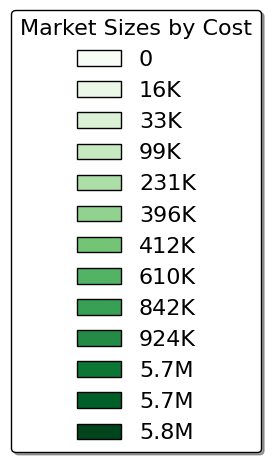

In [8]:
def create_combined_legend_figure(sensitivity_case_name, legend_handles_dict, cost_only=False):
    
    # all_handles = []
    # all_labels = []

    for plot_name, handles in legend_handles_dict.items():
        if cost_only and plot_name != "Cost":
            continue
        fig, ax = plt.subplots(figsize=(3, 5))
        ax.axis('off')

        # all_handles.extend(handles)
        # all_labels.extend([f"{plot_name}: {h.get_label()}" for h in handles])

        legend = ax.legend(
            handles=handles,
            labels=[h.get_label() for h in handles],
            loc='center',
            frameon=True,
            edgecolor='black',
            fancybox=True,
            shadow=True,
            fontsize=16,
            title=f"Market Sizes by {plot_name}",
            title_fontsize=16
        )
        plt.tight_layout()
        fig.savefig(f"Ch4_three_map_combined_legend_{plot_name}{'_cost_only' if cost_only else ''}_{sensitivity_case_name}.svg")
        plt.show()


# Now make and save combined legend
create_combined_legend_figure("TRANE_REPLACEMENT_COSTS", legend_handles_dict, cost_only=True)